In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
Bundesliga = pd.read_excel("Bundesliga.xlsx")
Bundesliga.index = range(1, len(Bundesliga) + 1)
Bundesliga.head()


,Player,Nation,League,Team,Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,Playing Time.2_90s,...,Per 90 Minutes_Gls,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG
1,Jeffrey Gouweleeuw,nl NED,Bundesliga,Augsburg,DF,31,34,34,2975,33.1,...,0.00,0.03,0.03,0.00,0.03,0.05,0.07,0.12,0.05,0.12
2,Elvis Rexhbeçaj,de GER,Bundesliga,Augsburg,MF,24,33,32,2674,29.7,...,0.00,0.03,0.03,0.00,0.03,0.01,0.03,0.04,0.01,0.04
3,Ermedin Demirović,ba BIH,Bundesliga,Augsburg,"FW,MF",24,32,32,2492,27.7,...,0.29,0.14,0.43,0.25,0.40,0.29,0.13,0.42,0.26,0.39
4,Rafał Gikiewicz,pl POL,Bundesliga,Augsburg,GK,34,24,24,2160,24.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Arne Maier,de GER,Bundesliga,Augsburg,MF,23,32,25,2070,23.0,...,0.26,0.04,0.30,0.26,0.30,0.07,0.08,0.16,0.07,0.16


In [3]:
def Main_Pos(pos):
    pos_list = pos.split(',')  
    first_pos = pos_list[0].strip() 
    if first_pos == 'DF':
        return 'Defance'
    elif first_pos == 'MF':
        return 'Midfielder'
    elif first_pos == 'FW':
        return 'Forward'
    elif first_pos == 'GK':
        return 'Goalkeeper'
    else:
        return 'Unknown'

Bundesliga['Main_Pos'] = Bundesliga['Pos'].apply(Main_Pos)
Bundesliga.head()



,Player,Nation,League,Team,Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,Playing Time.2_90s,...,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG,Main_Pos
1,Jeffrey Gouweleeuw,nl NED,Bundesliga,Augsburg,DF,31,34,34,2975,33.1,...,0.03,0.03,0.00,0.03,0.05,0.07,0.12,0.05,0.12,Defance
2,Elvis Rexhbeçaj,de GER,Bundesliga,Augsburg,MF,24,33,32,2674,29.7,...,0.03,0.03,0.00,0.03,0.01,0.03,0.04,0.01,0.04,Midfielder
3,Ermedin Demirović,ba BIH,Bundesliga,Augsburg,"FW,MF",24,32,32,2492,27.7,...,0.14,0.43,0.25,0.40,0.29,0.13,0.42,0.26,0.39,Forward
4,Rafał Gikiewicz,pl POL,Bundesliga,Augsburg,GK,34,24,24,2160,24.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Goalkeeper
5,Arne Maier,de GER,Bundesliga,Augsburg,MF,23,32,25,2070,23.0,...,0.04,0.30,0.26,0.30,0.07,0.08,0.16,0.07,0.16,Midfielder


In [4]:
columns = Bundesliga.columns.tolist()
columns.insert(5, columns.pop())
Bundesliga = Bundesliga.reindex(columns=columns)
Bundesliga.head()

,Player,Nation,League,Team,Pos,Main_Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,...,Per 90 Minutes_Gls,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG
1,Jeffrey Gouweleeuw,nl NED,Bundesliga,Augsburg,DF,Defance,31,34,34,2975,...,0.00,0.03,0.03,0.00,0.03,0.05,0.07,0.12,0.05,0.12
2,Elvis Rexhbeçaj,de GER,Bundesliga,Augsburg,MF,Midfielder,24,33,32,2674,...,0.00,0.03,0.03,0.00,0.03,0.01,0.03,0.04,0.01,0.04
3,Ermedin Demirović,ba BIH,Bundesliga,Augsburg,"FW,MF",Forward,24,32,32,2492,...,0.29,0.14,0.43,0.25,0.40,0.29,0.13,0.42,0.26,0.39
4,Rafał Gikiewicz,pl POL,Bundesliga,Augsburg,GK,Goalkeeper,34,24,24,2160,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Arne Maier,de GER,Bundesliga,Augsburg,MF,Midfielder,23,32,25,2070,...,0.26,0.04,0.30,0.26,0.30,0.07,0.08,0.16,0.07,0.16


In [5]:
La_Liga = pd.read_excel("La_Liga.xlsx")
La_Liga.index = range(1, len(La_Liga) + 1)
La_Liga.head()

,Player,Nation,League,Team,Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,Playing Time.2_90s,...,Per 90 Minutes_Gls,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG
1,Fernando,es ESP,La Liga,UD Almería,GK,32,37,37,3285.0,36.5,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Rodrigo Ely,br BRA,La Liga,UD Almería,DF,28,36,36,3155.0,35.1,...,0.00,0.03,0.03,0.00,0.03,0.03,0.02,0.05,0.03,0.05
3,Srđan Babić,rs SRB,La Liga,UD Almería,DF,26,34,33,2998.0,33.3,...,0.09,0.00,0.09,0.09,0.09,0.04,0.01,0.04,0.04,0.04
4,Lucas Robertone,ar ARG,La Liga,UD Almería,MF,25,37,34,2843.0,31.6,...,0.06,0.22,0.28,0.06,0.28,0.08,0.21,0.29,0.08,0.29
5,Sergio Akieme,es ESP,La Liga,UD Almería,DF,24,29,27,2297.0,25.5,...,0.04,0.00,0.04,0.04,0.04,0.06,0.08,0.14,0.06,0.14


In [6]:
def Main_Pos(pos):
    pos_list = pos.split(',')  
    first_pos = pos_list[0].strip() 
    if first_pos == 'DF':
        return 'Defance'
    elif first_pos == 'MF':
        return 'Midfielder'
    elif first_pos == 'FW':
        return 'Forward'
    elif first_pos == 'GK':
        return 'Goalkeeper'
    else:
        return 'Unknown'

La_Liga['Main_Pos'] = La_Liga['Pos'].apply(Main_Pos)
La_Liga.head()

,Player,Nation,League,Team,Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,Playing Time.2_90s,...,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG,Main_Pos
1,Fernando,es ESP,La Liga,UD Almería,GK,32,37,37,3285.0,36.5,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Goalkeeper
2,Rodrigo Ely,br BRA,La Liga,UD Almería,DF,28,36,36,3155.0,35.1,...,0.03,0.03,0.00,0.03,0.03,0.02,0.05,0.03,0.05,Defance
3,Srđan Babić,rs SRB,La Liga,UD Almería,DF,26,34,33,2998.0,33.3,...,0.00,0.09,0.09,0.09,0.04,0.01,0.04,0.04,0.04,Defance
4,Lucas Robertone,ar ARG,La Liga,UD Almería,MF,25,37,34,2843.0,31.6,...,0.22,0.28,0.06,0.28,0.08,0.21,0.29,0.08,0.29,Midfielder
5,Sergio Akieme,es ESP,La Liga,UD Almería,DF,24,29,27,2297.0,25.5,...,0.00,0.04,0.04,0.04,0.06,0.08,0.14,0.06,0.14,Defance


In [7]:
columns = La_Liga.columns.tolist()
columns.insert(5, columns.pop())
La_Liga = La_Liga.reindex(columns=columns)
La_Liga.head()

,Player,Nation,League,Team,Pos,Main_Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,...,Per 90 Minutes_Gls,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG
1,Fernando,es ESP,La Liga,UD Almería,GK,Goalkeeper,32,37,37,3285.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Rodrigo Ely,br BRA,La Liga,UD Almería,DF,Defance,28,36,36,3155.0,...,0.00,0.03,0.03,0.00,0.03,0.03,0.02,0.05,0.03,0.05
3,Srđan Babić,rs SRB,La Liga,UD Almería,DF,Defance,26,34,33,2998.0,...,0.09,0.00,0.09,0.09,0.09,0.04,0.01,0.04,0.04,0.04
4,Lucas Robertone,ar ARG,La Liga,UD Almería,MF,Midfielder,25,37,34,2843.0,...,0.06,0.22,0.28,0.06,0.28,0.08,0.21,0.29,0.08,0.29
5,Sergio Akieme,es ESP,La Liga,UD Almería,DF,Defance,24,29,27,2297.0,...,0.04,0.00,0.04,0.04,0.04,0.06,0.08,0.14,0.06,0.14


In [8]:
Ligue1 = pd.read_excel("Ligue1.xlsx")
Ligue1.index = range(1, len(Ligue1) + 1)
Ligue1.head()

,Player,Nation,League,Team,Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,Playing Time.2_90s,...,Per 90 Minutes_Gls,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG
1,Benjamin Leroy,fr FRA,Ligue 1,AC Ajaccio,GK,33,32,32,2798.0,31.1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Oumar Gonzalez,cm CMR,Ligue 1,AC Ajaccio,DF,24,32,30,2650.0,29.4,...,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.04,0.04,0.04
3,Mohamed Youssouf,km COM,Ligue 1,AC Ajaccio,DF,34,31,28,2535.0,28.2,...,0.00,0.00,0.00,0.00,0.00,0.01,0.05,0.06,0.01,0.06
4,Vincent Marchetti,fr FRA,Ligue 1,AC Ajaccio,MF,25,32,30,2515.0,27.9,...,0.00,0.07,0.07,0.00,0.07,0.09,0.06,0.15,0.09,0.15
5,Mounaim El Idrissy,fr FRA,Ligue 1,AC Ajaccio,FW,23,32,30,2497.0,27.7,...,0.22,0.00,0.22,0.22,0.22,0.26,0.03,0.30,0.26,0.30


In [9]:
def Main_Pos(pos):
    pos_list = pos.split(',')  
    first_pos = pos_list[0].strip() 
    if first_pos == 'DF':
        return 'Defance'
    elif first_pos == 'MF':
        return 'Midfielder'
    elif first_pos == 'FW':
        return 'Forward'
    elif first_pos == 'GK':
        return 'Goalkeeper'
    else:
        return 'Unknown'

Ligue1['Main_Pos'] = Ligue1['Pos'].apply(Main_Pos)
Ligue1.head()

,Player,Nation,League,Team,Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,Playing Time.2_90s,...,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG,Main_Pos
1,Benjamin Leroy,fr FRA,Ligue 1,AC Ajaccio,GK,33,32,32,2798.0,31.1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Goalkeeper
2,Oumar Gonzalez,cm CMR,Ligue 1,AC Ajaccio,DF,24,32,30,2650.0,29.4,...,0.00,0.00,0.00,0.00,0.04,0.00,0.04,0.04,0.04,Defance
3,Mohamed Youssouf,km COM,Ligue 1,AC Ajaccio,DF,34,31,28,2535.0,28.2,...,0.00,0.00,0.00,0.00,0.01,0.05,0.06,0.01,0.06,Defance
4,Vincent Marchetti,fr FRA,Ligue 1,AC Ajaccio,MF,25,32,30,2515.0,27.9,...,0.07,0.07,0.00,0.07,0.09,0.06,0.15,0.09,0.15,Midfielder
5,Mounaim El Idrissy,fr FRA,Ligue 1,AC Ajaccio,FW,23,32,30,2497.0,27.7,...,0.00,0.22,0.22,0.22,0.26,0.03,0.30,0.26,0.30,Forward


In [10]:
columns = Ligue1.columns.tolist()
columns.insert(5, columns.pop())
Ligue1 = Ligue1.reindex(columns=columns)
Ligue1.head()

,Player,Nation,League,Team,Pos,Main_Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,...,Per 90 Minutes_Gls,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG
1,Benjamin Leroy,fr FRA,Ligue 1,AC Ajaccio,GK,Goalkeeper,33,32,32,2798.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Oumar Gonzalez,cm CMR,Ligue 1,AC Ajaccio,DF,Defance,24,32,30,2650.0,...,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.04,0.04,0.04
3,Mohamed Youssouf,km COM,Ligue 1,AC Ajaccio,DF,Defance,34,31,28,2535.0,...,0.00,0.00,0.00,0.00,0.00,0.01,0.05,0.06,0.01,0.06
4,Vincent Marchetti,fr FRA,Ligue 1,AC Ajaccio,MF,Midfielder,25,32,30,2515.0,...,0.00,0.07,0.07,0.00,0.07,0.09,0.06,0.15,0.09,0.15
5,Mounaim El Idrissy,fr FRA,Ligue 1,AC Ajaccio,FW,Forward,23,32,30,2497.0,...,0.22,0.00,0.22,0.22,0.22,0.26,0.03,0.30,0.26,0.30


In [11]:
Premier_League = pd.read_excel("Premier_League.xlsx")
Premier_League.index = range(1, len(Premier_League) + 1)
Premier_League.head()

,Player,Nation,League,Team,Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,Playing Time.2_90s,...,Per 90 Minutes_Gls,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG
1,Gabriel Dos Santos,br BRA,Premier League,Arsenal FC,DF,24,48,45,4134,45.9,...,0.07,0.00,0.07,0.07,0.07,0.14,0.01,0.14,0.14,0.14
2,Bukayo Saka,eng ENG,Premier League,Arsenal FC,FW,20,48,42,3733,41.5,...,0.36,0.27,0.63,0.31,0.58,0.31,0.25,0.56,0.26,0.51
3,Aaron Ramsdale,eng ENG,Premier League,Arsenal FC,GK,24,41,41,3720,41.3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Granit Xhaka,ch SUI,Premier League,Arsenal FC,MF,29,47,43,3692,41.0,...,0.22,0.17,0.39,0.22,0.39,0.14,0.16,0.30,0.14,0.30
5,Ben White,eng ENG,Premier League,Arsenal FC,DF,24,46,39,3461,38.5,...,0.05,0.13,0.18,0.05,0.18,0.03,0.08,0.12,0.03,0.12


In [12]:
def Main_Pos(pos):
    pos_list = pos.split(',')  
    first_pos = pos_list[0].strip() 
    if first_pos == 'DF':
        return 'Defance'
    elif first_pos == 'MF':
        return 'Midfielder'
    elif first_pos == 'FW':
        return 'Forward'
    elif first_pos == 'GK':
        return 'Goalkeeper'
    else:
        return 'Unknown'

Premier_League['Main_Pos'] = Premier_League['Pos'].apply(Main_Pos)
Premier_League.head()

,Player,Nation,League,Team,Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,Playing Time.2_90s,...,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG,Main_Pos
1,Gabriel Dos Santos,br BRA,Premier League,Arsenal FC,DF,24,48,45,4134,45.9,...,0.00,0.07,0.07,0.07,0.14,0.01,0.14,0.14,0.14,Defance
2,Bukayo Saka,eng ENG,Premier League,Arsenal FC,FW,20,48,42,3733,41.5,...,0.27,0.63,0.31,0.58,0.31,0.25,0.56,0.26,0.51,Forward
3,Aaron Ramsdale,eng ENG,Premier League,Arsenal FC,GK,24,41,41,3720,41.3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Goalkeeper
4,Granit Xhaka,ch SUI,Premier League,Arsenal FC,MF,29,47,43,3692,41.0,...,0.17,0.39,0.22,0.39,0.14,0.16,0.30,0.14,0.30,Midfielder
5,Ben White,eng ENG,Premier League,Arsenal FC,DF,24,46,39,3461,38.5,...,0.13,0.18,0.05,0.18,0.03,0.08,0.12,0.03,0.12,Defance


In [13]:
columns = Premier_League.columns.tolist()
columns.insert(5, columns.pop())
Premier_League = Premier_League.reindex(columns=columns)
Premier_League.head()

,Player,Nation,League,Team,Pos,Main_Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,...,Per 90 Minutes_Gls,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG
1,Gabriel Dos Santos,br BRA,Premier League,Arsenal FC,DF,Defance,24,48,45,4134,...,0.07,0.00,0.07,0.07,0.07,0.14,0.01,0.14,0.14,0.14
2,Bukayo Saka,eng ENG,Premier League,Arsenal FC,FW,Forward,20,48,42,3733,...,0.36,0.27,0.63,0.31,0.58,0.31,0.25,0.56,0.26,0.51
3,Aaron Ramsdale,eng ENG,Premier League,Arsenal FC,GK,Goalkeeper,24,41,41,3720,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Granit Xhaka,ch SUI,Premier League,Arsenal FC,MF,Midfielder,29,47,43,3692,...,0.22,0.17,0.39,0.22,0.39,0.14,0.16,0.30,0.14,0.30
5,Ben White,eng ENG,Premier League,Arsenal FC,DF,Defance,24,46,39,3461,...,0.05,0.13,0.18,0.05,0.18,0.03,0.08,0.12,0.03,0.12


In [14]:
Serie_A = pd.read_excel("Serie_A.xlsx")
Serie_A.index = range(1, len(Serie_A) + 1)
Serie_A.head()

,Player,Nation,League,Team,Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,Playing Time.2_90s,...,Per 90 Minutes_Gls,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG
1,Marten de Roon,nl NED,Serie A,Atalanta BC,MF,31,37,35,3099,34.4,...,0.09,0.03,0.12,0.09,0.12,0.03,0.06,0.09,0.03,0.09
2,Teun Koopmeiners,nl NED,Serie A,Atalanta BC,MF,24,35,34,3038,33.8,...,0.30,0.12,0.41,0.24,0.36,0.24,0.20,0.44,0.14,0.34
3,Rafael Tolói,it ITA,Serie A,Atalanta BC,DF,31,34,33,2909,32.3,...,0.06,0.03,0.09,0.06,0.09,0.09,0.04,0.13,0.09,0.13
4,Giorgio Scalvini,it ITA,Serie A,Atalanta BC,DF,18,34,31,2461,27.3,...,0.07,0.11,0.18,0.07,0.18,0.08,0.01,0.09,0.08,0.09
5,Joakim Mæhle,dk DEN,Serie A,Atalanta BC,"DF,MF",25,36,27,2389,26.5,...,0.11,0.11,0.23,0.11,0.23,0.12,0.12,0.24,0.12,0.24


In [15]:
def Main_Pos(pos):
    pos_list = pos.split(',')  
    first_pos = pos_list[0].strip() 
    if first_pos == 'DF':
        return 'Defance'
    elif first_pos == 'MF':
        return 'Midfielder'
    elif first_pos == 'FW':
        return 'Forward'
    elif first_pos == 'GK':
        return 'Goalkeeper'
    else:
        return 'Unknown'

Serie_A['Main_Pos'] = Serie_A['Pos'].apply(Main_Pos)
Serie_A.head()

,Player,Nation,League,Team,Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,Playing Time.2_90s,...,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG,Main_Pos
1,Marten de Roon,nl NED,Serie A,Atalanta BC,MF,31,37,35,3099,34.4,...,0.03,0.12,0.09,0.12,0.03,0.06,0.09,0.03,0.09,Midfielder
2,Teun Koopmeiners,nl NED,Serie A,Atalanta BC,MF,24,35,34,3038,33.8,...,0.12,0.41,0.24,0.36,0.24,0.20,0.44,0.14,0.34,Midfielder
3,Rafael Tolói,it ITA,Serie A,Atalanta BC,DF,31,34,33,2909,32.3,...,0.03,0.09,0.06,0.09,0.09,0.04,0.13,0.09,0.13,Defance
4,Giorgio Scalvini,it ITA,Serie A,Atalanta BC,DF,18,34,31,2461,27.3,...,0.11,0.18,0.07,0.18,0.08,0.01,0.09,0.08,0.09,Defance
5,Joakim Mæhle,dk DEN,Serie A,Atalanta BC,"DF,MF",25,36,27,2389,26.5,...,0.11,0.23,0.11,0.23,0.12,0.12,0.24,0.12,0.24,Defance


In [16]:
columns = Serie_A.columns.tolist()
columns.insert(5, columns.pop())
Serie_A = Serie_A.reindex(columns=columns)
Serie_A.head()

,Player,Nation,League,Team,Pos,Main_Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,...,Per 90 Minutes_Gls,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG
1,Marten de Roon,nl NED,Serie A,Atalanta BC,MF,Midfielder,31,37,35,3099,...,0.09,0.03,0.12,0.09,0.12,0.03,0.06,0.09,0.03,0.09
2,Teun Koopmeiners,nl NED,Serie A,Atalanta BC,MF,Midfielder,24,35,34,3038,...,0.30,0.12,0.41,0.24,0.36,0.24,0.20,0.44,0.14,0.34
3,Rafael Tolói,it ITA,Serie A,Atalanta BC,DF,Defance,31,34,33,2909,...,0.06,0.03,0.09,0.06,0.09,0.09,0.04,0.13,0.09,0.13
4,Giorgio Scalvini,it ITA,Serie A,Atalanta BC,DF,Defance,18,34,31,2461,...,0.07,0.11,0.18,0.07,0.18,0.08,0.01,0.09,0.08,0.09
5,Joakim Mæhle,dk DEN,Serie A,Atalanta BC,"DF,MF",Defance,25,36,27,2389,...,0.11,0.11,0.23,0.11,0.23,0.12,0.12,0.24,0.12,0.24


In [17]:
Eredivisie = pd.read_excel("Eredivisie.xlsx")
Eredivisie.index = range(1, len(Eredivisie) + 1)
Eredivisie.head()

,Player,Nation,League,Team,Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,Playing Time.2_90s,...,Per 90 Minutes_Gls,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG
1,Dávid Hancko,sk SVK,Eredivisie,Feyenoord,DF,24,31,31,2745,30.5,...,0.07,0.13,0.20,0.07,0.20,0.10,0.07,0.18,0.10,0.18
2,Orkun Kökçü,tr TUR,Eredivisie,Feyenoord,MF,21,32,31,2696,30.0,...,0.27,0.07,0.33,0.20,0.27,0.19,0.24,0.42,0.14,0.37
3,Lutsharel Geertruida,nl NED,Eredivisie,Feyenoord,"DF,MF",22,30,29,2572,28.6,...,0.10,0.07,0.17,0.10,0.17,0.11,0.08,0.20,0.11,0.20
4,Justin Bijlow,nl NED,Eredivisie,Feyenoord,GK,24,25,25,2250,25.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Marcus Pedersen,no NOR,Eredivisie,Feyenoord,DF,22,29,25,2117,23.5,...,0.04,0.09,0.13,0.04,0.13,0.07,0.10,0.16,0.07,0.16


In [18]:
def Main_Pos(pos):
    pos_list = pos.split(',')  
    first_pos = pos_list[0].strip() 
    if first_pos == 'DF':
        return 'Defance'
    elif first_pos == 'MF':
        return 'Midfielder'
    elif first_pos == 'FW':
        return 'Forward'
    elif first_pos == 'GK':
        return 'Goalkeeper'
    else:
        return 'Unknown'

Eredivisie['Main_Pos'] = Eredivisie['Pos'].apply(Main_Pos)
Eredivisie.head()

,Player,Nation,League,Team,Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,Playing Time.2_90s,...,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG,Main_Pos
1,Dávid Hancko,sk SVK,Eredivisie,Feyenoord,DF,24,31,31,2745,30.5,...,0.13,0.20,0.07,0.20,0.10,0.07,0.18,0.10,0.18,Defance
2,Orkun Kökçü,tr TUR,Eredivisie,Feyenoord,MF,21,32,31,2696,30.0,...,0.07,0.33,0.20,0.27,0.19,0.24,0.42,0.14,0.37,Midfielder
3,Lutsharel Geertruida,nl NED,Eredivisie,Feyenoord,"DF,MF",22,30,29,2572,28.6,...,0.07,0.17,0.10,0.17,0.11,0.08,0.20,0.11,0.20,Defance
4,Justin Bijlow,nl NED,Eredivisie,Feyenoord,GK,24,25,25,2250,25.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Goalkeeper
5,Marcus Pedersen,no NOR,Eredivisie,Feyenoord,DF,22,29,25,2117,23.5,...,0.09,0.13,0.04,0.13,0.07,0.10,0.16,0.07,0.16,Defance


In [19]:
columns = Eredivisie.columns.tolist()
columns.insert(5, columns.pop())
Eredivisie = Eredivisie.reindex(columns=columns)
Eredivisie.head()

,Player,Nation,League,Team,Pos,Main_Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,...,Per 90 Minutes_Gls,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG
1,Dávid Hancko,sk SVK,Eredivisie,Feyenoord,DF,Defance,24,31,31,2745,...,0.07,0.13,0.20,0.07,0.20,0.10,0.07,0.18,0.10,0.18
2,Orkun Kökçü,tr TUR,Eredivisie,Feyenoord,MF,Midfielder,21,32,31,2696,...,0.27,0.07,0.33,0.20,0.27,0.19,0.24,0.42,0.14,0.37
3,Lutsharel Geertruida,nl NED,Eredivisie,Feyenoord,"DF,MF",Defance,22,30,29,2572,...,0.10,0.07,0.17,0.10,0.17,0.11,0.08,0.20,0.11,0.20
4,Justin Bijlow,nl NED,Eredivisie,Feyenoord,GK,Goalkeeper,24,25,25,2250,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,Marcus Pedersen,no NOR,Eredivisie,Feyenoord,DF,Defance,22,29,25,2117,...,0.04,0.09,0.13,0.04,0.13,0.07,0.10,0.16,0.07,0.16


In [20]:
Major_League = pd.concat([Premier_League,La_Liga,Serie_A,Bundesliga,Ligue1,Eredivisie])
Major_League.head()

,Player,Nation,League,Team,Pos,Main_Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,...,Per 90 Minutes_Gls,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG
1,Gabriel Dos Santos,br BRA,Premier League,Arsenal FC,DF,Defance,24,48,45,4134.0,...,0.07,0.00,0.07,0.07,0.07,0.14,0.01,0.14,0.14,0.14
2,Bukayo Saka,eng ENG,Premier League,Arsenal FC,FW,Forward,20,48,42,3733.0,...,0.36,0.27,0.63,0.31,0.58,0.31,0.25,0.56,0.26,0.51
3,Aaron Ramsdale,eng ENG,Premier League,Arsenal FC,GK,Goalkeeper,24,41,41,3720.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Granit Xhaka,ch SUI,Premier League,Arsenal FC,MF,Midfielder,29,47,43,3692.0,...,0.22,0.17,0.39,0.22,0.39,0.14,0.16,0.30,0.14,0.30
5,Ben White,eng ENG,Premier League,Arsenal FC,DF,Defance,24,46,39,3461.0,...,0.05,0.13,0.18,0.05,0.18,0.03,0.08,0.12,0.03,0.12


In [21]:
Major_League.to_excel("Major_League.xlsx", index=False)  

League
Premier League    1204.4
Ligue 1           1161.4
Serie A           1139.1
La Liga           1071.4
Bundesliga        1013.3
Eredivisie         902.2
Name: Expected_xG, dtype: float64


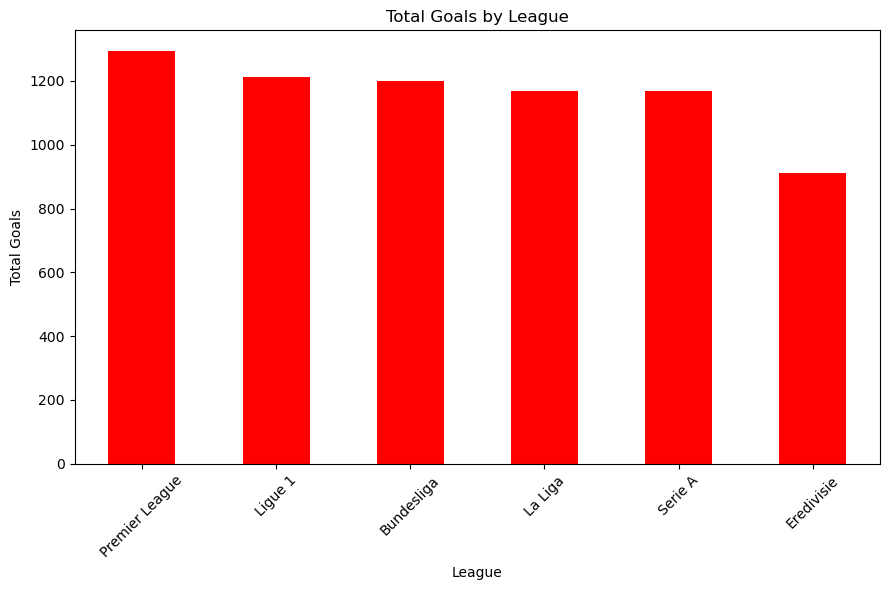

League
Premier League    1294
Ligue 1           1211
Bundesliga        1200
La Liga           1170
Serie A           1168
Eredivisie         911
Name: Performance_Gls, dtype: int64


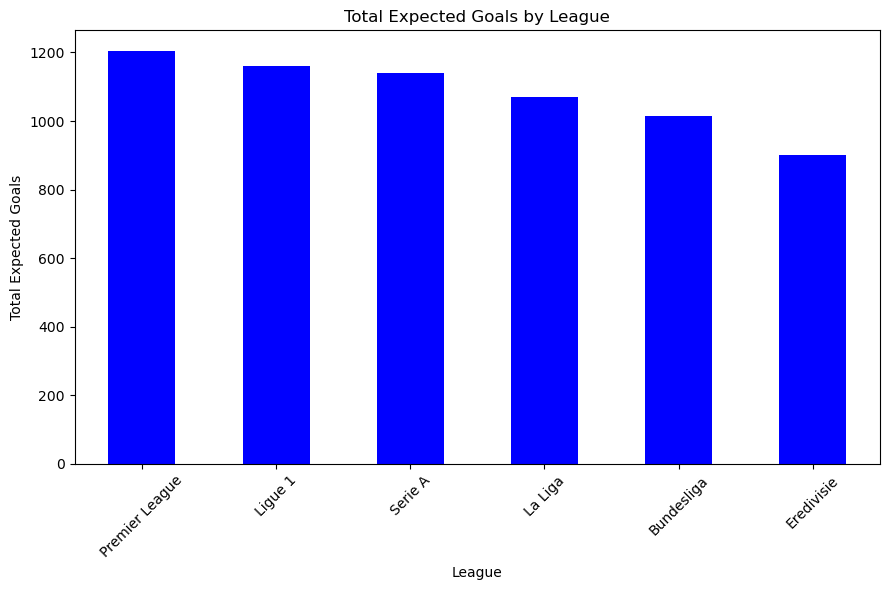

In [22]:
League_goal_sum = Major_League.groupby("League")["Performance_Gls"].sum().sort_values(ascending=False)

League_expectedxg_sum = Major_League.groupby("League")["Expected_xG"].sum().sort_values(ascending=False)


print(League_expectedxg_sum)

plt.figure(figsize=(9, 6))
ax1 = League_goal_sum.plot(kind='bar', color='red')  
ax1.set_facecolor('white') 
plt.xlabel('League')
plt.ylabel('Total Goals')
plt.title('Total Goals by League')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print(League_goal_sum)
plt.figure(figsize=(9, 6))
ax2 = League_expectedxg_sum.plot(kind='bar', color='blue')  
ax2.set_facecolor('white') 
plt.xlabel('League')
plt.ylabel('Total Expected Goals')
plt.title('Total Expected Goals by League')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

           League  Difference
1  Premier League        89.6
2         Ligue 1        49.6
3      Bundesliga        60.9
4         La Liga        98.6
5         Serie A       154.7
6      Eredivisie         8.8


<Figure size 1000x600 with 0 Axes>

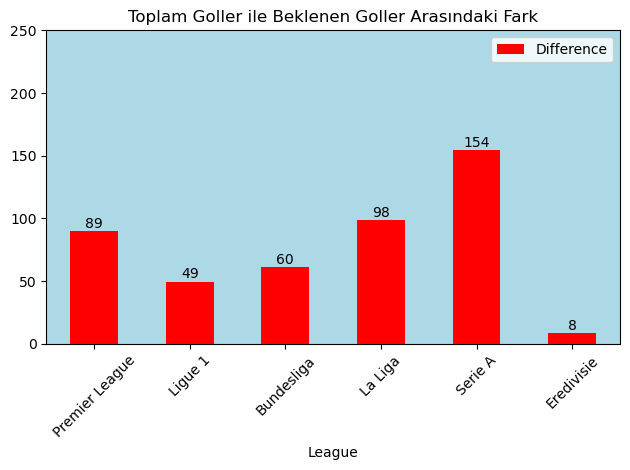

In [23]:
Major_League_difference = pd.DataFrame({
    'League': League_goal_sum.index,
    'Difference': League_goal_sum.values - League_expectedxg_sum.values
})
Major_League_difference.index = range(1, len(Major_League_difference) + 1)
print(Major_League_difference)

plt.figure(figsize=(10, 6))
Major_League_difference = Major_League_difference.set_index('League')
ax = Major_League_difference.plot(kind='bar', color=["red"])
ax.set_facecolor('lightblue')
plt.ylim(0, 250)
plt.xlabel('League')
plt.title('Toplam Goller ile Beklenen Goller Arasındaki Fark')
plt.xticks(rotation=45) 
for i, val in enumerate(Major_League_difference['Difference']):
    plt.text(i, val + 0.1, int(val), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [24]:
Atacker = (Major_League["Main_Pos"] == "Midfielder") | (Major_League["Main_Pos"] == "Forward")
All_The_Major_League_Attacker = Major_League[Atacker]
All_The_Major_League_Attacker.index = range(1, len(All_The_Major_League_Attacker) + 1)
All_The_Major_League_Attacker.head()

,Player,Nation,League,Team,Pos,Main_Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,...,Per 90 Minutes_Gls,Per 90 Minutes.1_Ast,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG
1,Bukayo Saka,eng ENG,Premier League,Arsenal FC,FW,Forward,20,48,42,3733.0,...,0.36,0.27,0.63,0.31,0.58,0.31,0.25,0.56,0.26,0.51
2,Granit Xhaka,ch SUI,Premier League,Arsenal FC,MF,Midfielder,29,47,43,3692.0,...,0.22,0.17,0.39,0.22,0.39,0.14,0.16,0.30,0.14,0.30
3,Gabriel Martinelli,br BRA,Premier League,Arsenal FC,FW,Forward,21,46,40,3427.0,...,0.39,0.18,0.58,0.39,0.58,0.31,0.28,0.59,0.31,0.59
4,Martin Ødegaard,no NOR,Premier League,Arsenal FC,MF,Midfielder,23,45,39,3387.0,...,0.40,0.19,0.58,0.40,0.58,0.28,0.26,0.54,0.28,0.54
5,Thomas Partey,gh GHA,Premier League,Arsenal FC,MF,Midfielder,29,40,29,2698.0,...,0.10,0.00,0.10,0.10,0.10,0.08,0.05,0.13,0.08,0.13


In [25]:
Specific_Major_League_Attacker = pd.read_excel("Specific_Major_League_Attacker.xlsx")

In [26]:
Specific_Major_League_Attacker['Market_Value'] = Specific_Major_League_Attacker['Market_Value'].str.replace(',', '.')


In [27]:
for index, row in Specific_Major_League_Attacker.iterrows():
    market_value_str = row["Market_Value"].replace("€", "").replace("m", "").replace("k","")
    market_value = float(market_value_str)
    if market_value <= 2:
        Specific_Major_League_Attacker.at[index, "market_value_point"] = 1
    elif 2 < market_value <= 4:
        Specific_Major_League_Attacker.at[index, "market_value_point"] = 2
    elif 4 < market_value <= 7:
        Specific_Major_League_Attacker.at[index, "market_value_point"] = 3
    elif 7 < market_value <= 10:
        Specific_Major_League_Attacker.at[index, "market_value_point"] = 4
    elif 10 < market_value <= 15:
        Specific_Major_League_Attacker.at[index, "market_value_point"] = 5
    elif 15 < market_value <= 22:
        Specific_Major_League_Attacker.at[index, "market_value_point"] = 6
    elif 22 < market_value <= 30:
        Specific_Major_League_Attacker.at[index, "market_value_point"] = 7
    elif 30 < market_value <= 40: 
        Specific_Major_League_Attacker.at[index, "market_value_point"] = 8
    elif 40 < market_value <= 60:
        Specific_Major_League_Attacker.at[index, "market_value_point"] = 9
    else:
         Specific_Major_League_Attacker.at[index, "market_value_point"] = 10
Specific_Major_League_Attacker.head()


,Player,Nation,League,Team,Pos,Main_Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,...,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG,Market_Value,market_value_point
0,Bukayo Saka,eng ENG,Premier League,Arsenal FC,FW,Forward,20,48,42,3733,...,0.63,0.31,0.58,0.31,0.25,0.56,0.26,0.51,€120.00m,10
1,Granit Xhaka,ch SUI,Premier League,Arsenal FC,MF,Midfielder,29,47,43,3692,...,0.39,0.22,0.39,0.14,0.16,0.30,0.14,0.30,€20.00m,6
2,Gabriel Martinelli,br BRA,Premier League,Arsenal FC,FW,Forward,21,46,40,3427,...,0.58,0.39,0.58,0.31,0.28,0.59,0.31,0.59,€90.00m,10
3,Martin Ødegaard,no NOR,Premier League,Arsenal FC,MF,Midfielder,23,45,39,3387,...,0.58,0.40,0.58,0.28,0.26,0.54,0.28,0.54,€50.00m,9
4,Thomas Partey,gh GHA,Premier League,Arsenal FC,MF,Midfielder,29,40,29,2698,...,0.10,0.10,0.10,0.08,0.05,0.13,0.08,0.13,€35.00m,8


In [28]:
for index, row in Specific_Major_League_Attacker.iterrows():
    if row['Market_Value'][-1] == 'k':
        Specific_Major_League_Attacker.at[index, 'market_value_point'] = 1
Specific_Major_League_Attacker.tail()

,Player,Nation,League,Team,Pos,Main_Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,...,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG,Market_Value,market_value_point
1467,Oliver Antman,fi FIN,Eredivisie,Groningen,"FW,MF",Forward,20,11,8,670,...,0.40,0.27,0.40,0.18,0.17,0.35,0.18,0.35,€700.00k,1
1468,Cyril Ngonge,be BEL,Eredivisie,Groningen,FW,Forward,22,12,8,655,...,0.69,0.41,0.69,0.31,0.28,0.59,0.31,0.59,€2.00m,1
1469,Elvis Manu,nl NED,Eredivisie,Groningen,FW,Forward,28,10,8,610,...,0.00,0.00,0.00,0.14,0.02,0.16,0.14,0.16,€500.00k,1
1470,Ramon Lundqvist,se SWE,Eredivisie,Groningen,MF,Midfielder,25,13,4,341,...,0.00,0.00,0.00,0.12,0.13,0.26,0.12,0.26,€700.00k,1
1471,Thom van Bergen,nl NED,Eredivisie,Groningen,"FW,DF",Forward,18,12,2,367,...,0.00,0.00,0.00,0.13,0.04,0.18,0.13,0.18,€200.00k,1


In [29]:
Specific_Major_League_Attacker = Specific_Major_League_Attacker.rename(columns={"market_value_point": "Market_Value_Point"}) 
Specific_Major_League_Attacker.head() 


,Player,Nation,League,Team,Pos,Main_Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,...,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG,Market_Value,Market_Value_Point
0,Bukayo Saka,eng ENG,Premier League,Arsenal FC,FW,Forward,20,48,42,3733,...,0.63,0.31,0.58,0.31,0.25,0.56,0.26,0.51,€120.00m,10
1,Granit Xhaka,ch SUI,Premier League,Arsenal FC,MF,Midfielder,29,47,43,3692,...,0.39,0.22,0.39,0.14,0.16,0.30,0.14,0.30,€20.00m,6
2,Gabriel Martinelli,br BRA,Premier League,Arsenal FC,FW,Forward,21,46,40,3427,...,0.58,0.39,0.58,0.31,0.28,0.59,0.31,0.59,€90.00m,10
3,Martin Ødegaard,no NOR,Premier League,Arsenal FC,MF,Midfielder,23,45,39,3387,...,0.58,0.40,0.58,0.28,0.26,0.54,0.28,0.54,€50.00m,9
4,Thomas Partey,gh GHA,Premier League,Arsenal FC,MF,Midfielder,29,40,29,2698,...,0.10,0.10,0.10,0.08,0.05,0.13,0.08,0.13,€35.00m,8


In [30]:
df = pd.read_excel("Specific_Major_League_Attacker___.xlsx")

In [31]:
def remove_first_three_chars(x):
    if isinstance(x, str):
        return x[3:]
    else:
        return x
df['Nation'] = df['Nation'].apply(remove_first_three_chars).str.strip()
df.head()

,Player,Nation,League,Team,Pos,Main_Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,...,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG,Market_Value,Market_Value_Point
0,Bukayo Saka,ENG,Premier League,Arsenal FC,FW,Forward,20,48,42,3733,...,0.63,0.31,0.58,0.31,0.25,0.56,0.26,0.51,€120.00m,10
1,Granit Xhaka,SUI,Premier League,Arsenal FC,MF,Midfielder,29,47,43,3692,...,0.39,0.22,0.39,0.14,0.16,0.30,0.14,0.30,€20.00m,6
2,Gabriel Martinelli,BRA,Premier League,Arsenal FC,FW,Forward,21,46,40,3427,...,0.58,0.39,0.58,0.31,0.28,0.59,0.31,0.59,€90.00m,10
3,Martin Ødegaard,NOR,Premier League,Arsenal FC,MF,Midfielder,23,45,39,3387,...,0.58,0.40,0.58,0.28,0.26,0.54,0.28,0.54,€50.00m,9
4,Thomas Partey,GHA,Premier League,Arsenal FC,MF,Midfielder,29,40,29,2698,...,0.10,0.10,0.10,0.08,0.05,0.13,0.08,0.13,€35.00m,8


In [32]:
df.index = range(1, len(df) + 1)
df.head()

,Player,Nation,League,Team,Pos,Main_Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,...,Per 90 Minutes.2_G+A,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG,Market_Value,Market_Value_Point
1,Bukayo Saka,ENG,Premier League,Arsenal FC,FW,Forward,20,48,42,3733,...,0.63,0.31,0.58,0.31,0.25,0.56,0.26,0.51,€120.00m,10
2,Granit Xhaka,SUI,Premier League,Arsenal FC,MF,Midfielder,29,47,43,3692,...,0.39,0.22,0.39,0.14,0.16,0.30,0.14,0.30,€20.00m,6
3,Gabriel Martinelli,BRA,Premier League,Arsenal FC,FW,Forward,21,46,40,3427,...,0.58,0.39,0.58,0.31,0.28,0.59,0.31,0.59,€90.00m,10
4,Martin Ødegaard,NOR,Premier League,Arsenal FC,MF,Midfielder,23,45,39,3387,...,0.58,0.40,0.58,0.28,0.26,0.54,0.28,0.54,€50.00m,9
5,Thomas Partey,GHA,Premier League,Arsenal FC,MF,Midfielder,29,40,29,2698,...,0.10,0.10,0.10,0.08,0.05,0.13,0.08,0.13,€35.00m,8


League
Premier League    1026.1
Ligue 1            956.8
Serie A            909.1
La Liga            898.6
Bundesliga         837.1
Eredivisie         746.1
Name: Expected_xG, dtype: float64


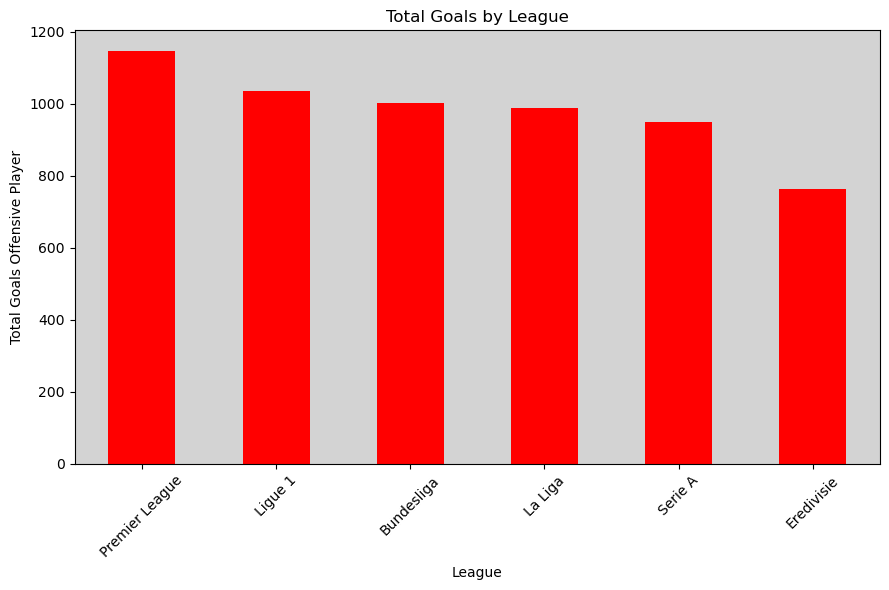

League
Premier League    1147
Ligue 1           1035
Bundesliga        1003
La Liga            989
Serie A            950
Eredivisie         764
Name: Performance_Gls, dtype: int64


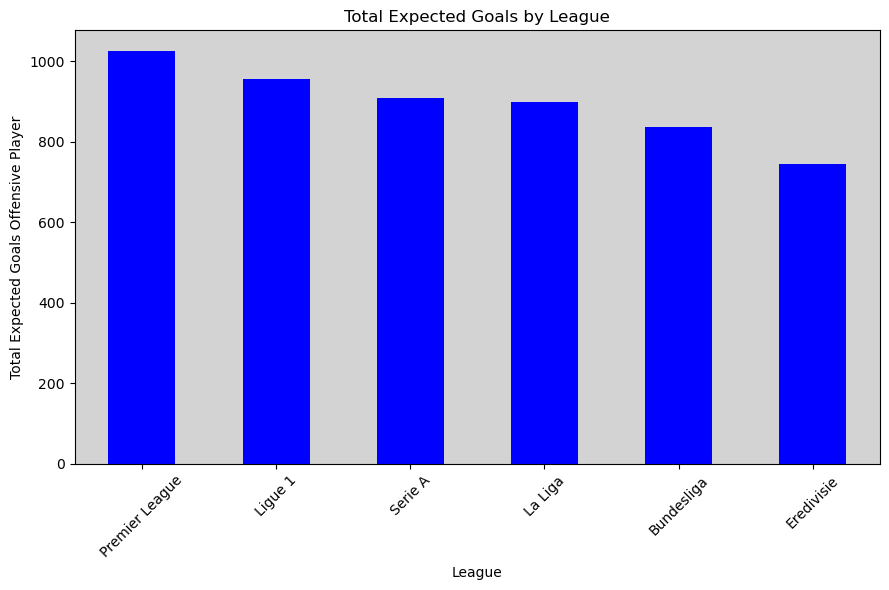

In [33]:
League_goal_sum = df.groupby("League")["Performance_Gls"].sum().sort_values(ascending=False)

League_expectedxg_sum = df.groupby("League")["Expected_xG"].sum().sort_values(ascending=False)
print(League_expectedxg_sum)
plt.figure(figsize=(9, 6))
ax1 = League_goal_sum.plot(kind='bar', color='red')  
ax1.set_facecolor('lightgray') 
plt.xlabel('League')
plt.ylabel('Total Goals Offensive Player')
plt.title('Total Goals by League')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



print(League_goal_sum)
plt.figure(figsize=(9, 6))
ax2 = League_expectedxg_sum.plot(kind='bar', color='blue')  
ax2.set_facecolor('lightgray') 
plt.xlabel('League')
plt.ylabel('Total Expected Goals Offensive Player')
plt.title('Total Expected Goals by League')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

           League  Difference
0  Premier League       120.9
1         Ligue 1        78.2
2      Bundesliga        93.9
3         La Liga        90.4
4         Serie A       112.9
5      Eredivisie        17.9


<Figure size 1000x600 with 0 Axes>

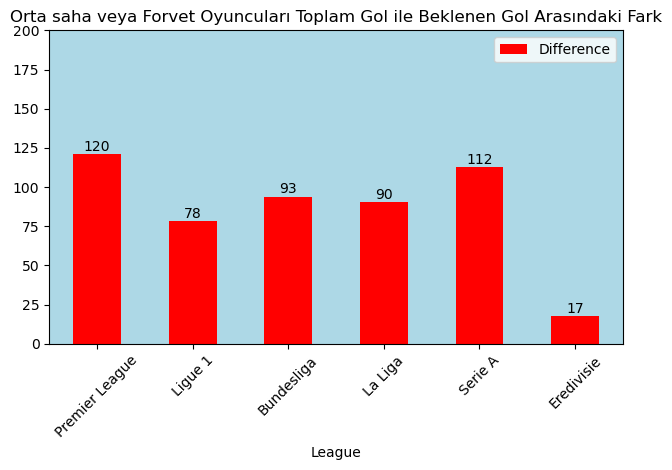

In [34]:
df_difference = pd.DataFrame({
    'League': League_goal_sum.index,
    'Difference': League_goal_sum.values - League_expectedxg_sum.values
})
print(df_difference)
df_difference = df_difference.set_index('League')
plt.figure(figsize=(10, 6))
ax = df_difference.plot(kind='bar', color=["red"])
ax.set_facecolor('lightblue')
plt.ylim(0, 200)
plt.xlabel('League')
plt.title('Orta saha veya Forvet Oyuncuları Toplam Gol ile Beklenen Gol Arasındaki Fark')
plt.xticks(rotation=45) 
for i, val in enumerate(df_difference['Difference']):
    plt.text(i, val + 0.1, int(val), ha='center', va='bottom')
plt.tight_layout()
plt.show()

#### Sort "Progression_PrgC" column from largest to smallest ####

In [35]:
dfc = df.sort_values(by="Progression_PrgC", ascending=False)
dfc = dfc[["Player", "Nation", "League", "Team", "Main_Pos", "Age", "Progression_PrgC","Market_Value"]]
dfc.reset_index(drop=True, inplace=True)
dfc.index += 1
styled_dfr1 = dfc.head(5).style.set_caption("Rakip Sahada Top Sürme Değerlerine Göre İlk 5 Oyuncu")
styled_dfr1


,Player,Nation,League,Team,Main_Pos,Age,Progression_PrgC,Market_Value
1,Vinicius Júnior,BRA,La Liga,Real Madrid CF,Forward,22,291,€150.00m
2,Jeremie Frimpong,NED,Bundesliga,Bayer 04 Leverkusen,Midfielder,21,219,€40.00m
3,Kylian Mbappé,FRA,Ligue 1,Paris Saint-Germain FC,Forward,23,210,€180.00m
4,Bukayo Saka,ENG,Premier League,Arsenal FC,Forward,20,201,€120.00m
5,Khvicha Kvaratskhelia,GEO,Serie A,SSC Napoli,Forward,21,191,€85.00m


#### Sort "Progression_PrgP" column from largest to smallest ####

In [36]:
dfp = df.sort_values(by="Progression.1_PrgP", ascending=False)
dfp = dfp[["Player", "Nation", "League", "Team", "Main_Pos", "Age", "Progression.1_PrgP","Market_Value"]]
dfp.reset_index(drop=True, inplace=True)
dfp.index += 1
styled_dfr2 = dfp.head(5).style.set_caption("Rakip Sahada Pas Atma Değerlerine Göre İlk 5 Oyuncu")
styled_dfr2


,Player,Nation,League,Team,Main_Pos,Age,Progression.1_PrgP,Market_Value
1,Toni Kroos,GER,La Liga,Real Madrid CF,Midfielder,32,407,€15.00m
2,Joshua Kimmich,GER,Bundesliga,FC Bayern München,Midfielder,27,397,€75.00m
3,Orkun Kökçü,TUR,Eredivisie,Feyenoord,Midfielder,21,379,€35.00m
4,Lionel Messi,ARG,Ligue 1,Paris Saint-Germain FC,Forward,35,353,€35.00m
5,Bruno Fernandes,POR,Premier League,Manchester United FC,Midfielder,27,327,€75.00m


#### Sort "Progression_PrgR" column from largest to smallest 

In [37]:
dfr = df.sort_values(by="Progression.2_PrgR", ascending=False)
dfr = dfr[["Player", "Nation", "League", "Team", "Main_Pos", "Age", "Progression.2_PrgR","Market_Value"]]
dfr.reset_index(drop=True, inplace=True)
dfr.index += 1
styled_dfr3 = dfr.head(5).style.set_caption("Rakip Sahada Topla Buluşma Değerlerine Göre İlk 5 Oyuncu")

styled_dfr3

,Player,Nation,League,Team,Main_Pos,Age,Progression.2_PrgR,Market_Value
1,Vinicius Júnior,BRA,La Liga,Real Madrid CF,Forward,22,625,€150.00m
2,Dušan Tadić,SRB,Eredivisie,Ajax,Forward,33,585,€6.00m
3,Bukayo Saka,ENG,Premier League,Arsenal FC,Forward,20,582,€120.00m
4,Kylian Mbappé,FRA,Ligue 1,Paris Saint-Germain FC,Forward,23,561,€180.00m
5,Mohamed Salah,EGY,Premier League,Liverpool FC,Forward,30,508,€65.00m


We don't have a column for the total of non-penalty goals and assists, so we are adding it first

Penaltı dışı gollerin ve asistlerin toplamını gösteren bir sütunumuz yok, bu yüzden önce bunu ekliyoruz

In [38]:
df['Performance.8_G+A-PK'] = df['Performance.2_G+A'] - df['Performance.4_PK']
df.insert(loc=19, column='Performance.8_G+A-PK', value=df.pop('Performance.8_G+A-PK'))
df.columns

Index(['Player', 'Nation', 'League', 'Team', 'Pos', 'Main_Pos', 'Age', 'MP',
       'Playing Time_Starts', 'Playing Time.1_Min', 'Playing Time.2_90s',
       'Performance_Gls', 'Performance.1_Ast', 'Performance.2_G+A',
       'Performance.3_G-PK', 'Performance.4_PK', 'Performance.5_PKatt',
       'Performance.6_CrdY', 'Performance.7_CrdR', 'Performance.8_G+A-PK',
       'Expected_xG', 'Expected.1_npxG', 'Expected.2_xAG',
       'Expected.3_npxG+xAG', 'Progression_PrgC', 'Progression.1_PrgP',
       'Progression.2_PrgR', 'Per 90 Minutes_Gls', 'Per 90 Minutes.1_Ast',
       'Per 90 Minutes.2_G+A', 'Per 90 Minutes.3_G-PK',
       'Per 90 Minutes.4_G+A-PK', 'Per 90 Minutes.5_xG',
       'Per 90 Minutes.6_xAG', 'Per 90 Minutes.7_xG+xAG',
       'Per 90 Minutes.8_npxG', 'Per 90 Minutes.9_npxG+xAG', 'Market_Value',
       'Market_Value_Point'],
      dtype='object')

The process we undertake to identify footballers with a positive deviation by comparing their actual contribution to the expected contribution throughout the season.



Sezon boyunca beklenen katkı ile gerçek katkılarını karşılaştırarak olumlu sapma gösteren futbolcuları tespit etmek

In [39]:
df.columns

Index(['Player', 'Nation', 'League', 'Team', 'Pos', 'Main_Pos', 'Age', 'MP',
       'Playing Time_Starts', 'Playing Time.1_Min', 'Playing Time.2_90s',
       'Performance_Gls', 'Performance.1_Ast', 'Performance.2_G+A',
       'Performance.3_G-PK', 'Performance.4_PK', 'Performance.5_PKatt',
       'Performance.6_CrdY', 'Performance.7_CrdR', 'Performance.8_G+A-PK',
       'Expected_xG', 'Expected.1_npxG', 'Expected.2_xAG',
       'Expected.3_npxG+xAG', 'Progression_PrgC', 'Progression.1_PrgP',
       'Progression.2_PrgR', 'Per 90 Minutes_Gls', 'Per 90 Minutes.1_Ast',
       'Per 90 Minutes.2_G+A', 'Per 90 Minutes.3_G-PK',
       'Per 90 Minutes.4_G+A-PK', 'Per 90 Minutes.5_xG',
       'Per 90 Minutes.6_xAG', 'Per 90 Minutes.7_xG+xAG',
       'Per 90 Minutes.8_npxG', 'Per 90 Minutes.9_npxG+xAG', 'Market_Value',
       'Market_Value_Point'],
      dtype='object')

In [40]:
df["Perfonmance_Score-Expected_Score"] = df['Performance.8_G+A-PK'] - df['Expected.3_npxG+xAG']
df.insert(loc=39, column='Perfonmance_Score-Expected_Score', value=df.pop('Perfonmance_Score-Expected_Score'))
df_score = df.sort_values(by = "Perfonmance_Score-Expected_Score", ascending = False)
df_score = df_score[["Player", "Nation", "League", "Team", "Main_Pos", "Age","Perfonmance_Score-Expected_Score"]]
df_score.reset_index(drop=True, inplace=True)
df_score.index += 1
df_score.head()


,Player,Nation,League,Team,Main_Pos,Age,Perfonmance_Score-Expected_Score
1,Randal Kolo Muani,FRA,Bundesliga,Eintracht Frankfurt,Forward,23,14.2
2,Marcus Rashford,ENG,Premier League,Manchester United FC,Forward,24,13.1
3,Kylian Mbappé,FRA,Ligue 1,Paris Saint-Germain FC,Forward,23,12.6
4,Jamal Musiala,GER,Bundesliga,FC Bayern München,Midfielder,19,10.9
5,Eric Maxim Choupo-Moting,CMR,Bundesliga,FC Bayern München,Forward,33,10.8


In [41]:
ab = df[df["Player"] == "Eric Maxim Choupo-Moting"]
ab[ab["Player"] == "Eric Choupo-Moting"]
df_score.head()

,Player,Nation,League,Team,Main_Pos,Age,Perfonmance_Score-Expected_Score
1,Randal Kolo Muani,FRA,Bundesliga,Eintracht Frankfurt,Forward,23,14.2
2,Marcus Rashford,ENG,Premier League,Manchester United FC,Forward,24,13.1
3,Kylian Mbappé,FRA,Ligue 1,Paris Saint-Germain FC,Forward,23,12.6
4,Jamal Musiala,GER,Bundesliga,FC Bayern München,Midfielder,19,10.9
5,Eric Maxim Choupo-Moting,CMR,Bundesliga,FC Bayern München,Forward,33,10.8


In [42]:
df.head()

,Player,Nation,League,Team,Pos,Main_Pos,Age,MP,Playing Time_Starts,Playing Time.1_Min,...,Per 90 Minutes.3_G-PK,Per 90 Minutes.4_G+A-PK,Per 90 Minutes.5_xG,Per 90 Minutes.6_xAG,Per 90 Minutes.7_xG+xAG,Per 90 Minutes.8_npxG,Per 90 Minutes.9_npxG+xAG,Market_Value,Market_Value_Point,Perfonmance_Score-Expected_Score
1,Bukayo Saka,ENG,Premier League,Arsenal FC,FW,Forward,20,48,42,3733,...,0.31,0.58,0.31,0.25,0.56,0.26,0.51,€120.00m,10,4.0
2,Granit Xhaka,SUI,Premier League,Arsenal FC,MF,Midfielder,29,47,43,3692,...,0.22,0.39,0.14,0.16,0.30,0.14,0.30,€20.00m,6,4.2
3,Gabriel Martinelli,BRA,Premier League,Arsenal FC,FW,Forward,21,46,40,3427,...,0.39,0.58,0.31,0.28,0.59,0.31,0.59,€90.00m,10,0.6
4,Martin Ødegaard,NOR,Premier League,Arsenal FC,MF,Midfielder,23,45,39,3387,...,0.40,0.58,0.28,0.26,0.54,0.28,0.54,€50.00m,9,2.0
5,Thomas Partey,GHA,Premier League,Arsenal FC,MF,Midfielder,29,40,29,2698,...,0.10,0.10,0.08,0.05,0.13,0.08,0.13,€35.00m,8,-0.8


In [43]:
df.columns

Index(['Player', 'Nation', 'League', 'Team', 'Pos', 'Main_Pos', 'Age', 'MP',
       'Playing Time_Starts', 'Playing Time.1_Min', 'Playing Time.2_90s',
       'Performance_Gls', 'Performance.1_Ast', 'Performance.2_G+A',
       'Performance.3_G-PK', 'Performance.4_PK', 'Performance.5_PKatt',
       'Performance.6_CrdY', 'Performance.7_CrdR', 'Performance.8_G+A-PK',
       'Expected_xG', 'Expected.1_npxG', 'Expected.2_xAG',
       'Expected.3_npxG+xAG', 'Progression_PrgC', 'Progression.1_PrgP',
       'Progression.2_PrgR', 'Per 90 Minutes_Gls', 'Per 90 Minutes.1_Ast',
       'Per 90 Minutes.2_G+A', 'Per 90 Minutes.3_G-PK',
       'Per 90 Minutes.4_G+A-PK', 'Per 90 Minutes.5_xG',
       'Per 90 Minutes.6_xAG', 'Per 90 Minutes.7_xG+xAG',
       'Per 90 Minutes.8_npxG', 'Per 90 Minutes.9_npxG+xAG', 'Market_Value',
       'Market_Value_Point', 'Perfonmance_Score-Expected_Score'],
      dtype='object')


Players who contributed the most non-penalty scores during the season.

Sezon boyunca penaltı dışı skorlara en çok katkıda bulunan oyuncular.







In [44]:
df_score1 = df.sort_values(by = "Performance.8_G+A-PK", ascending = False)
df_score1 = df_score1[["Player","Nation","League","Team","Performance.8_G+A-PK","Expected.1_npxG","Expected.2_xAG","Expected.3_npxG+xAG"]]
df_score1.reset_index(drop=True, inplace=True)
df_score1.index += 1
df_score1.head(10)

,Player,Nation,League,Team,Performance.8_G+A-PK,Expected.1_npxG,Expected.2_xAG,Expected.3_npxG+xAG
1,Kylian Mbappé,FRA,Ligue 1,Paris Saint-Germain FC,46,25.0,8.4,33.4
2,Mohamed Salah,EGY,Premier League,Liverpool FC,42,21.7,10.3,32.0
3,Lionel Messi,ARG,Ligue 1,Paris Saint-Germain FC,40,18.1,15.6,33.7
4,Robert Lewandowski,POL,La Liga,FC Barcelona,40,26.8,7.1,33.8
5,Vinicius Júnior,BRA,La Liga,Real Madrid CF,39,17.0,12.1,29.1
6,Marcus Rashford,ENG,Premier League,Manchester United FC,38,20.6,4.3,24.9
7,Erling Haaland,NOR,Premier League,Manchester City FC,37,23.0,5.3,28.3
8,Lautaro Martínez,ARG,Serie A,Inter Milan,37,19.4,7.2,26.6
9,Antoine Griezmann,FRA,La Liga,Atlético Madrid,34,14.0,15.0,29.0
10,Randal Kolo Muani,FRA,Bundesliga,Eintracht Frankfurt,34,13.0,6.8,19.8



To categorize players into the same categories based on their market values, we will utilize the rating system we assigned according to their market values.

Oyuncuları piyasa değerlerine göre aynı kategorilere ayırmak için piyasa değerlerine göre belirlediğimiz derecelendirme sistemini kullanacağız.

In [45]:
one_point = df[df['Market_Value_Point'] == 1 ]
two_point = df[df['Market_Value_Point'] == 2 ]
three_point = df[df['Market_Value_Point'] == 3 ]
four_point = df[df['Market_Value_Point'] == 4 ]
five_point = df[df['Market_Value_Point'] ==  5 ]
six_point = df[df['Market_Value_Point'] == 6 ]
seven_point = df[df['Market_Value_Point'] == 7 ]
eight_point = df[df['Market_Value_Point'] == 8 ]
nine_point = df[df['Market_Value_Point'] == 9 ]
ten_point = df[df['Market_Value_Point'] == 10 ]


We clustered players with the same score according to the rating system determined by their values, and compared players within the same cluster.



Aynı puana sahip oyuncuları, değerlerine göre belirlenen derecelendirme sistemine göre kümeledik ve aynı küme içindeki oyuncuları karşılaştırdık.

In [46]:
one_point_sort_values = one_point.sort_values(by = "Perfonmance_Score-Expected_Score", ascending = False)
one_point_sort_values = one_point_sort_values[["Player", "Nation", "League", "Team", "Main_Pos", "Age", "Performance.8_G+A-PK","Expected.3_npxG+xAG","Perfonmance_Score-Expected_Score","Market_Value"]]
one_point_sort_values.reset_index(drop=True, inplace=True)
one_point_sort_values.index += 1
one_point_sort_values.head()

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Expected.3_npxG+xAG,Perfonmance_Score-Expected_Score,Market_Value
1,Lars Stindl,GER,Bundesliga,Borussia Mönchengladbach,Forward,33,19,11.2,7.8,€1.00m
2,Dani Rodríguez,ESP,La Liga,RCD Mallorca,Midfielder,34,12,5.6,6.4,€1.20m
3,Dominick Drexler,GER,Bundesliga,FC Schalke 04,Midfielder,32,10,4.5,5.5,€750.00k
4,Anas Tahiri,BEL,Eredivisie,Heerenveen,Midfielder,27,8,3.4,4.6,€1.20m
5,Sergio León,ESP,La Liga,Real Valladolid CF,Forward,33,8,3.5,4.5,€2.00m


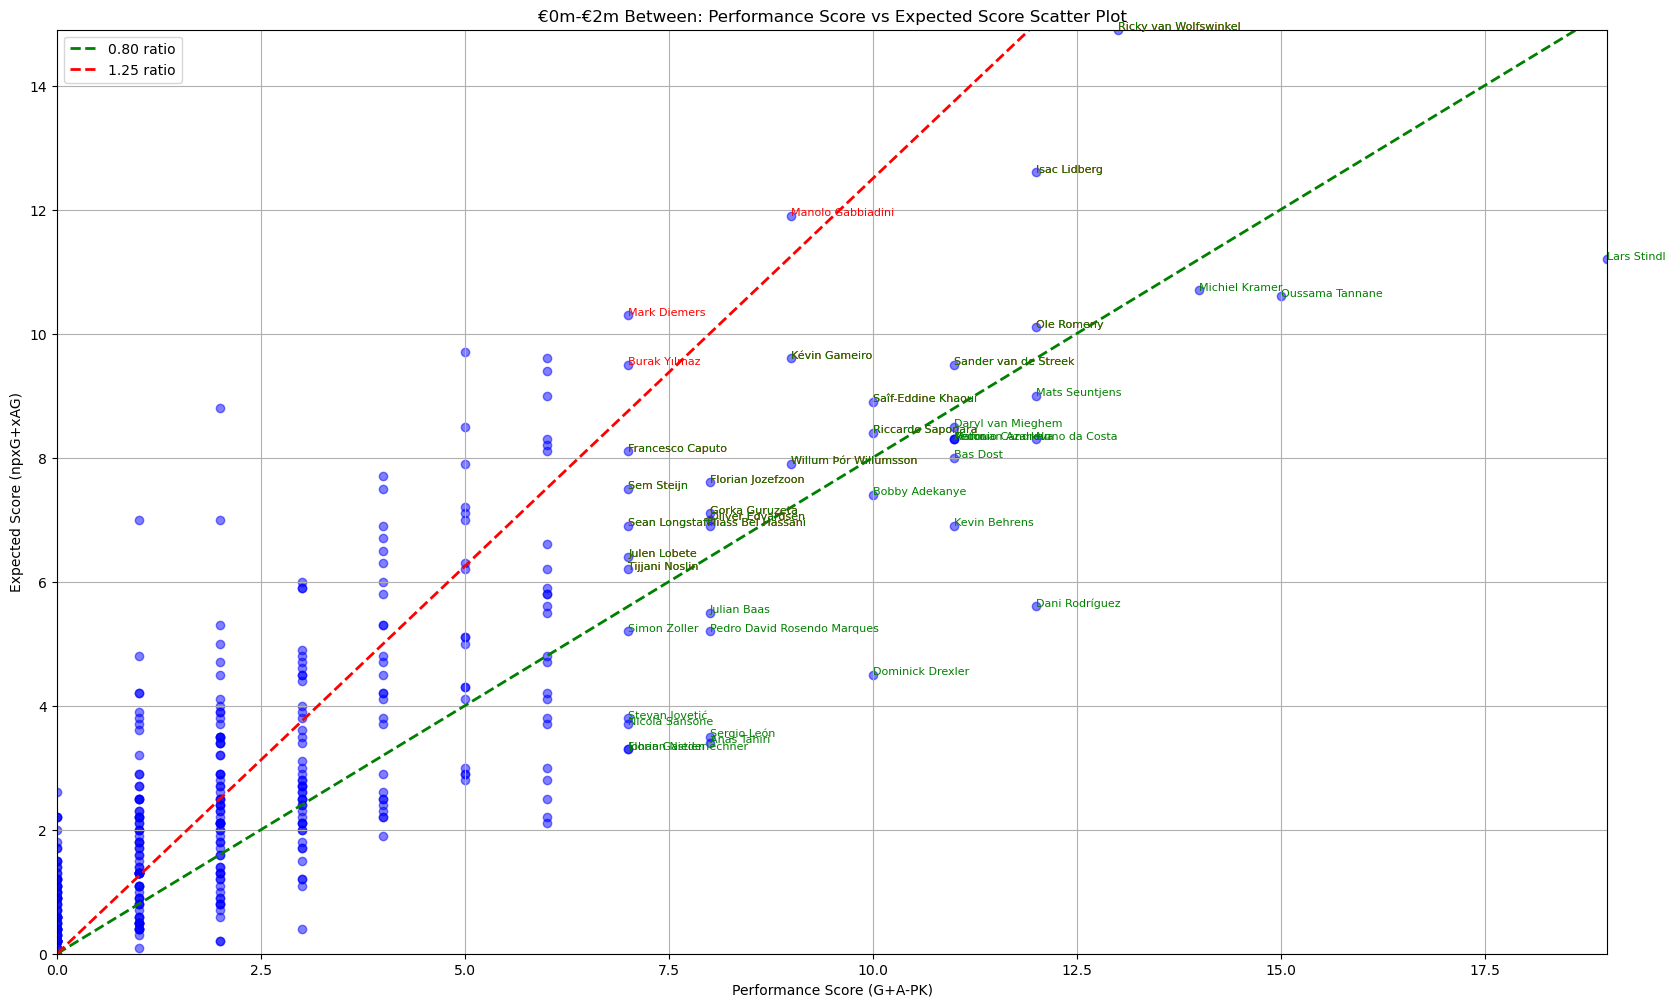

In [47]:


selected_players = one_point[(one_point['Performance.8_G+A-PK'] >= 7) & (one_point["Expected.3_npxG+xAG"] >= 3)]

selected_players_red = selected_players[selected_players['Expected.3_npxG+xAG']  > 0.80 * selected_players['Performance.8_G+A-PK']]
selected_players_green = selected_players[selected_players['Expected.3_npxG+xAG'] < 1.25 * selected_players['Performance.8_G+A-PK']]
plt.figure(figsize=(20, 12))

plt.scatter(one_point['Performance.8_G+A-PK'], one_point['Expected.3_npxG+xAG'], color='blue', alpha=0.5)

for _, row in selected_players_red.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='red')

for _, row in selected_players_green.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='green')

plt.plot([0, max(one_point['Performance.8_G+A-PK'])], [0, max(one_point['Performance.8_G+A-PK']) * 0.80], color='green', linestyle='--', linewidth=2, label='0.80 ratio')
plt.plot([0, max(one_point['Performance.8_G+A-PK'])], [0, max(one_point['Performance.8_G+A-PK']) * 1.25], color='red', linestyle='--', linewidth=2, label='1.25 ratio')

plt.title('€0m-€2m Between: Performance Score vs Expected Score Scatter Plot')
plt.xlabel('Performance Score (G+A-PK)')
plt.ylabel('Expected Score (npxG+xAG)')
plt.grid(True)


plt.xlim(0, max(one_point['Performance.8_G+A-PK']))
plt.ylim(0, max(one_point['Expected.3_npxG+xAG']))

plt.legend()

plt.show()

In [48]:
two_point_sort_values = two_point.sort_values(by = "Perfonmance_Score-Expected_Score", ascending = False)
two_point_sort_values = two_point_sort_values[["Player", "Nation", "League", "Team", "Main_Pos", "Age", "Performance.8_G+A-PK","Expected.3_npxG+xAG","Perfonmance_Score-Expected_Score","Market_Value"]]
two_point_sort_values.reset_index(drop=True, inplace=True)
two_point_sort_values.index += 1
two_point_sort_values.head()

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Expected.3_npxG+xAG,Perfonmance_Score-Expected_Score,Market_Value
1,Pierre Lees-Melou,FRA,Ligue 1,Stade Brestois,Midfielder,29,11,4.4,6.6,€4.00m
2,Koki Saito,JPN,Eredivisie,Sparta Rotterdam,Forward,20,12,5.8,6.2,€3.00m
3,Vito van Crooy,NED,Eredivisie,Sparta Rotterdam,Forward,26,19,13.5,5.5,€2.20m
4,Philipp Förster,GER,Bundesliga,VfL Bochum,Midfielder,27,10,4.8,5.2,€2.80m
5,José Luis Morales,ESP,La Liga,Villarreal CF,Forward,35,16,11.0,5.0,€3.00m


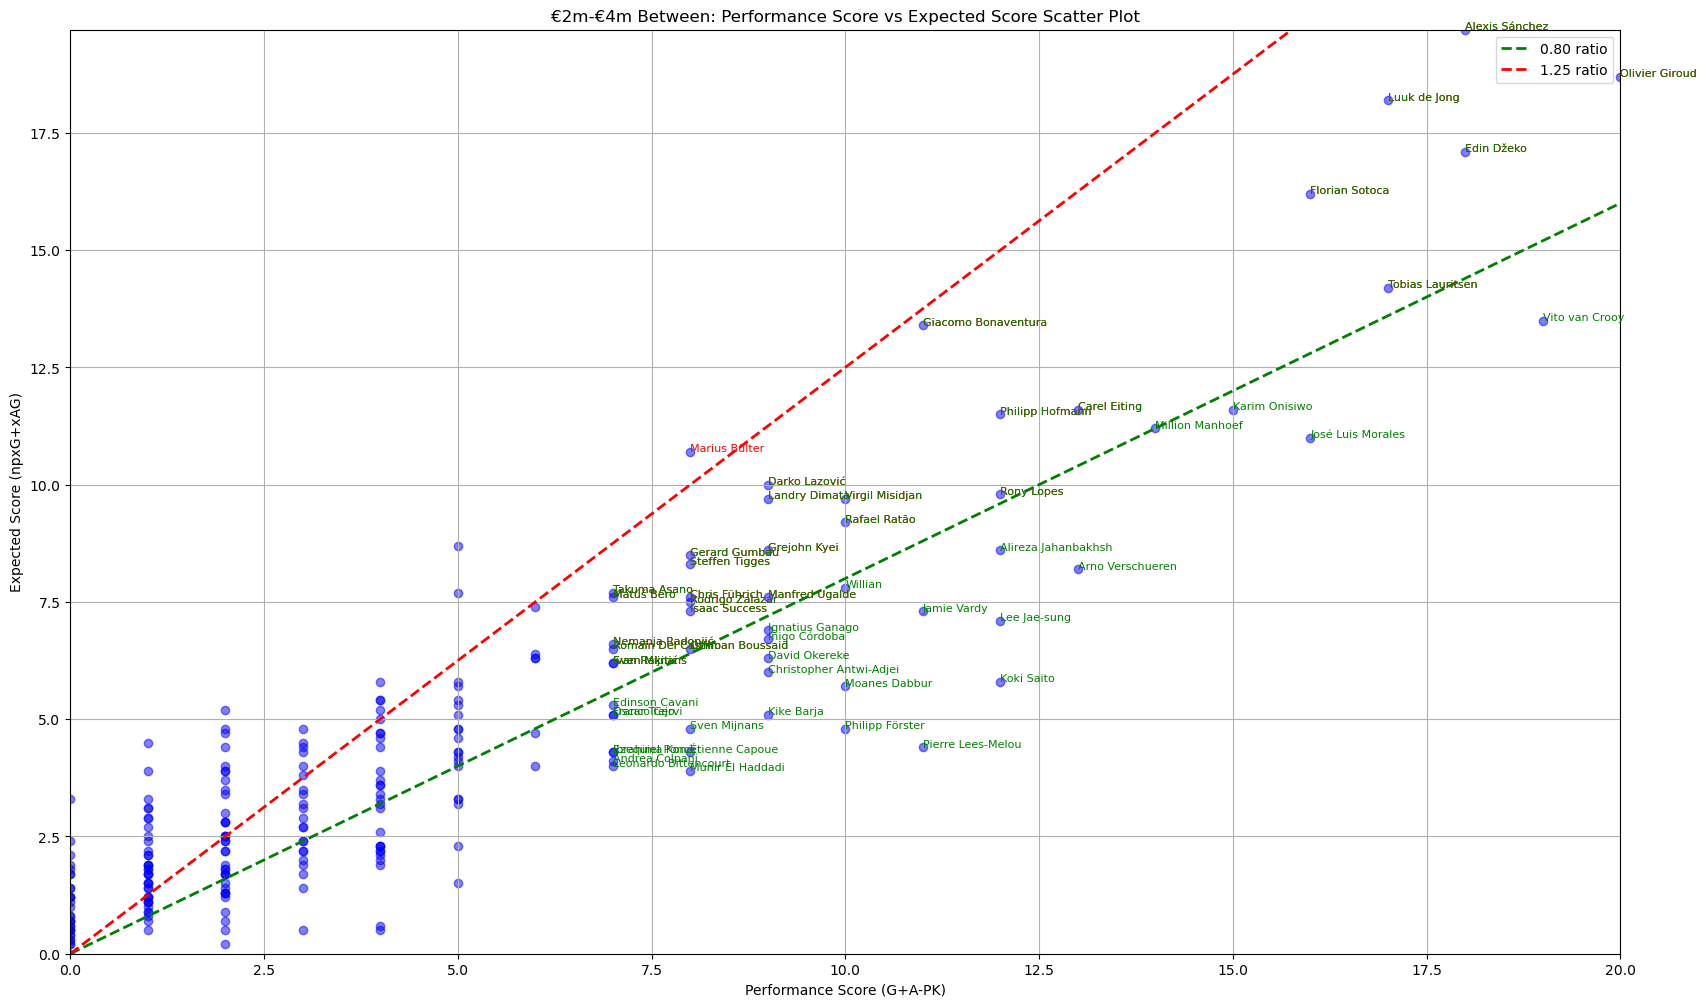

In [49]:
selected_players = two_point[(two_point['Performance.8_G+A-PK'] >= 7) & (two_point["Expected.3_npxG+xAG"] >= 3)]

selected_players_red = selected_players[selected_players['Expected.3_npxG+xAG'] > 0.80 * selected_players['Performance.8_G+A-PK']]
selected_players_green = selected_players[selected_players['Expected.3_npxG+xAG']< 1.25 * selected_players['Performance.8_G+A-PK']]

plt.figure(figsize=(20, 12))

plt.scatter(two_point['Performance.8_G+A-PK'], two_point['Expected.3_npxG+xAG'], color='blue', alpha=0.5)

for _, row in selected_players_red.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='red')

for _, row in selected_players_green.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='green')

plt.plot([0, max(two_point['Performance.8_G+A-PK'])], [0, max(two_point['Performance.8_G+A-PK']) * 0.80], color='green', linestyle='--', linewidth=2, label='0.80 ratio')
plt.plot([0, max(two_point['Performance.8_G+A-PK'])], [0, max(two_point['Performance.8_G+A-PK']) * 1.25], color='red', linestyle='--', linewidth=2, label='1.25 ratio')

plt.title('€2m-€4m Between: Performance Score vs Expected Score Scatter Plot')
plt.xlabel('Performance Score (G+A-PK)')
plt.ylabel('Expected Score (npxG+xAG)')
plt.grid(True)

plt.xlim(0, max(two_point['Performance.8_G+A-PK']))
plt.ylim(0, max(two_point['Expected.3_npxG+xAG']))

plt.legend()

plt.show()

In [50]:
three_point_sort_values = three_point.sort_values(by = "Perfonmance_Score-Expected_Score", ascending = False)
three_point_sort_values = three_point_sort_values[["Player", "Nation", "League", "Team", "Main_Pos", "Age", "Performance.8_G+A-PK","Expected.3_npxG+xAG","Perfonmance_Score-Expected_Score","Market_Value"]]
three_point_sort_values.reset_index(drop=True, inplace=True)
three_point_sort_values.index += 1
three_point_sort_values.head()

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Expected.3_npxG+xAG,Perfonmance_Score-Expected_Score,Market_Value
1,Eric Maxim Choupo-Moting,CMR,Bundesliga,FC Bayern München,Forward,33,21,10.2,10.8,€5.00m
2,Emil Forsberg,SWE,Bundesliga,RB Leipzig,Midfielder,30,14,6.7,7.3,€7.00m
3,Rodrigo,ESP,Premier League,Leeds United AFC,Forward,31,16,9.1,6.9,€6.00m
4,Carles Pérez,ESP,La Liga,RC Celta de Vigo,Midfielder,24,11,4.7,6.3,€5.00m
5,Adrien Thomasson,FRA,Ligue 1,Lens,Midfielder,28,11,5.8,5.2,€6.00m


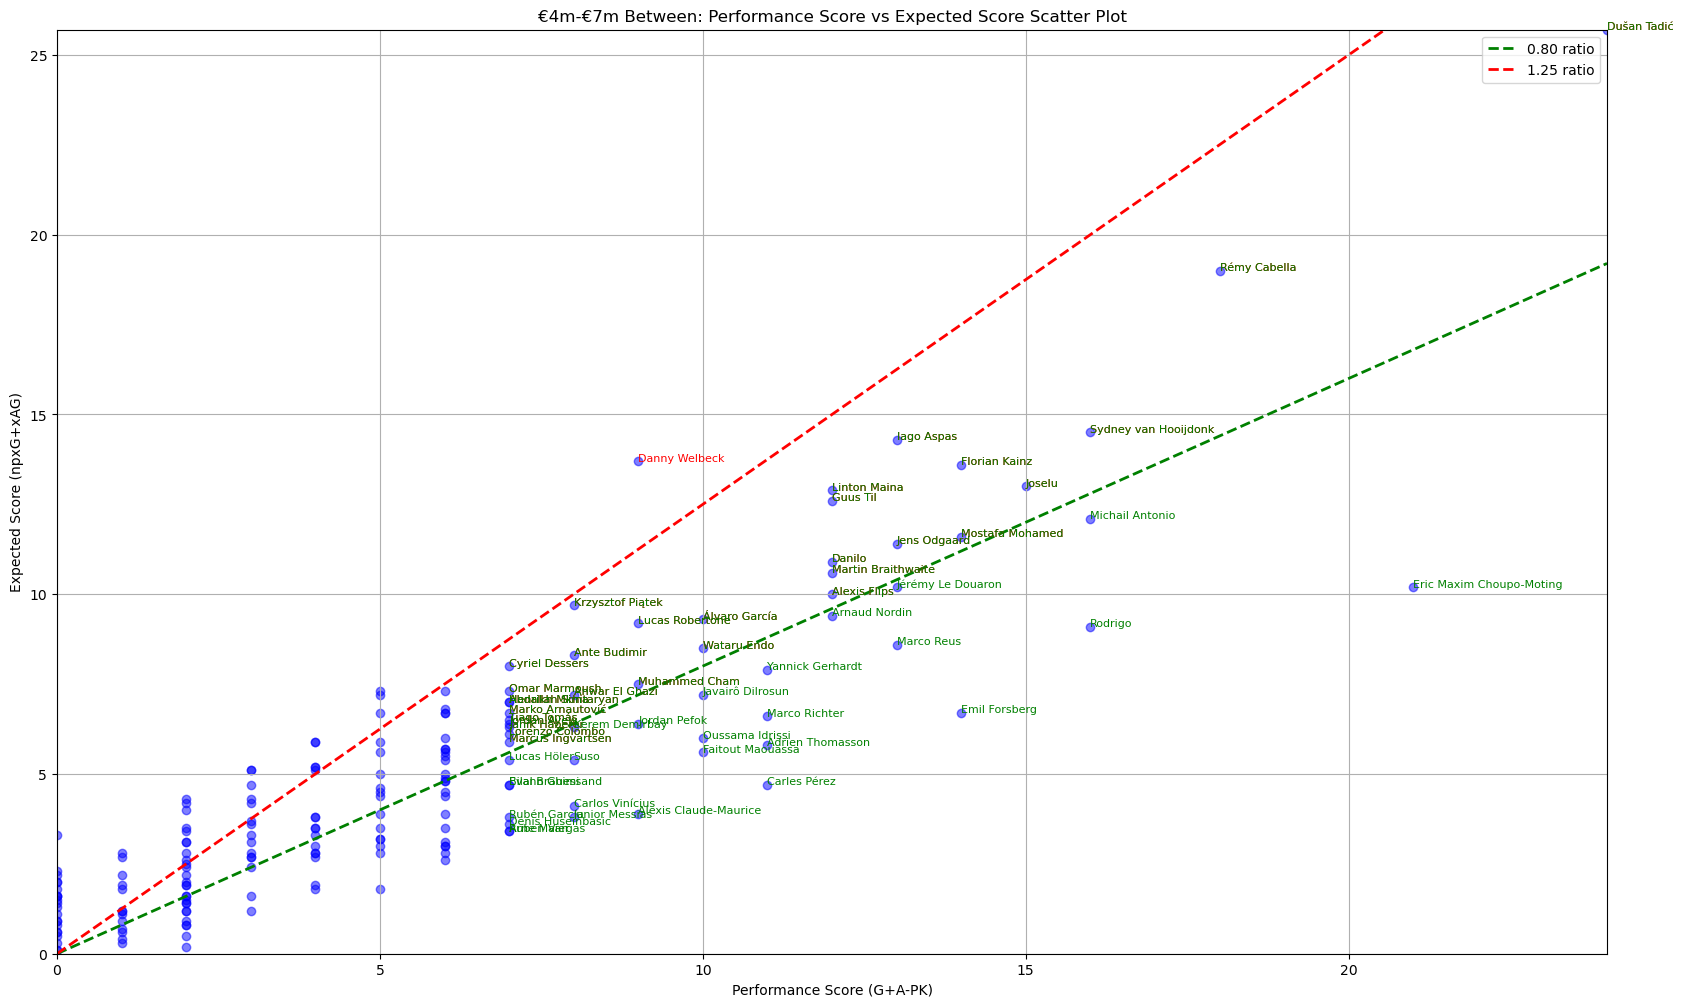

In [51]:

plt.figure(figsize=(20, 12))

selected_players = three_point[(three_point['Performance.8_G+A-PK'] >= 7) & (three_point["Expected.3_npxG+xAG"] >= 3)]

selected_players_red = selected_players[selected_players['Expected.3_npxG+xAG'] > 0.80 * selected_players['Performance.8_G+A-PK']]
selected_players_green = selected_players[selected_players['Expected.3_npxG+xAG'] < 1.25 * selected_players['Performance.8_G+A-PK']]

plt.scatter(three_point['Performance.8_G+A-PK'], three_point['Expected.3_npxG+xAG'], color='blue', alpha=0.5)

for _, row in selected_players_red.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='red')

for _, row in selected_players_green.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='green')

plt.plot([0, max(three_point['Performance.8_G+A-PK'])], [0, max(three_point['Performance.8_G+A-PK']) * 0.80], color='green', linestyle='--', linewidth=2, label='0.80 ratio')
plt.plot([0, max(three_point['Performance.8_G+A-PK'])], [0, max(three_point['Performance.8_G+A-PK']) * 1.25], color='red', linestyle='--', linewidth=2, label='1.25 ratio')

plt.title('€4m-€7m Between: Performance Score vs Expected Score Scatter Plot')
plt.xlabel('Performance Score (G+A-PK)')
plt.ylabel('Expected Score (npxG+xAG)')
plt.grid(True)

plt.xlim(0, max(three_point['Performance.8_G+A-PK']))
plt.ylim(0, max(three_point['Expected.3_npxG+xAG']))

plt.legend()

plt.show()


In [52]:
four_point_sort_values = four_point.sort_values(by = "Perfonmance_Score-Expected_Score", ascending = False)
four_point_sort_values = four_point_sort_values[["Player", "Nation", "League", "Team", "Main_Pos", "Age", "Performance.8_G+A-PK","Expected.3_npxG+xAG","Perfonmance_Score-Expected_Score","Market_Value"]]
four_point_sort_values.reset_index(drop=True, inplace=True)
four_point_sort_values.index += 1
four_point_sort_values.head()

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Expected.3_npxG+xAG,Perfonmance_Score-Expected_Score,Market_Value
1,Alassane Pléa,FRA,Bundesliga,Borussia Mönchengladbach,Forward,29,13,7.4,5.6,€8.00m
2,Zakaria Aboukhlal,MAR,Ligue 1,Toulouse FC,Forward,22,20,14.7,5.3,€9.00m
3,Václav Černý,CZE,Eredivisie,Twente,Forward,24,24,19.0,5.0,€8.00m
4,Ricardo Pepi,USA,Eredivisie,Groningen,Forward,19,14,9.3,4.7,€9.00m
5,Michael Gregoritsch,AUT,Bundesliga,SC Freiburg,Forward,28,20,15.3,4.7,€8.00m


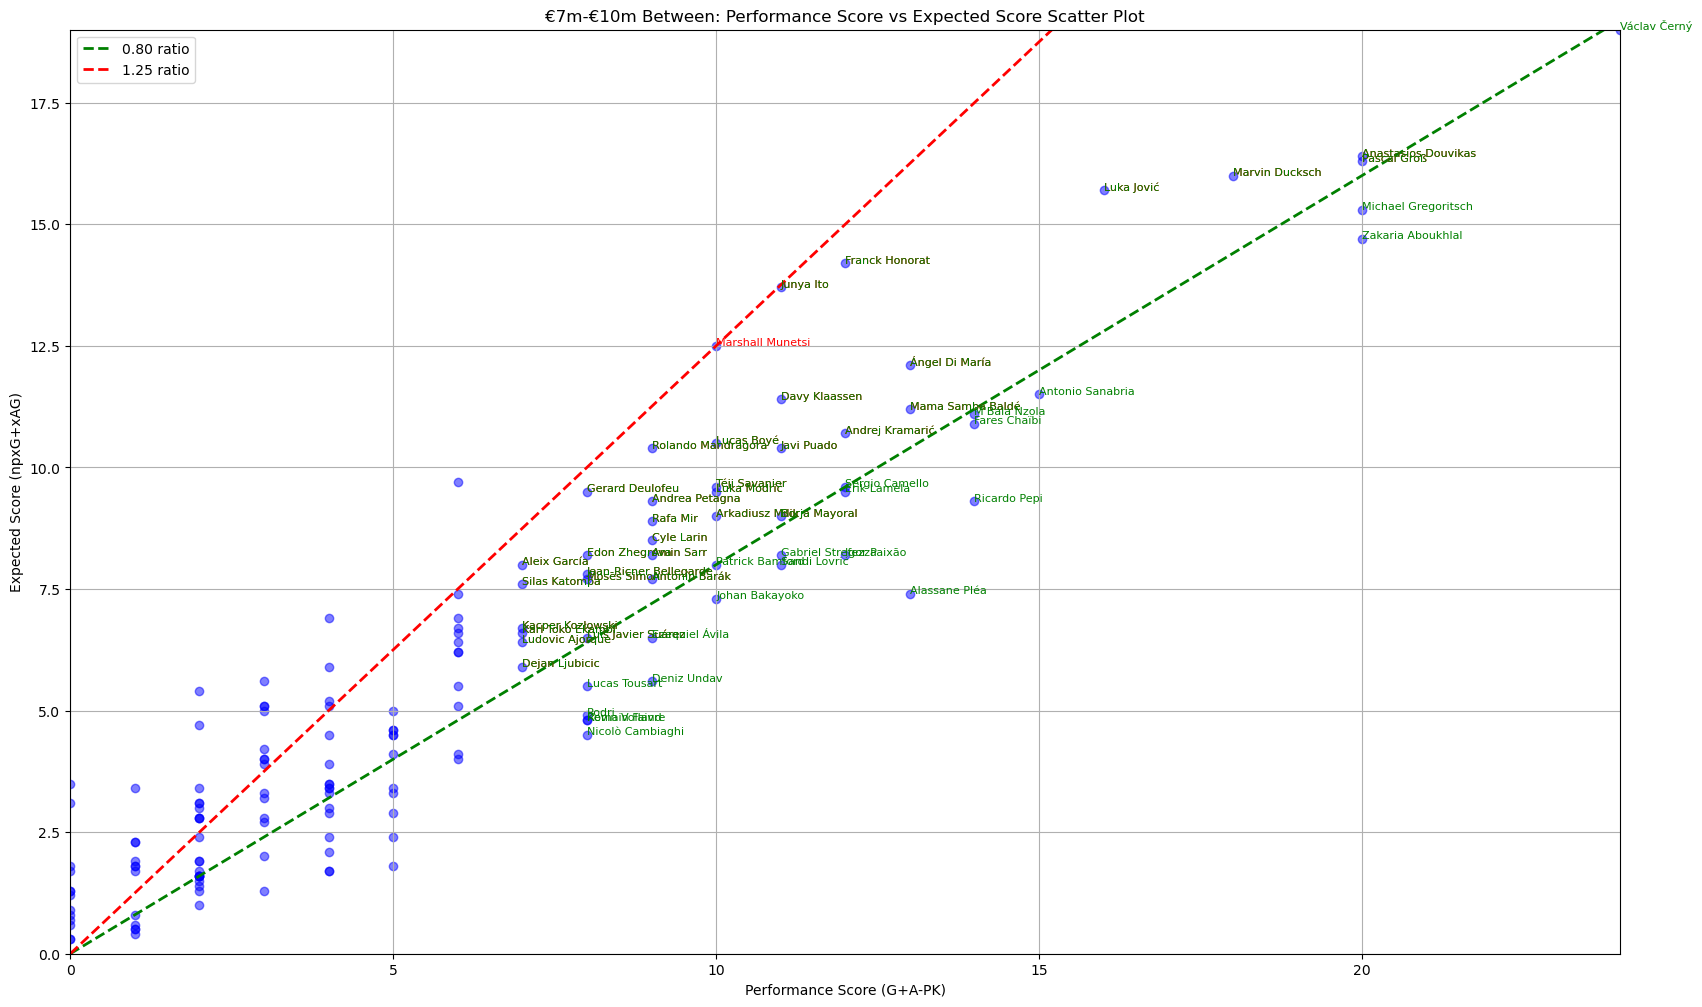

In [53]:

plt.figure(figsize=(20, 12))

selected_players = four_point[(four_point['Performance.8_G+A-PK'] >= 7) & (four_point["Expected.3_npxG+xAG"] >= 3)]

selected_players_red = selected_players[selected_players['Expected.3_npxG+xAG'] > 0.80 * selected_players['Performance.8_G+A-PK']]
selected_players_green = selected_players[selected_players['Expected.3_npxG+xAG'] < 1.25 * selected_players['Performance.8_G+A-PK']]

plt.scatter(four_point['Performance.8_G+A-PK'], four_point['Expected.3_npxG+xAG'], color='blue', alpha=0.5)

for _, row in selected_players_red.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='red')

for _, row in selected_players_green.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='green')

plt.plot([0, max(four_point['Performance.8_G+A-PK'])], [0, max(four_point['Performance.8_G+A-PK']) * 0.80], color='green', linestyle='--', linewidth=2, label='0.80 ratio')
plt.plot([0, max(four_point['Performance.8_G+A-PK'])], [0, max(four_point['Performance.8_G+A-PK']) * 1.25], color='red', linestyle='--', linewidth=2, label='1.25 ratio')

plt.title('€7m-€10m Between: Performance Score vs Expected Score Scatter Plot')
plt.xlabel('Performance Score (G+A-PK)')
plt.ylabel('Expected Score (npxG+xAG)')
plt.grid(True)

plt.xlim(0, max(four_point['Performance.8_G+A-PK']))
plt.ylim(0, max(four_point['Expected.3_npxG+xAG']))

plt.legend()

plt.show()


In [54]:
five_point_sort_values = five_point.sort_values(by = "Perfonmance_Score-Expected_Score", ascending = False)
five_point_sort_values = five_point_sort_values[["Player", "Nation", "League", "Team", "Main_Pos", "Age", "Performance.8_G+A-PK","Expected.3_npxG+xAG","Perfonmance_Score-Expected_Score","Market_Value"]]
five_point_sort_values.reset_index(drop=True, inplace=True)
five_point_sort_values.index += 1
five_point_sort_values.head()

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Expected.3_npxG+xAG,Perfonmance_Score-Expected_Score,Market_Value
1,Thijs Dallinga,NED,Ligue 1,Toulouse FC,Forward,21,20,11.9,8.1,€12.00m
2,Alexandre Lacazette,FRA,Ligue 1,Olimpik Lyon,Forward,31,31,23.2,7.8,€14.00m
3,Jonas Hofmann,GER,Bundesliga,Borussia Mönchengladbach,Forward,30,24,17.6,6.4,€13.00m
4,Steven Berghuis,NED,Eredivisie,Ajax,Midfielder,30,17,11.1,5.9,€12.00m
5,Vedat Muriqi,KVX,La Liga,RCD Mallorca,Forward,28,16,10.6,5.4,€15.00m


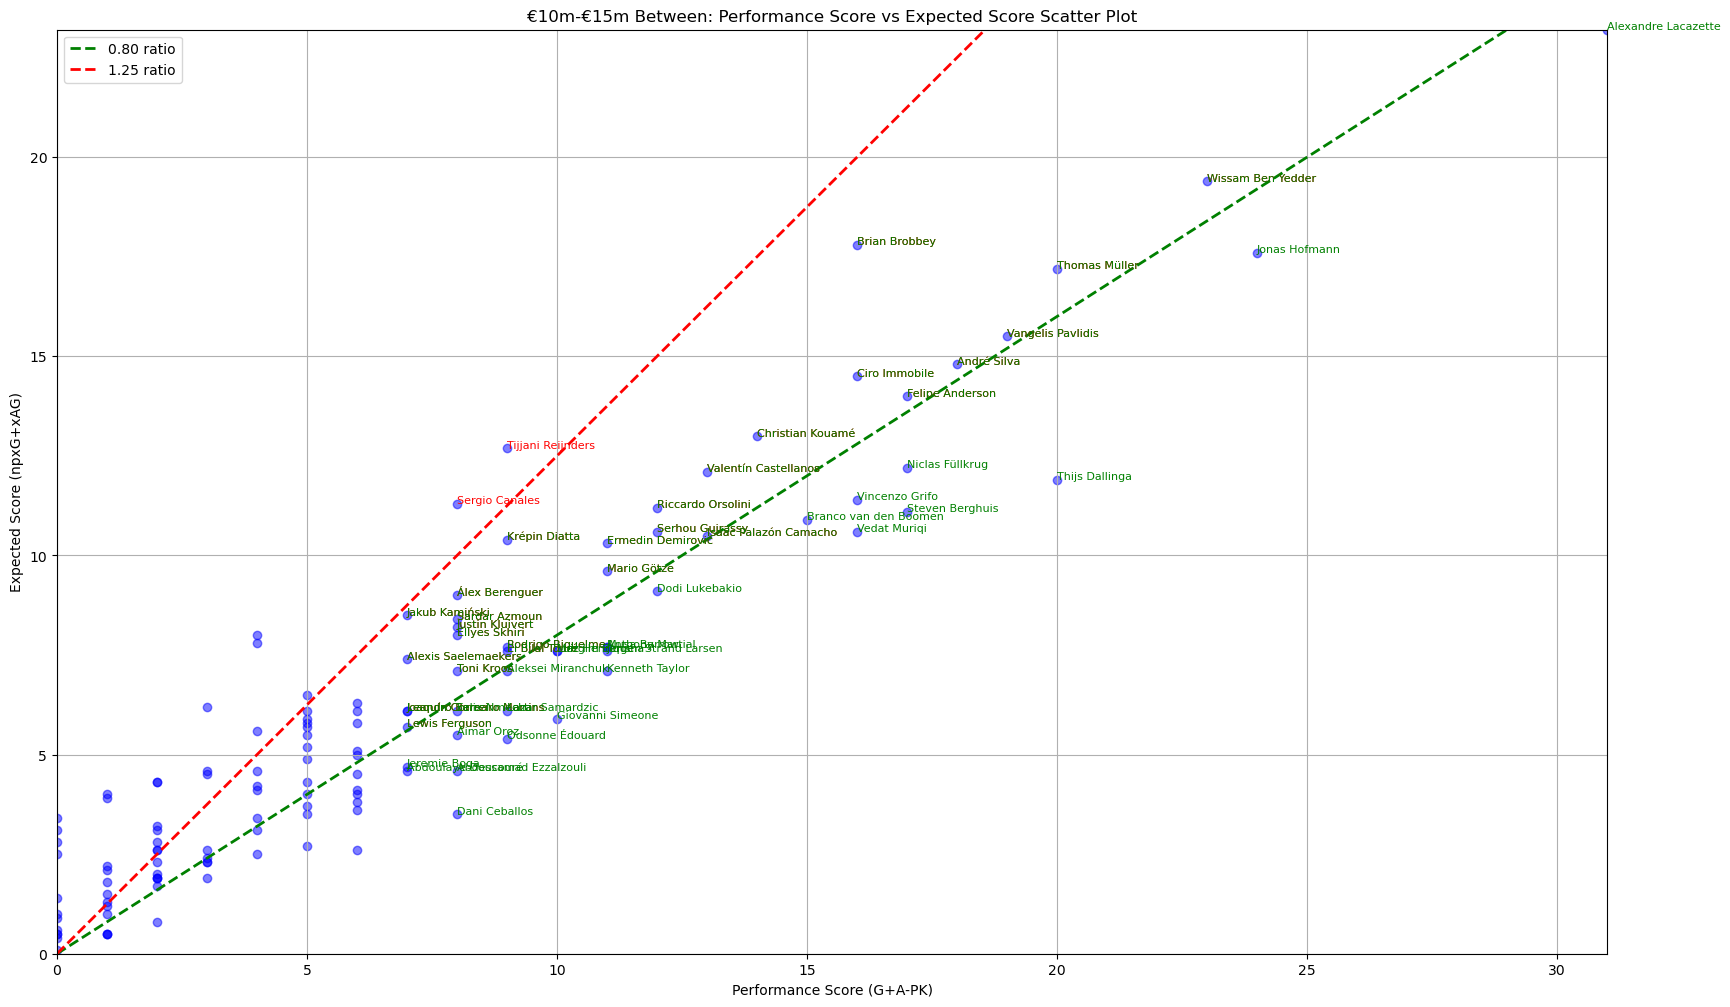

In [55]:

plt.figure(figsize=(20, 12))

selected_players = five_point[(five_point['Performance.8_G+A-PK'] >= 7) & (five_point["Expected.3_npxG+xAG"] >= 3)]

selected_players_red = selected_players[selected_players['Expected.3_npxG+xAG'] > 0.80 * selected_players['Performance.8_G+A-PK']]
selected_players_green = selected_players[selected_players['Expected.3_npxG+xAG'] < 1.25 * selected_players['Performance.8_G+A-PK']]

plt.scatter(five_point['Performance.8_G+A-PK'], five_point['Expected.3_npxG+xAG'], color='blue', alpha=0.5)

for _, row in selected_players_red.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='red')

for _, row in selected_players_green.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='green')

plt.plot([0, max(five_point['Performance.8_G+A-PK'])], [0, max(five_point['Performance.8_G+A-PK']) * 0.80], color='green', linestyle='--', linewidth=2, label='0.80 ratio')
plt.plot([0, max(five_point['Performance.8_G+A-PK'])], [0, max(five_point['Performance.8_G+A-PK']) * 1.25], color='red', linestyle='--', linewidth=2, label='1.25 ratio')

plt.title('€10m-€15m Between: Performance Score vs Expected Score Scatter Plot')
plt.xlabel('Performance Score (G+A-PK)')
plt.ylabel('Expected Score (npxG+xAG)')
plt.grid(True)

plt.xlim(0, max(five_point['Performance.8_G+A-PK']))
plt.ylim(0, max(five_point['Expected.3_npxG+xAG']))

plt.legend()

plt.show()


In [56]:
six_point_sort_values = six_point.sort_values(by = "Perfonmance_Score-Expected_Score", ascending = False)
six_point_sort_values = six_point_sort_values[["Player", "Nation", "League", "Team", "Main_Pos", "Age", "Performance.8_G+A-PK","Expected.3_npxG+xAG","Perfonmance_Score-Expected_Score","Market_Value"]]
six_point_sort_values.reset_index(drop=True, inplace=True)
six_point_sort_values.index += 1
six_point_sort_values.head()

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Expected.3_npxG+xAG,Perfonmance_Score-Expected_Score,Market_Value
1,Bradley Barcola,FRA,Ligue 1,Olimpik Lyon,Forward,19,16,7.4,8.6,€18.00m
2,Roberto Firmino,BRA,Premier League,Liverpool FC,Forward,30,18,10.3,7.7,€18.00m
3,Sheraldo Becker,SUR,Bundesliga,1. FC Union Berlin,Forward,27,22,14.8,7.2,€17.00m
4,Jack Harrison,ENG,Premier League,Leeds United AFC,Forward,25,16,9.8,6.2,€22.00m
5,Terem Moffi,NGA,Ligue 1,FC Lorient,Forward,23,11,6.2,4.8,€20.00m


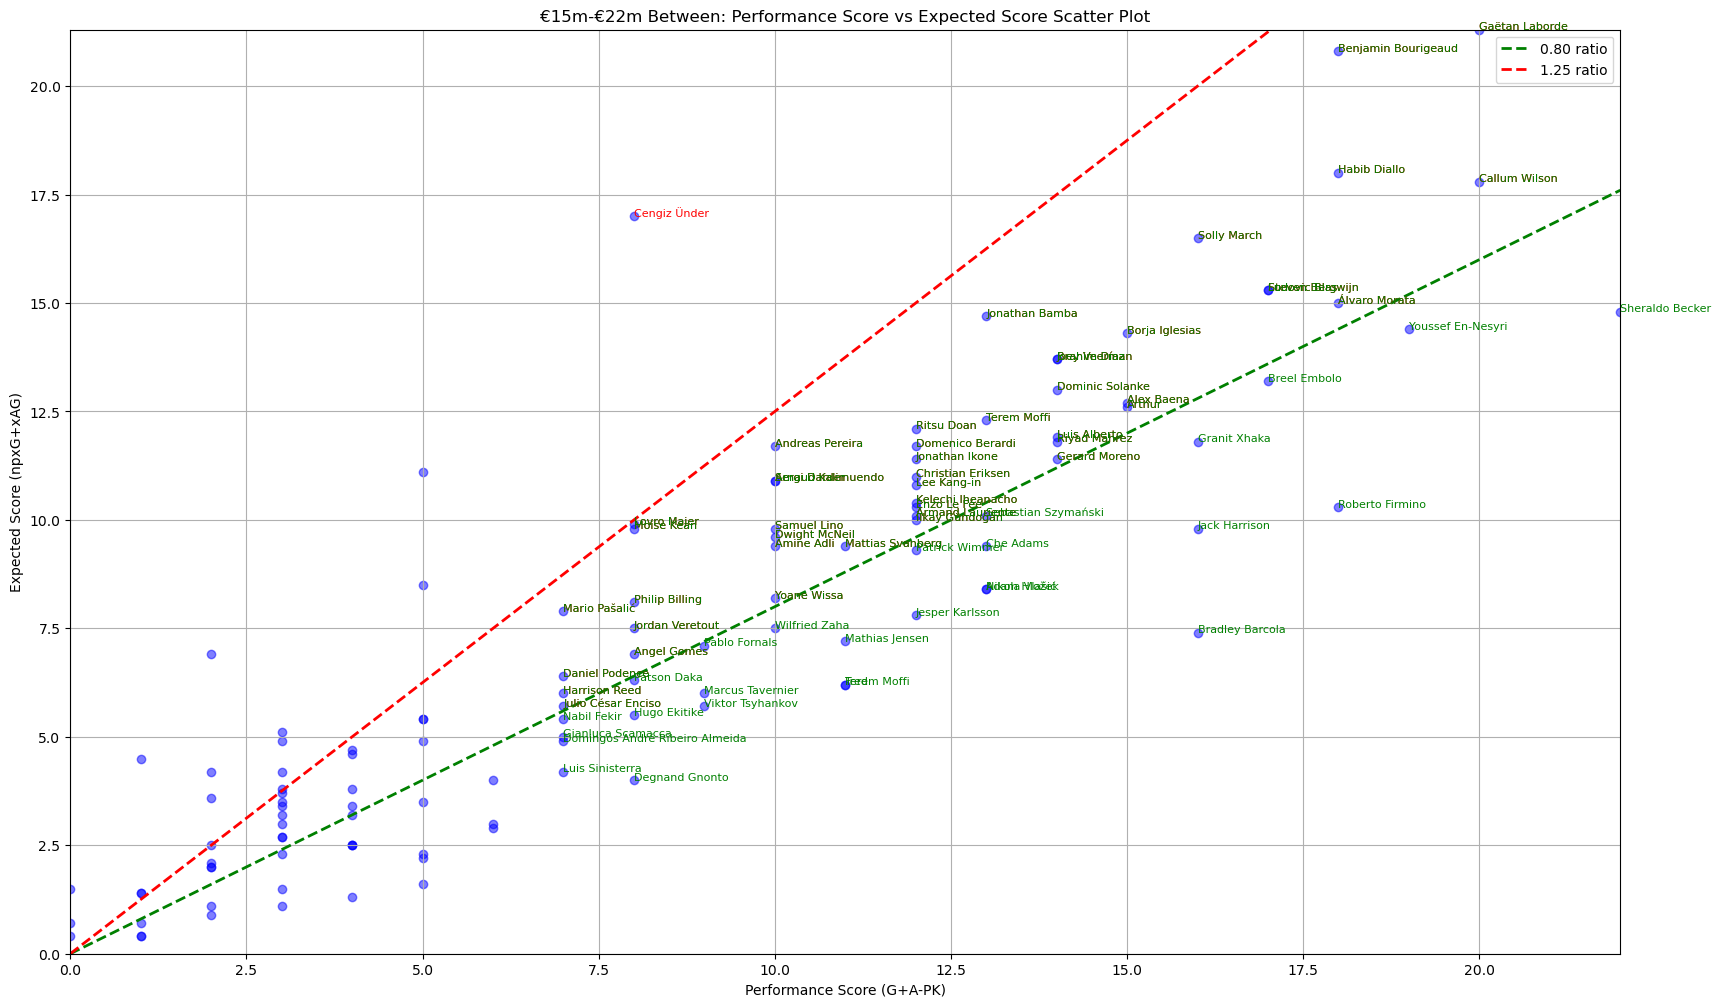

In [57]:


selected_players = six_point[(six_point['Performance.8_G+A-PK'] >= 7) & (six_point["Expected.3_npxG+xAG"] >= 3)]

selected_players_red = selected_players[selected_players['Expected.3_npxG+xAG'] > 0.80 * selected_players['Performance.8_G+A-PK']]
selected_players_green = selected_players[selected_players['Expected.3_npxG+xAG'] < 1.25 * selected_players['Performance.8_G+A-PK']]

plt.figure(figsize=(20,12))
plt.scatter(six_point['Performance.8_G+A-PK'], six_point['Expected.3_npxG+xAG'], color='blue', alpha=0.5)

for _, row in selected_players_red.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='red')

for _, row in selected_players_green.iterrows():
        plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='green')


plt.plot([0, max(six_point['Performance.8_G+A-PK'])], [0, max(six_point['Performance.8_G+A-PK']) * 0.80], color='green', linestyle='--', linewidth=2, label='0.80 ratio')
plt.plot([0, max(six_point['Performance.8_G+A-PK'])], [0, max(six_point['Performance.8_G+A-PK']) * 1.25], color='red', linestyle='--', linewidth=2, label='1.25 ratio')

plt.title('€15m-€22m Between: Performance Score vs Expected Score Scatter Plot')
plt.xlabel('Performance Score (G+A-PK)')
plt.ylabel('Expected Score (npxG+xAG)')
plt.grid(True)

plt.xlim(0, max(six_point['Performance.8_G+A-PK']))
plt.ylim(0, max(six_point['Expected.3_npxG+xAG']))
plt.legend()

plt.show()

In [58]:
seven_point_sort_values = seven_point.sort_values(by = "Perfonmance_Score-Expected_Score", ascending = False)
seven_point_sort_values = seven_point_sort_values[["Player", "Nation", "League", "Team", "Main_Pos", "Age", "Performance.8_G+A-PK","Expected.3_npxG+xAG","Perfonmance_Score-Expected_Score","Market_Value"]]
seven_point_sort_values.reset_index(drop=True, inplace=True)
seven_point_sort_values.index += 1
seven_point_sort_values.head()

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Expected.3_npxG+xAG,Perfonmance_Score-Expected_Score,Market_Value
1,Boulaye Dia,SEN,Serie A,US Salernitana 1919,Forward,25,21,11.1,9.9,€25.00m
2,Samuel Chukwueze,NGA,La Liga,Villarreal CF,Forward,23,22,13.0,9.0,€25.00m
3,Marco Asensio,ESP,La Liga,Real Madrid CF,Forward,26,20,13.1,6.9,€25.00m
4,Evan Ferguson,IRL,Premier League,Brighton & Hove Albion FC,Forward,17,13,6.1,6.9,€30.00m
5,Timo Werner,GER,Bundesliga,RB Leipzig,Forward,26,22,15.3,6.7,€25.00m


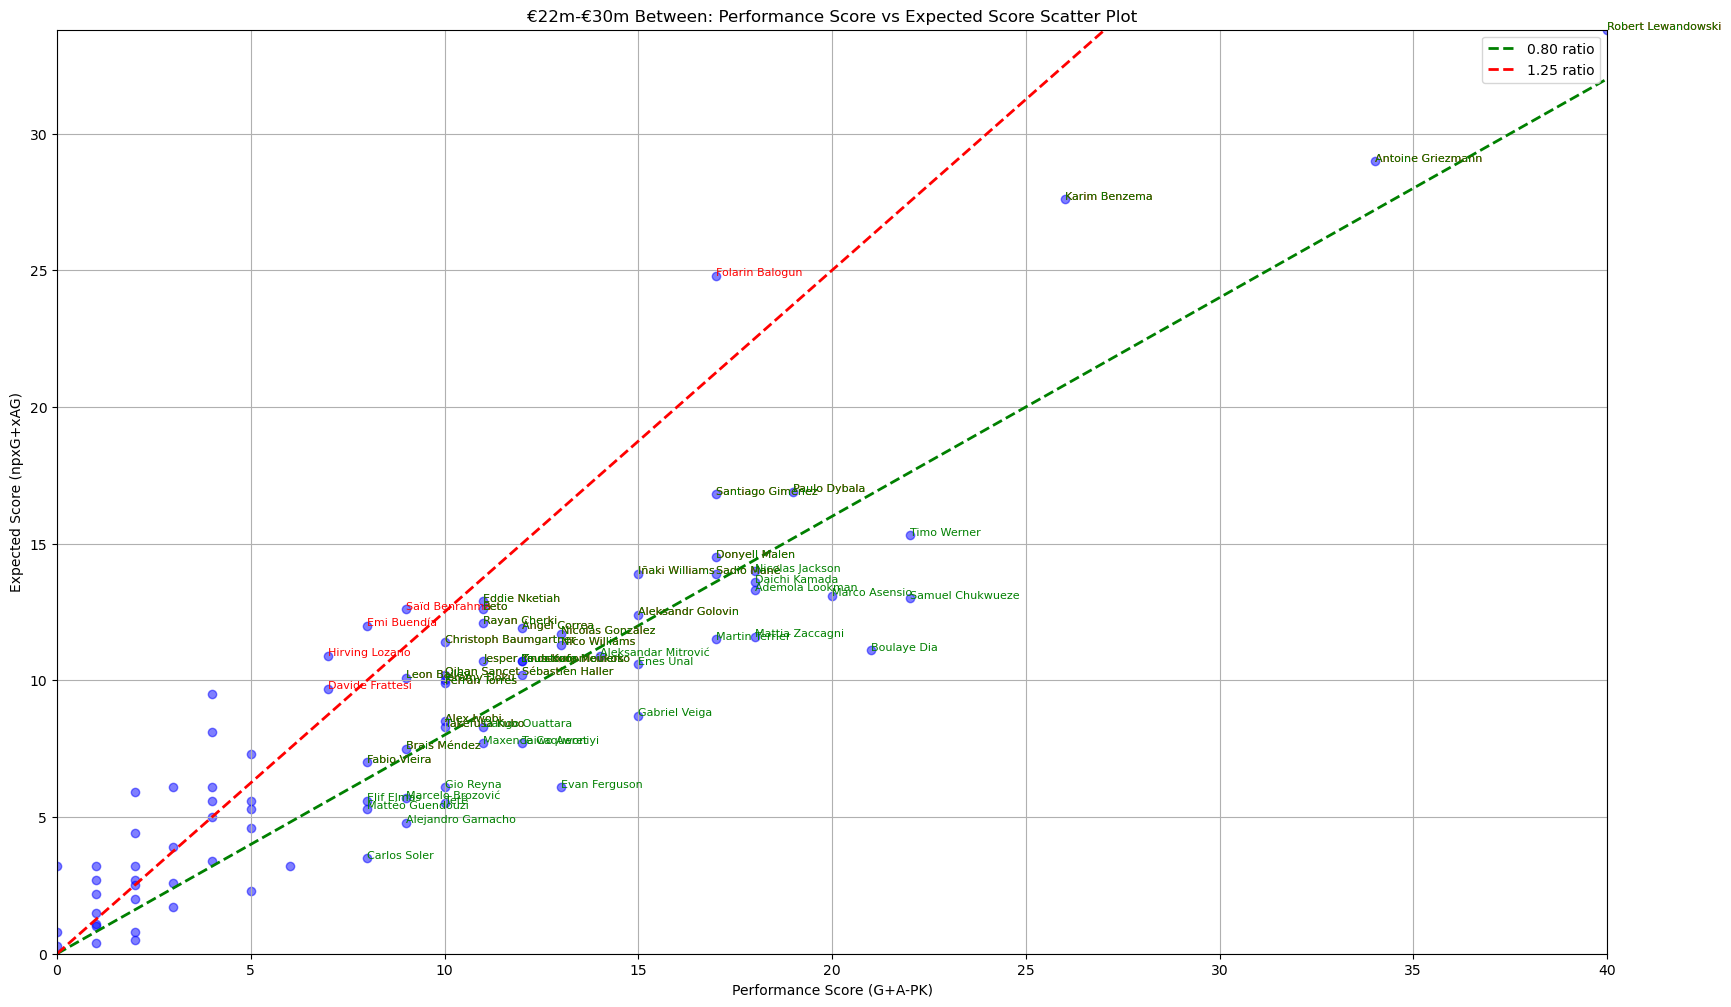

In [59]:
plt.figure(figsize=(20, 12))

selected_players = seven_point[(seven_point['Performance.8_G+A-PK'] >= 7) & (seven_point["Expected.3_npxG+xAG"] >= 3)]

selected_players_red = selected_players[selected_players['Expected.3_npxG+xAG'] > 0.80 * selected_players['Performance.8_G+A-PK']]
selected_players_green = selected_players[selected_players['Expected.3_npxG+xAG'] < 1.25 * selected_players['Performance.8_G+A-PK']]

plt.scatter(seven_point['Performance.8_G+A-PK'], seven_point['Expected.3_npxG+xAG'], color='blue', alpha=0.5)

for _, row in selected_players_red.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='red')

for _, row in selected_players_green.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='green')

plt.plot([0, max(seven_point['Performance.8_G+A-PK'])], [0, max(seven_point['Performance.8_G+A-PK']) * 0.80], color='green', linestyle='--', linewidth=2, label='0.80 ratio')
plt.plot([0, max(seven_point['Performance.8_G+A-PK'])], [0, max(seven_point['Performance.8_G+A-PK']) * 1.25], color='red', linestyle='--', linewidth=2, label='1.25 ratio')

plt.title('€22m-€30m Between: Performance Score vs Expected Score Scatter Plot')
plt.xlabel('Performance Score (G+A-PK)')
plt.ylabel('Expected Score (npxG+xAG)')
plt.grid(True)

plt.xlim(0, max(seven_point['Performance.8_G+A-PK']))
plt.ylim(0, max(seven_point['Expected.3_npxG+xAG']))

plt.legend()

plt.show()

In [60]:
eight_point_sort_values = eight_point.sort_values(by = "Perfonmance_Score-Expected_Score", ascending = False)
eight_point_sort_values = eight_point_sort_values[["Player", "Nation", "League", "Team", "Main_Pos", "Age", "Performance.8_G+A-PK","Expected.3_npxG+xAG","Perfonmance_Score-Expected_Score","Market_Value"]]
eight_point_sort_values.reset_index(drop=True, inplace=True)
eight_point_sort_values.index += 1
eight_point_sort_values.head()

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Expected.3_npxG+xAG,Perfonmance_Score-Expected_Score,Market_Value
1,Elye Wahi,FRA,Ligue 1,Montpellier,Forward,19,23,15.0,8.0,€35.00m
2,Dani Olmo,ESP,Bundesliga,RB Leipzig,Forward,24,14,7.6,6.4,€40.00m
3,Lionel Messi,ARG,Ligue 1,Paris Saint-Germain FC,Forward,35,40,33.7,6.3,€35.00m
4,Douglas Luiz,BRA,Premier League,Aston Villa FC,Midfielder,24,13,7.2,5.8,€40.00m
5,Amine Gouiri,ALG,Ligue 1,Stade Rennais FC,Forward,22,23,17.3,5.7,€35.00m


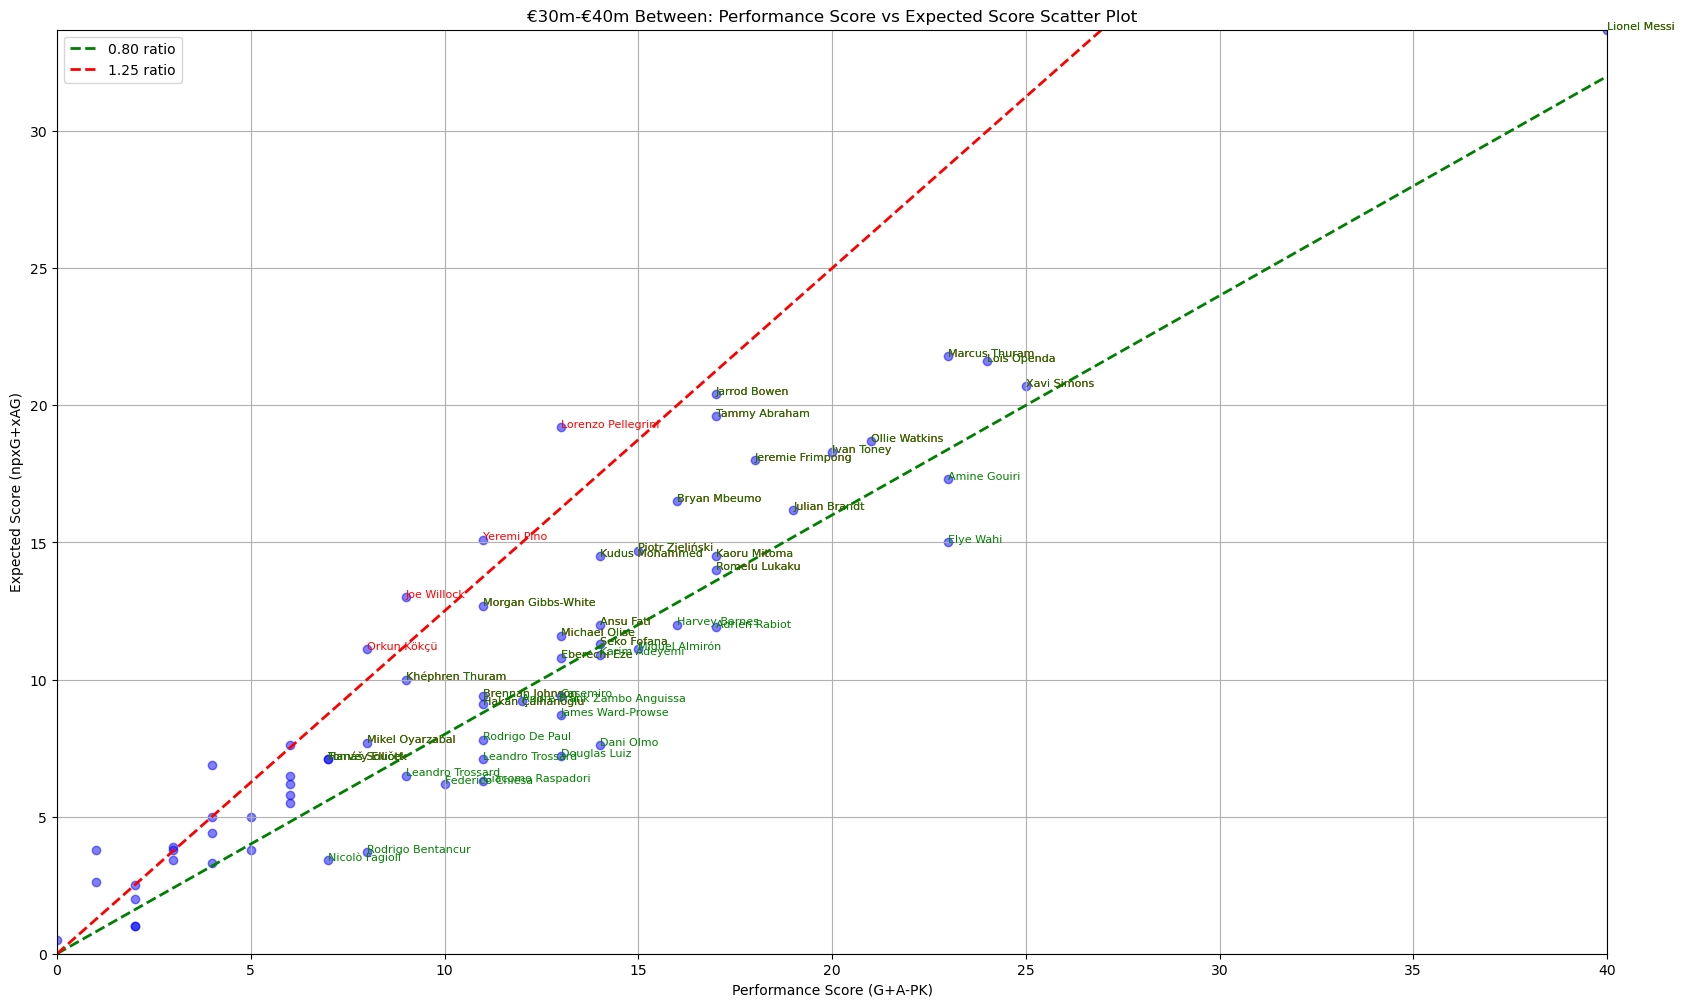

In [61]:
plt.figure(figsize=(20, 12))

selected_players = eight_point[(eight_point['Performance.8_G+A-PK'] >= 7) & (eight_point["Expected.3_npxG+xAG"] >= 3)]

selected_players_red = selected_players[selected_players['Expected.3_npxG+xAG'] > 0.80 * selected_players['Performance.8_G+A-PK']]
selected_players_green = selected_players[selected_players['Expected.3_npxG+xAG'] < 1.25 * selected_players['Performance.8_G+A-PK']]

plt.scatter(eight_point['Performance.8_G+A-PK'], eight_point['Expected.3_npxG+xAG'], color='blue', alpha=0.5)

for _, row in selected_players_red.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='red')

for _, row in selected_players_green.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='green')

plt.plot([0, max(eight_point['Performance.8_G+A-PK'])], [0, max(eight_point['Performance.8_G+A-PK']) * 0.80], color='green', linestyle='--', linewidth=2, label='0.80 ratio')
plt.plot([0, max(eight_point['Performance.8_G+A-PK'])], [0, max(eight_point['Performance.8_G+A-PK']) * 1.25], color='red', linestyle='--', linewidth=2, label='1.25 ratio')

plt.title('€30m-€40m Between: Performance Score vs Expected Score Scatter Plot')
plt.xlabel('Performance Score (G+A-PK)')
plt.ylabel('Expected Score (npxG+xAG)')
plt.grid(True)

plt.xlim(0, max(eight_point['Performance.8_G+A-PK']))
plt.ylim(0, max(eight_point['Expected.3_npxG+xAG']))

plt.legend()

plt.show()

In [62]:
nine_point_sort_values = nine_point.sort_values(by = "Perfonmance_Score-Expected_Score", ascending = False)
nine_point_sort_values = nine_point_sort_values[["Player", "Nation", "League", "Team", "Main_Pos", "Age", "Performance.8_G+A-PK","Expected.3_npxG+xAG","Perfonmance_Score-Expected_Score","Market_Value"]]
nine_point_sort_values.reset_index(drop=True, inplace=True)
nine_point_sort_values.index += 1
nine_point_sort_values.head()

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Expected.3_npxG+xAG,Perfonmance_Score-Expected_Score,Market_Value
1,Serge Gnabry,GER,Bundesliga,FC Bayern München,Forward,27,27,18.1,8.9,€55.00m
2,Neymar,BRA,Ligue 1,Paris Saint-Germain FC,Midfielder,30,27,19.0,8.0,€60.00m
3,Cody Gakpo,NED,Eredivisie,PSV Eindhoven,Forward,23,19,11.5,7.5,€55.00m
4,Pierre Højbjerg,DEN,Premier League,Tottenham Hotspur FC,Midfielder,26,12,5.9,6.1,€45.00m
5,Ousmane Dembélé,FRA,La Liga,FC Barcelona,Forward,25,17,11.4,5.6,€60.00m


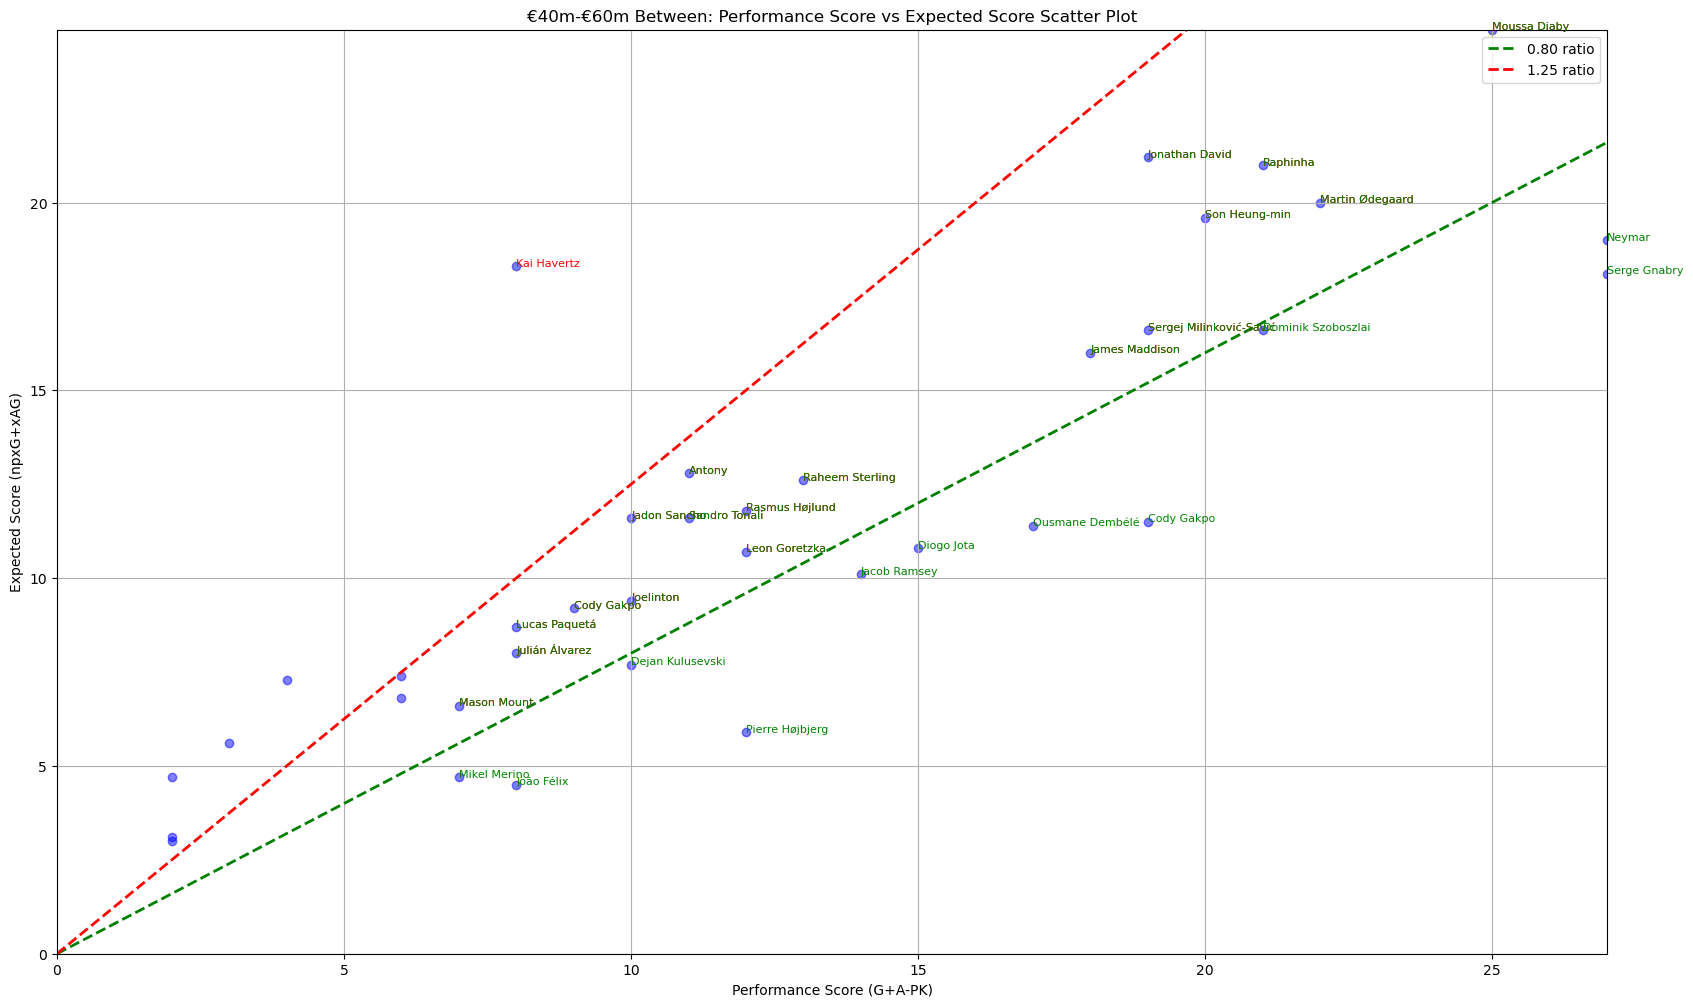

In [63]:

plt.figure(figsize=(20, 12))

selected_players = nine_point[(nine_point['Performance.8_G+A-PK'] >= 7) & (nine_point["Expected.3_npxG+xAG"] >= 3)]

selected_players_red = selected_players[selected_players['Expected.3_npxG+xAG'] > 0.80 * selected_players['Performance.8_G+A-PK']]
selected_players_green = selected_players[selected_players['Expected.3_npxG+xAG'] < 1.25 * selected_players['Performance.8_G+A-PK']]

plt.scatter(nine_point['Performance.8_G+A-PK'], nine_point['Expected.3_npxG+xAG'], color='blue', alpha=0.5)

for _, row in selected_players_red.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='red')

for _, row in selected_players_green.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='green')

plt.plot([0, max(nine_point['Performance.8_G+A-PK'])], [0, max(nine_point['Performance.8_G+A-PK']) * 0.80], color='green', linestyle='--', linewidth=2, label='0.80 ratio')
plt.plot([0, max(nine_point['Performance.8_G+A-PK'])], [0, max(nine_point['Performance.8_G+A-PK']) * 1.25], color='red', linestyle='--', linewidth=2, label='1.25 ratio')

plt.title('€40m-€60m Between: Performance Score vs Expected Score Scatter Plot')
plt.xlabel('Performance Score (G+A-PK)')
plt.ylabel('Expected Score (npxG+xAG)')
plt.grid(True)

plt.xlim(0, max(nine_point['Performance.8_G+A-PK']))
plt.ylim(0, max(nine_point['Expected.3_npxG+xAG']))

plt.legend()

plt.show()

In [64]:
ten_point_sort_values = ten_point.sort_values(by = "Perfonmance_Score-Expected_Score", ascending = False)
ten_point_sort_values = ten_point_sort_values[["Player", "Nation", "League", "Team", "Main_Pos", "Age", "Performance.8_G+A-PK","Expected.3_npxG+xAG","Perfonmance_Score-Expected_Score","Market_Value"]]
ten_point_sort_values.reset_index(drop=True, inplace=True)
ten_point_sort_values.index += 1
ten_point_sort_values.head()

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Expected.3_npxG+xAG,Perfonmance_Score-Expected_Score,Market_Value
1,Randal Kolo Muani,FRA,Bundesliga,Eintracht Frankfurt,Forward,23,34,19.8,14.2,€80.00m
2,Marcus Rashford,ENG,Premier League,Manchester United FC,Forward,24,38,24.9,13.1,€80.00m
3,Kylian Mbappé,FRA,Ligue 1,Paris Saint-Germain FC,Forward,23,46,33.4,12.6,€180.00m
4,Jamal Musiala,GER,Bundesliga,FC Bayern München,Midfielder,19,29,18.1,10.9,€110.00m
5,Lautaro Martínez,ARG,Serie A,Inter Milan,Forward,24,37,26.6,10.4,€85.00m


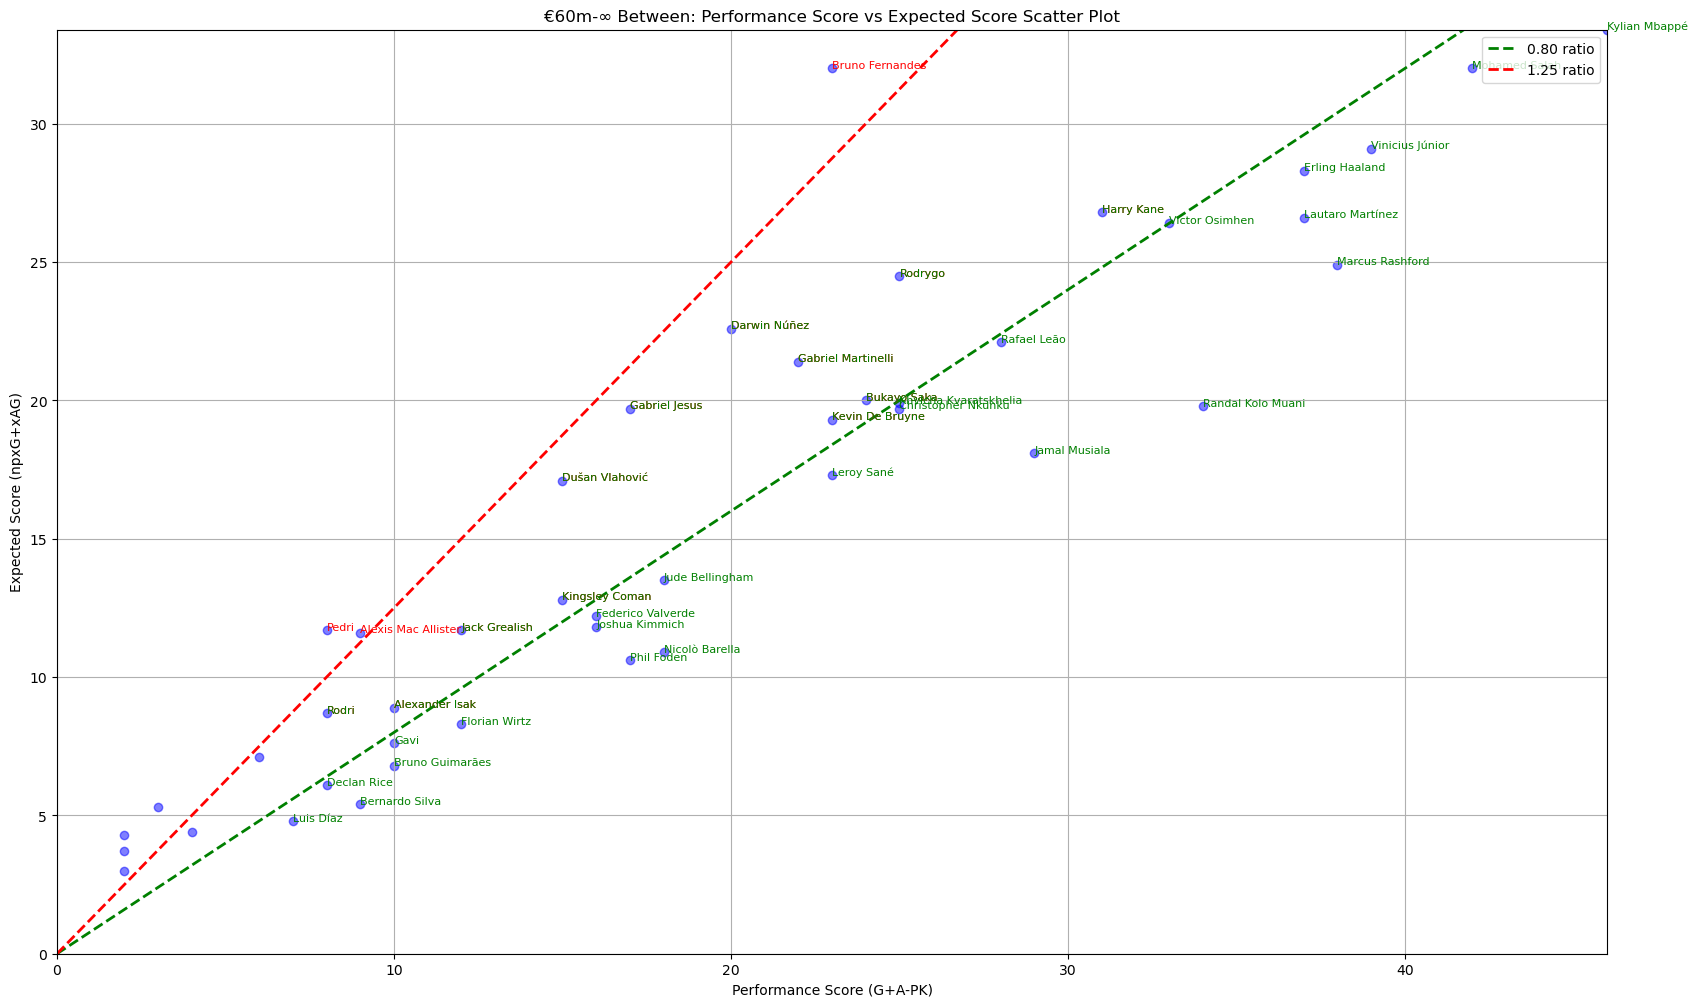

In [65]:

plt.figure(figsize=(20, 12))

selected_players = ten_point[(ten_point['Performance.8_G+A-PK'] >= 7) & (ten_point["Expected.3_npxG+xAG"] >= 3)]

selected_players_red = selected_players[selected_players['Expected.3_npxG+xAG'] > 0.80 * selected_players['Performance.8_G+A-PK']]
selected_players_green = selected_players[selected_players['Expected.3_npxG+xAG'] < 1.25 * selected_players['Performance.8_G+A-PK']]

plt.scatter(ten_point['Performance.8_G+A-PK'], ten_point['Expected.3_npxG+xAG'], color='blue', alpha=0.5)

for _, row in selected_players_red.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='red')

for _, row in selected_players_green.iterrows():
    plt.text(row['Performance.8_G+A-PK'], row['Expected.3_npxG+xAG'], row['Player'], fontsize=8, color='green')

plt.plot([0, max(ten_point['Performance.8_G+A-PK'])], [0, max(ten_point['Performance.8_G+A-PK']) * 0.80], color='green', linestyle='--', linewidth=2, label='0.80 ratio')
plt.plot([0, max(ten_point['Performance.8_G+A-PK'])], [0, max(ten_point['Performance.8_G+A-PK']) * 1.25], color='red', linestyle='--', linewidth=2, label='1.25 ratio')

plt.title('€60m-∞ Between: Performance Score vs Expected Score Scatter Plot')
plt.xlabel('Performance Score (G+A-PK)')
plt.ylabel('Expected Score (npxG+xAG)')
plt.grid(True)

plt.xlim(0, max(ten_point['Performance.8_G+A-PK']))
plt.ylim(0, max(ten_point['Expected.3_npxG+xAG']))

plt.legend()

plt.show()

In [66]:
df.columns 

Index(['Player', 'Nation', 'League', 'Team', 'Pos', 'Main_Pos', 'Age', 'MP',
       'Playing Time_Starts', 'Playing Time.1_Min', 'Playing Time.2_90s',
       'Performance_Gls', 'Performance.1_Ast', 'Performance.2_G+A',
       'Performance.3_G-PK', 'Performance.4_PK', 'Performance.5_PKatt',
       'Performance.6_CrdY', 'Performance.7_CrdR', 'Performance.8_G+A-PK',
       'Expected_xG', 'Expected.1_npxG', 'Expected.2_xAG',
       'Expected.3_npxG+xAG', 'Progression_PrgC', 'Progression.1_PrgP',
       'Progression.2_PrgR', 'Per 90 Minutes_Gls', 'Per 90 Minutes.1_Ast',
       'Per 90 Minutes.2_G+A', 'Per 90 Minutes.3_G-PK',
       'Per 90 Minutes.4_G+A-PK', 'Per 90 Minutes.5_xG',
       'Per 90 Minutes.6_xAG', 'Per 90 Minutes.7_xG+xAG',
       'Per 90 Minutes.8_npxG', 'Per 90 Minutes.9_npxG+xAG', 'Market_Value',
       'Market_Value_Point', 'Perfonmance_Score-Expected_Score'],
      dtype='object')

In [67]:
df["Performance.9_CrdTotal"] = df["Performance.7_CrdR"] + df["Performance.6_CrdY"]
df.insert(loc=20, column='Performance.9_CrdTotal', value=df.pop('Performance.9_CrdTotal'))
df.columns


Index(['Player', 'Nation', 'League', 'Team', 'Pos', 'Main_Pos', 'Age', 'MP',
       'Playing Time_Starts', 'Playing Time.1_Min', 'Playing Time.2_90s',
       'Performance_Gls', 'Performance.1_Ast', 'Performance.2_G+A',
       'Performance.3_G-PK', 'Performance.4_PK', 'Performance.5_PKatt',
       'Performance.6_CrdY', 'Performance.7_CrdR', 'Performance.8_G+A-PK',
       'Performance.9_CrdTotal', 'Expected_xG', 'Expected.1_npxG',
       'Expected.2_xAG', 'Expected.3_npxG+xAG', 'Progression_PrgC',
       'Progression.1_PrgP', 'Progression.2_PrgR', 'Per 90 Minutes_Gls',
       'Per 90 Minutes.1_Ast', 'Per 90 Minutes.2_G+A', 'Per 90 Minutes.3_G-PK',
       'Per 90 Minutes.4_G+A-PK', 'Per 90 Minutes.5_xG',
       'Per 90 Minutes.6_xAG', 'Per 90 Minutes.7_xG+xAG',
       'Per 90 Minutes.8_npxG', 'Per 90 Minutes.9_npxG+xAG', 'Market_Value',
       'Market_Value_Point', 'Perfonmance_Score-Expected_Score'],
      dtype='object')

In [68]:
forward_card = df[df["Main_Pos"] == "Forward"]
Card_Total = forward_card.sort_values(by = "Performance.9_CrdTotal", ascending = False)
Card_Total = Card_Total[["Player", "Nation", "League", "Team", "Main_Pos", "Age","Performance.9_CrdTotal"]]
Card_Total.reset_index(drop=True, inplace=True)
Card_Total.index += 1
Card_Total.head()

,Player,Nation,League,Team,Main_Pos,Age,Performance.9_CrdTotal
1,Érik Lamela,ARG,La Liga,Sevilla FC,Forward,30,18
2,Vinicius Júnior,BRA,La Liga,Real Madrid CF,Forward,22,17
3,Mattia Zaccagni,ITA,Serie A,SS Lazio,Forward,27,13
4,Valentín Castellanos,ARG,La Liga,Girona FC,Forward,23,12
5,Raphinha,BRA,La Liga,FC Barcelona,Forward,25,11


In [69]:
df.insert(loc=21, column='Perfonmance_Score-Expected_Score', value=df.pop('Perfonmance_Score-Expected_Score'))
df.columns


Index(['Player', 'Nation', 'League', 'Team', 'Pos', 'Main_Pos', 'Age', 'MP',
       'Playing Time_Starts', 'Playing Time.1_Min', 'Playing Time.2_90s',
       'Performance_Gls', 'Performance.1_Ast', 'Performance.2_G+A',
       'Performance.3_G-PK', 'Performance.4_PK', 'Performance.5_PKatt',
       'Performance.6_CrdY', 'Performance.7_CrdR', 'Performance.8_G+A-PK',
       'Performance.9_CrdTotal', 'Perfonmance_Score-Expected_Score',
       'Expected_xG', 'Expected.1_npxG', 'Expected.2_xAG',
       'Expected.3_npxG+xAG', 'Progression_PrgC', 'Progression.1_PrgP',
       'Progression.2_PrgR', 'Per 90 Minutes_Gls', 'Per 90 Minutes.1_Ast',
       'Per 90 Minutes.2_G+A', 'Per 90 Minutes.3_G-PK',
       'Per 90 Minutes.4_G+A-PK', 'Per 90 Minutes.5_xG',
       'Per 90 Minutes.6_xAG', 'Per 90 Minutes.7_xG+xAG',
       'Per 90 Minutes.8_npxG', 'Per 90 Minutes.9_npxG+xAG', 'Market_Value',
       'Market_Value_Point'],
      dtype='object')

In [70]:
midfielders = df[df['Main_Pos'] == 'Midfielder']
midfielders_by_nation = midfielders.groupby('Nation').size().reset_index(name='Midfielders Count')
most_midfielders_countries = midfielders_by_nation.sort_values(by='Midfielders Count', ascending=False)
most_midfielders_countries.reset_index(drop = True, inplace= True)
most_midfielders_countries.index +=1
most_midfielders_countries.head()

,Nation,Midfielders Count
1,FRA,107
2,ESP,106
3,NED,70
4,GER,63
5,ITA,50


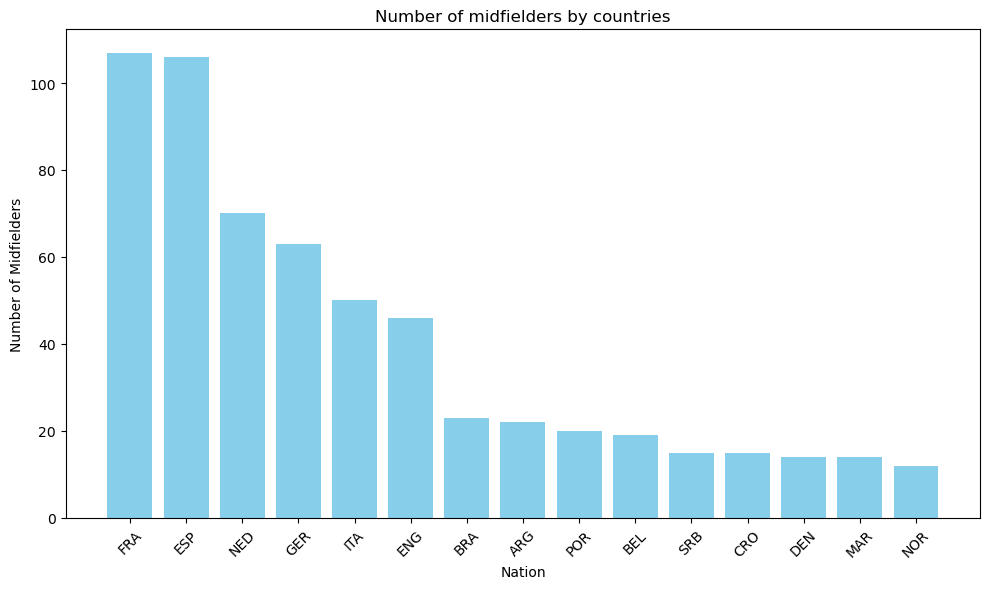

In [71]:
top_15_countries = most_midfielders_countries.head(15)
plt.figure(figsize=(10, 6))
plt.bar(top_15_countries['Nation'], top_15_countries['Midfielders Count'], color='skyblue')
plt.xlabel('Nation')
plt.ylabel('Number of Midfielders')
plt.title('Number of midfielders by countries')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [72]:
forward = df[df["Main_Pos"]== "Forward"]
forward_by_nation = forward.groupby("Nation").size().reset_index(name = "Forwards Count")
forward_nation_sortvalue = forward_by_nation.sort_values(by = "Forwards Count", ascending = False).head(100)
forward_nation_sortvalue.reset_index(drop = True , inplace = True)
forward_nation_sortvalue.index += 1
forward_nation_sortvalue.head()

,Nation,Forwards Count
1,FRA,67
2,ESP,65
3,NED,62
4,GER,46
5,ENG,41


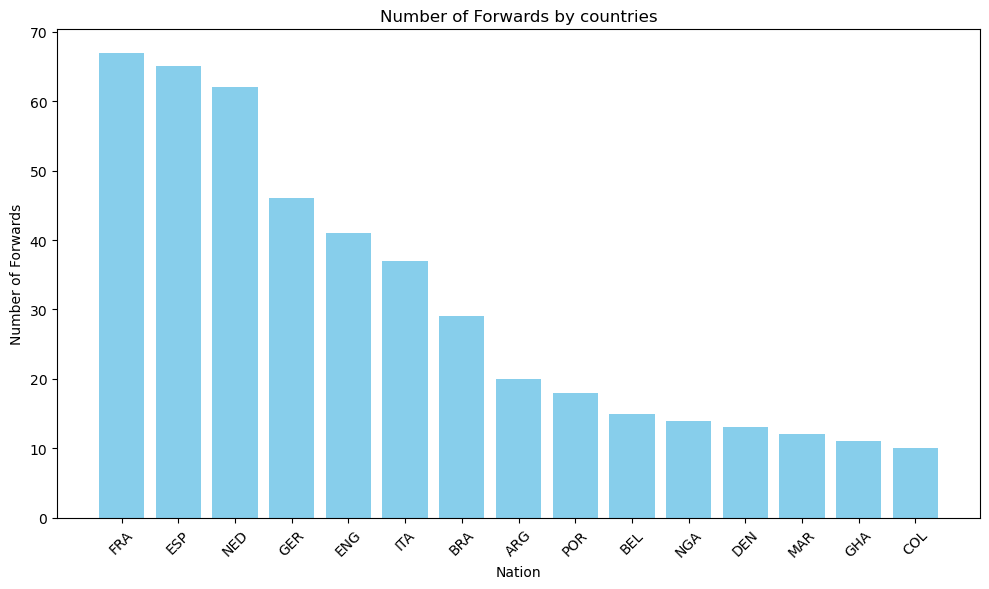

In [73]:
top_15_countries1 = forward_nation_sortvalue.head(15)
plt.figure(figsize=(10, 6))
plt.bar(top_15_countries1['Nation'], top_15_countries1['Forwards Count'], color='skyblue')
plt.xlabel('Nation')
plt.ylabel('Number of Forwards')
plt.title('Number of Forwards by countries')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

In [74]:
ligler = df['League'].unique()
print(ligler)

['Premier League' 'La Liga' 'Serie A' 'Bundesliga' 'Ligue 1' 'Eredivisie']


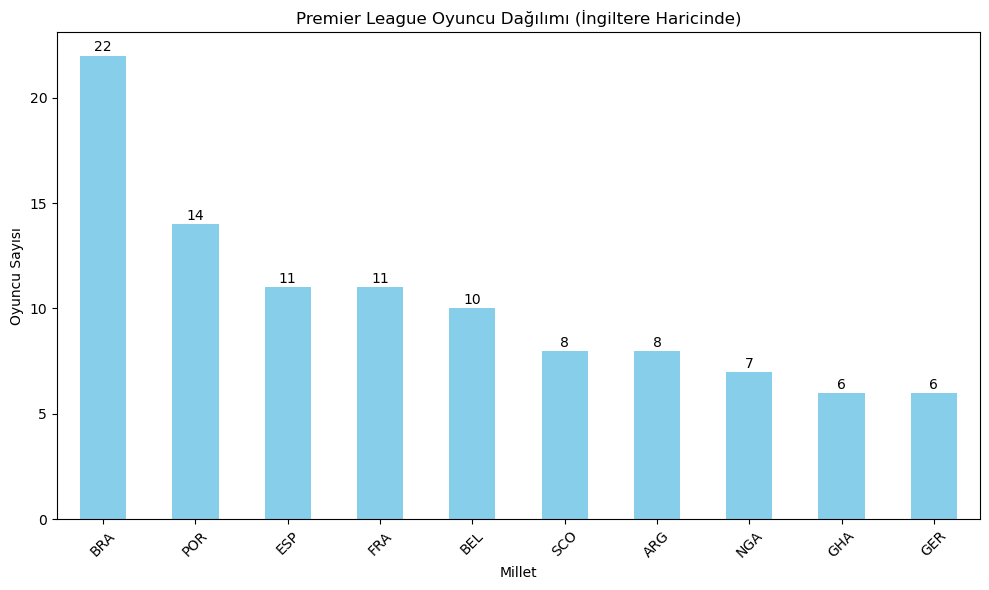

In [75]:
premier_league_data = df[df['League'] == 'Premier League']
premier_league_data = premier_league_data[premier_league_data['Nation'] != 'ENG']
milletlerin_oyuncu_sayisi = premier_league_data['Nation'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = milletlerin_oyuncu_sayisi.plot(kind='bar', color='skyblue')
plt.title('Premier League Oyuncu Dağılımı (İngiltere Haricinde)')
plt.xlabel('Millet')
plt.ylabel('Oyuncu Sayısı')
plt.xticks(rotation=45)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', 
             ha='center', 
             va='bottom')

plt.tight_layout()
plt.show()

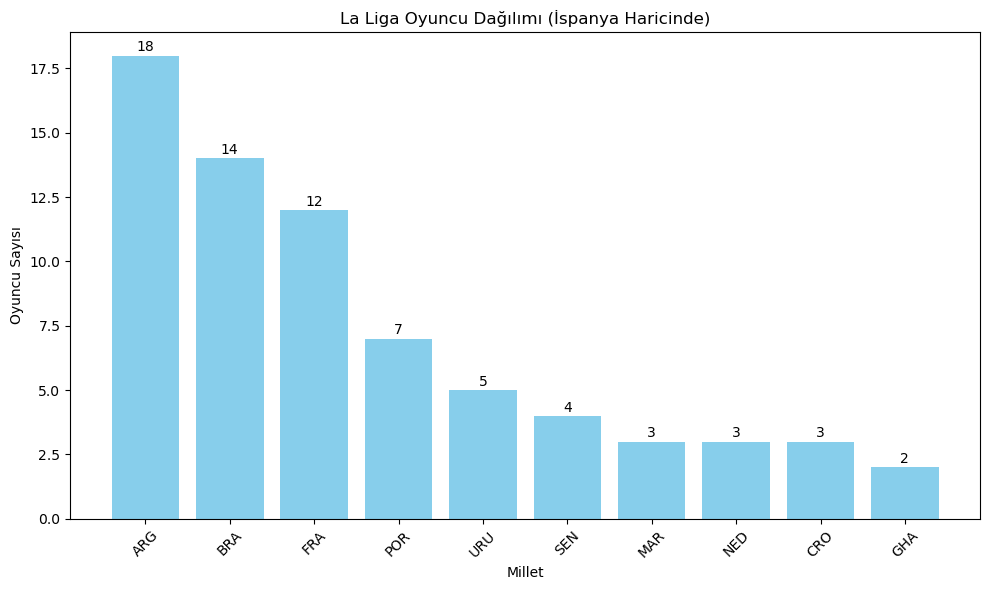

In [76]:
la_liga_data = df[df['League'] == 'La Liga']
la_liga_data = la_liga_data[la_liga_data['Nation'] != 'ESP']  

milletlerin_oyuncu_sayisi = la_liga_data['Nation'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(milletlerin_oyuncu_sayisi.index, milletlerin_oyuncu_sayisi, color='skyblue')
plt.title('La Liga Oyuncu Dağılımı (İspanya Haricinde)')
plt.xlabel('Millet')
plt.ylabel('Oyuncu Sayısı')
plt.xticks(rotation=45)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', 
             ha='center', 
             va='bottom')

plt.tight_layout()
plt.show()

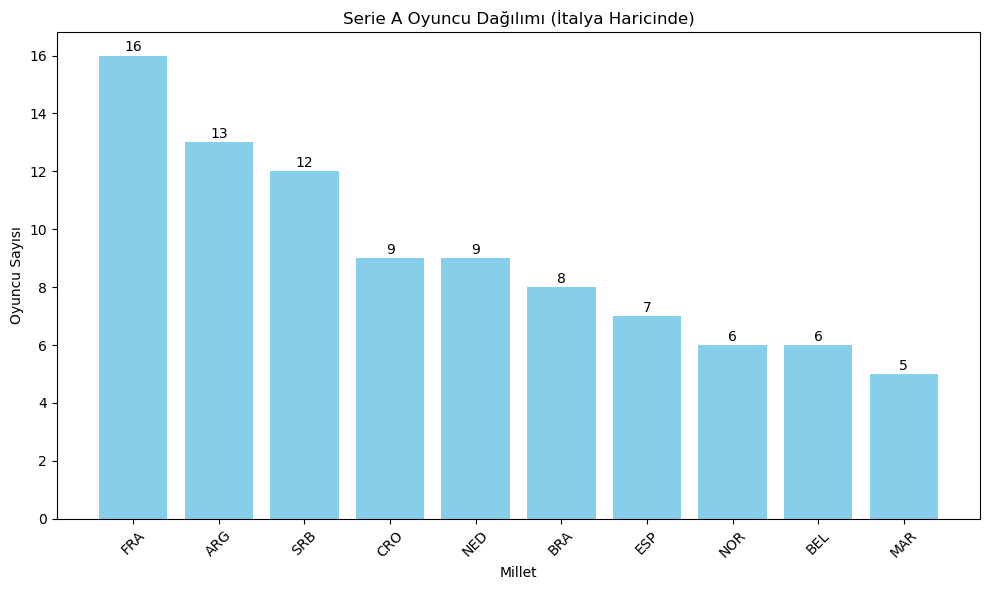

In [77]:
serie_a_data = df[df['League'] == 'Serie A']
serie_a_data = serie_a_data[serie_a_data['Nation'] != 'ITA']  

milletlerin_oyuncu_sayisi = serie_a_data['Nation'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(milletlerin_oyuncu_sayisi.index, milletlerin_oyuncu_sayisi, color='skyblue')
plt.title('Serie A Oyuncu Dağılımı (İtalya Haricinde)')
plt.xlabel('Millet')
plt.ylabel('Oyuncu Sayısı')
plt.xticks(rotation=45)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', 
             ha='center', 
             va='bottom')

plt.tight_layout()
plt.show()

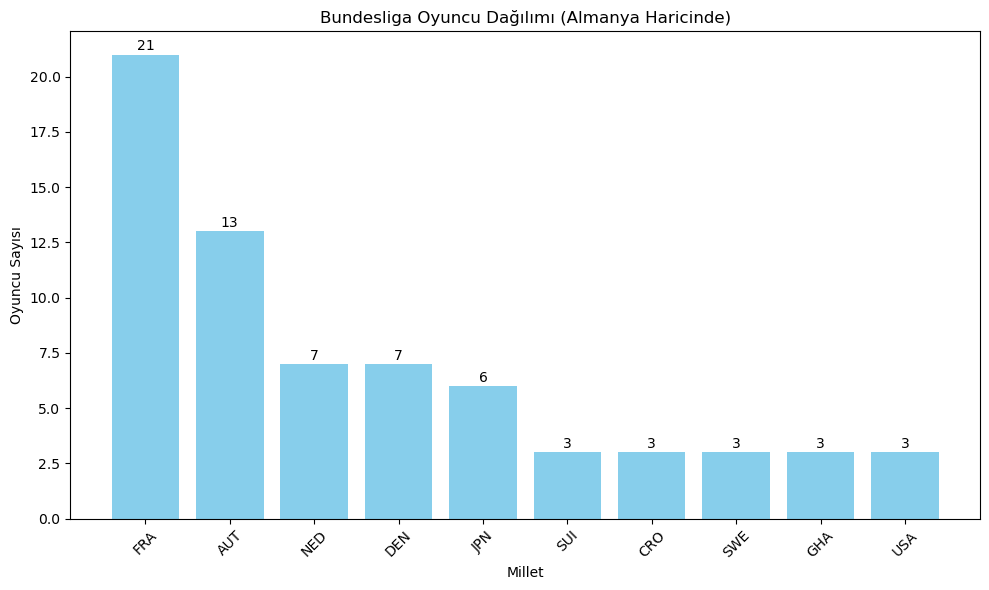

In [78]:
bundesliga_data = df[df['League'] == 'Bundesliga']
bundesliga_data = bundesliga_data[bundesliga_data['Nation'] != 'GER']  

milletlerin_oyuncu_sayisi = bundesliga_data['Nation'].value_counts().head(10)


plt.figure(figsize=(10, 6))
bars = plt.bar(milletlerin_oyuncu_sayisi.index, milletlerin_oyuncu_sayisi, color='skyblue')
plt.title('Bundesliga Oyuncu Dağılımı (Almanya Haricinde)')
plt.xlabel('Millet')
plt.ylabel('Oyuncu Sayısı')
plt.xticks(rotation=45)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', 
             ha='center', 
             va='bottom')

plt.tight_layout()
plt.show()

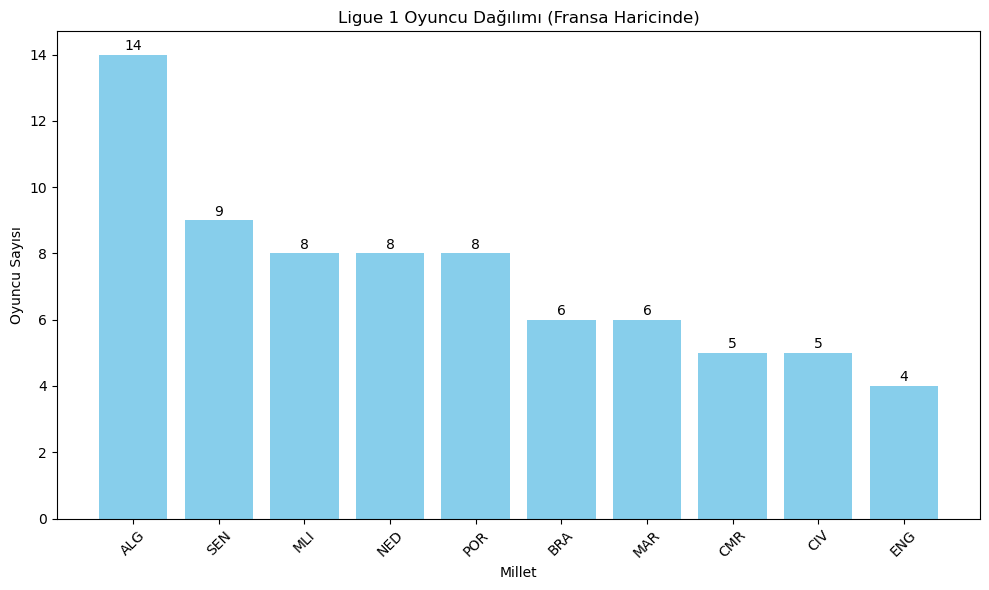

In [79]:
ligue_1_data = df[df['League'] == 'Ligue 1']
ligue_1_data = ligue_1_data[ligue_1_data['Nation'] != 'FRA']  

milletlerin_oyuncu_sayisi = ligue_1_data['Nation'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(milletlerin_oyuncu_sayisi.index, milletlerin_oyuncu_sayisi, color='skyblue')
plt.title('Ligue 1 Oyuncu Dağılımı (Fransa Haricinde)')
plt.xlabel('Millet')
plt.ylabel('Oyuncu Sayısı')
plt.xticks(rotation=45)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', 
             ha='center', 
             va='bottom')

plt.tight_layout()
plt.show()

In [80]:
premier_league_data = df[df['League'] == 'Premier League']
premier_league_data = premier_league_data[premier_league_data['Nation'] != 'ENG']
milletlerin_oyuncu_sayisi2 = premier_league_data['Nation'].value_counts().head(10)
milletlerin_oyuncu_sayisi2

BRA    22
POR    14
ESP    11
FRA    11
BEL    10
SCO     8
ARG     8
NGA     7
GHA     6
GER     6
Name: Nation, dtype: int64

In [81]:
ligue_1_data = df[df['League'] == 'Ligue 1']
ligue_1_data = ligue_1_data[ligue_1_data['Nation'] != 'FRA']  

milletlerin_oyuncu_sayisi1 = ligue_1_data['Nation'].value_counts().head(10)
milletlerin_oyuncu_sayisi1

ALG    14
SEN     9
MLI     8
NED     8
POR     8
BRA     6
MAR     6
CMR     5
CIV     5
ENG     4
Name: Nation, dtype: int64

In [82]:
eredivisie_data = df[df['League'] == 'Eredivisie']
eredivisie_data = eredivisie_data[eredivisie_data['Nation'] != 'NED']  

milletlerin_oyuncu_sayisi = eredivisie_data['Nation'].value_counts().head(10)
milletlerin_oyuncu_sayisi

BEL    10
SWE     9
NOR     9
MAR     9
DEN     8
TUR     5
GER     5
POR     4
GRE     4
USA     4
Name: Nation, dtype: int64

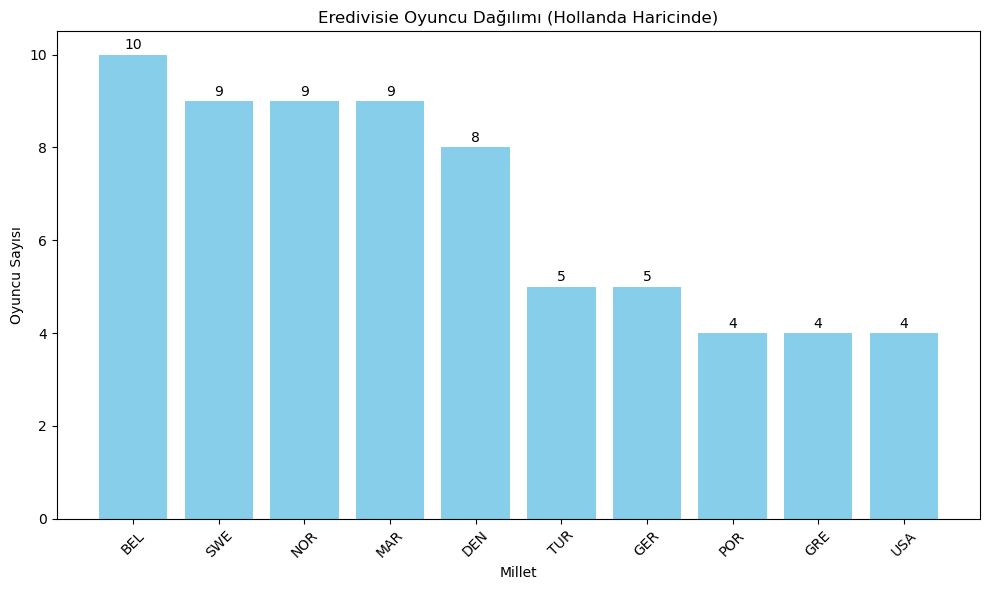

In [83]:
eredivisie_data = df[df['League'] == 'Eredivisie']
eredivisie_data = eredivisie_data[eredivisie_data['Nation'] != 'NED']  

milletlerin_oyuncu_sayisi = eredivisie_data['Nation'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(milletlerin_oyuncu_sayisi.index, milletlerin_oyuncu_sayisi, color='skyblue')
plt.title('Eredivisie Oyuncu Dağılımı (Hollanda Haricinde)')
plt.xlabel('Millet')
plt.ylabel('Oyuncu Sayısı')
plt.xticks(rotation=45)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.05, 
             f'{int(bar.get_height())}', 
             ha='center', 
             va='bottom')

plt.tight_layout()
plt.show()

In [84]:
df.columns

Index(['Player', 'Nation', 'League', 'Team', 'Pos', 'Main_Pos', 'Age', 'MP',
       'Playing Time_Starts', 'Playing Time.1_Min', 'Playing Time.2_90s',
       'Performance_Gls', 'Performance.1_Ast', 'Performance.2_G+A',
       'Performance.3_G-PK', 'Performance.4_PK', 'Performance.5_PKatt',
       'Performance.6_CrdY', 'Performance.7_CrdR', 'Performance.8_G+A-PK',
       'Performance.9_CrdTotal', 'Perfonmance_Score-Expected_Score',
       'Expected_xG', 'Expected.1_npxG', 'Expected.2_xAG',
       'Expected.3_npxG+xAG', 'Progression_PrgC', 'Progression.1_PrgP',
       'Progression.2_PrgR', 'Per 90 Minutes_Gls', 'Per 90 Minutes.1_Ast',
       'Per 90 Minutes.2_G+A', 'Per 90 Minutes.3_G-PK',
       'Per 90 Minutes.4_G+A-PK', 'Per 90 Minutes.5_xG',
       'Per 90 Minutes.6_xAG', 'Per 90 Minutes.7_xG+xAG',
       'Per 90 Minutes.8_npxG', 'Per 90 Minutes.9_npxG+xAG', 'Market_Value',
       'Market_Value_Point'],
      dtype='object')

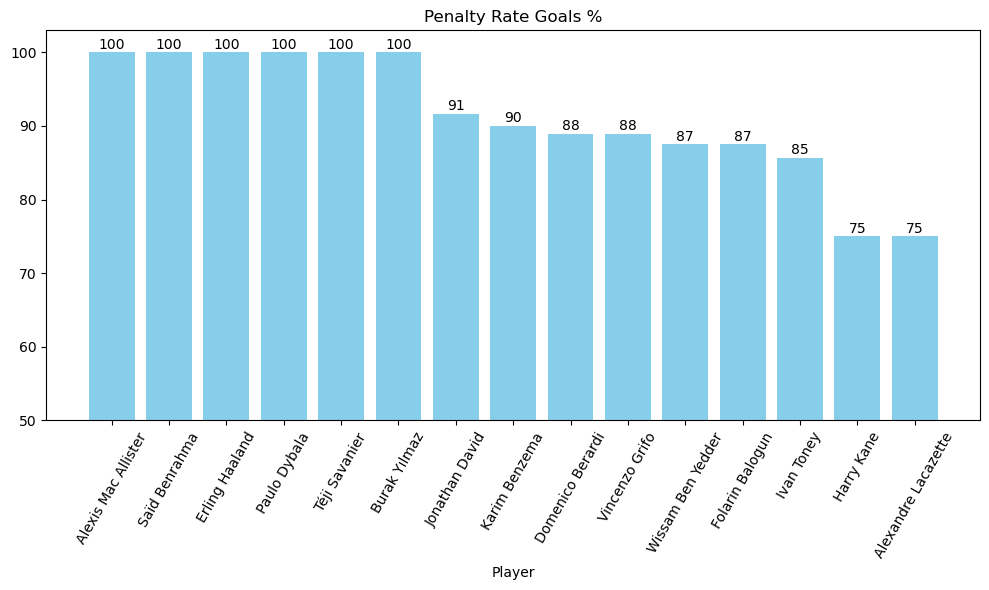

In [85]:
Penalty_Goals = df[df['Performance.4_PK'] >= 6]
Penalty_Goals = Penalty_Goals[["Player","Nation","League","Team","Performance.4_PK","Performance.5_PKatt"]]
Penalty_Goals['Penalty_Conversion_Rate'] = (Penalty_Goals['Performance.4_PK'] / Penalty_Goals['Performance.5_PKatt']) * 100
Penalty_Goals = Penalty_Goals.sort_values(by = "Penalty_Conversion_Rate", ascending = False)
Penalty_Goals.reset_index(drop = True, inplace = True)
Penalty_Goals.index +=1
plt.figure(figsize=(10, 6))
plt.bar(Penalty_Goals['Player'], Penalty_Goals['Penalty_Conversion_Rate'], color='skyblue')
plt.xlabel('Player')
plt.ylim(50,103)
plt.title('Penalty Rate Goals %')
plt.xticks(rotation=60)
for i, val in enumerate(Penalty_Goals['Penalty_Conversion_Rate']):
    plt.text(i, val + 0.1, int(val), ha='center', va='bottom') 
plt.tight_layout()  
plt.show()
                   

In [86]:
Perfonmance1_mean = one_point["Performance.8_G+A-PK"].mean()
Perfonmance2_mean = two_point["Performance.8_G+A-PK"].mean()
Perfonmance3_mean = three_point["Performance.8_G+A-PK"].mean()
Perfonmance4_mean = four_point["Performance.8_G+A-PK"].mean()
Perfonmance5_mean = five_point["Performance.8_G+A-PK"].mean()
Perfonmance6_mean = six_point["Performance.8_G+A-PK"].mean()
Perfonmance7_mean = seven_point["Performance.8_G+A-PK"].mean()
Perfonmance8_mean = eight_point["Performance.8_G+A-PK"].mean()
Perfonmance9_mean = nine_point["Performance.8_G+A-PK"].mean()
Perfonmance10_mean = ten_point["Performance.8_G+A-PK"].mean()



In [87]:

def ortalama_hesapla(degerler):
    toplam_deger = 0
    for deger in degerler:
        deger = deger.replace("€", "")
        if deger.endswith("m"):
            toplam_deger += float(deger[:-1]) * 1000000
        elif deger.endswith("k"):
            toplam_deger += float(deger[:-1]) * 1000
    ortalama = toplam_deger / len(degerler)
    return ortalama

sayi_str = ortalama_hesapla(one_point["Market_Value"])
market_deger1_mean = "{:,.9f}".format(sayi_str)  
market_deger1_mean = market_deger1_mean.replace('.', '').replace(',', '.', 1).replace(",", "")
market_deger1_mean = float(market_deger1_mean)

def milyonluk_ortalama_hesapla(degerler):
    toplam_deger = 0
    for deger in degerler:
        deger = deger.replace("€", "").replace("m", "")
        toplam_deger += float(deger)
    ortalama = toplam_deger / len(degerler)
    return ortalama

market_deger2_mean = milyonluk_ortalama_hesapla(two_point["Market_Value"])

def milyonluk_ortalama_hesapla(degerler):
    toplam_deger = 0
    for deger in degerler:
        deger = deger.replace("€", "").replace("m", "")
        toplam_deger += float(deger)
    ortalama = toplam_deger / len(degerler)
    return ortalama

market_deger3_mean = milyonluk_ortalama_hesapla(three_point["Market_Value"])

def milyonluk_ortalama_hesapla(degerler):
    toplam_deger = 0
    for deger in degerler:
        deger = deger.replace("€", "").replace("m", "")
        toplam_deger += float(deger)
    ortalama = toplam_deger / len(degerler)
    return ortalama

market_deger4_mean = milyonluk_ortalama_hesapla(four_point["Market_Value"])


def milyonluk_ortalama_hesapla(degerler):
    toplam_deger = 0
    for deger in degerler:
        deger = deger.replace("€", "").replace("m", "")
        toplam_deger += float(deger)
    ortalama = toplam_deger / len(degerler)
    return ortalama

market_deger5_mean = milyonluk_ortalama_hesapla(five_point["Market_Value"])


def milyonluk_ortalama_hesapla(degerler):
    toplam_deger = 0
    for deger in degerler:
        deger = deger.replace("€", "").replace("m", "")
        toplam_deger += float(deger)
    ortalama = toplam_deger / len(degerler)
    return ortalama

market_deger6_mean = milyonluk_ortalama_hesapla(six_point["Market_Value"])


def milyonluk_ortalama_hesapla(degerler):
    toplam_deger = 0
    for deger in degerler:
        deger = deger.replace("€", "").replace("m", "")
        toplam_deger += float(deger)
    ortalama = toplam_deger / len(degerler)
    return ortalama

market_deger7_mean = milyonluk_ortalama_hesapla(seven_point["Market_Value"])

def milyonluk_ortalama_hesapla(degerler):
    toplam_deger = 0
    for deger in degerler:
        deger = deger.replace("€", "").replace("m", "")
        toplam_deger += float(deger)
    ortalama = toplam_deger / len(degerler)
    return ortalama

market_deger8_mean = milyonluk_ortalama_hesapla(eight_point["Market_Value"])



def milyonluk_ortalama_hesapla(degerler):
    toplam_deger = 0
    for deger in degerler:
        deger = deger.replace("€", "").replace("m", "")
        toplam_deger += float(deger)
    ortalama = toplam_deger / len(degerler)
    return ortalama

market_deger9_mean = milyonluk_ortalama_hesapla(nine_point["Market_Value"])


def milyonluk_ortalama_hesapla(degerler):
    toplam_deger = 0
    for deger in degerler:
        deger = deger.replace("€", "").replace("m", "")
        toplam_deger += float(deger)
    ortalama = toplam_deger / len(degerler)
    return ortalama

market_deger10_mean = milyonluk_ortalama_hesapla(ten_point["Market_Value"])


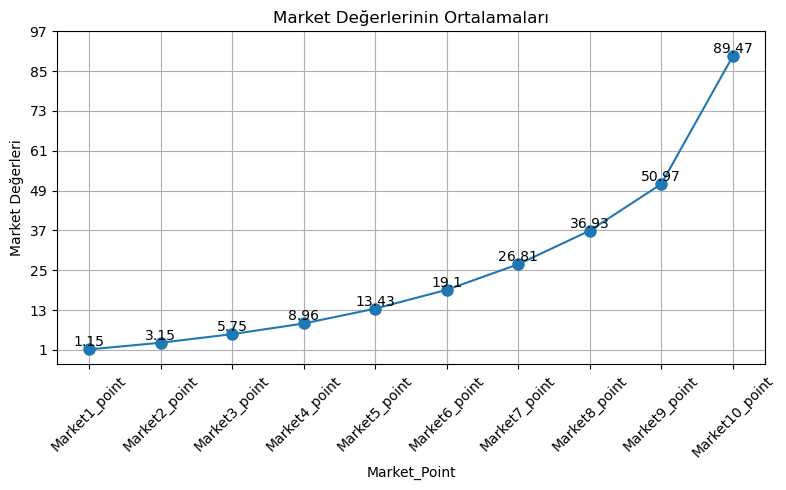

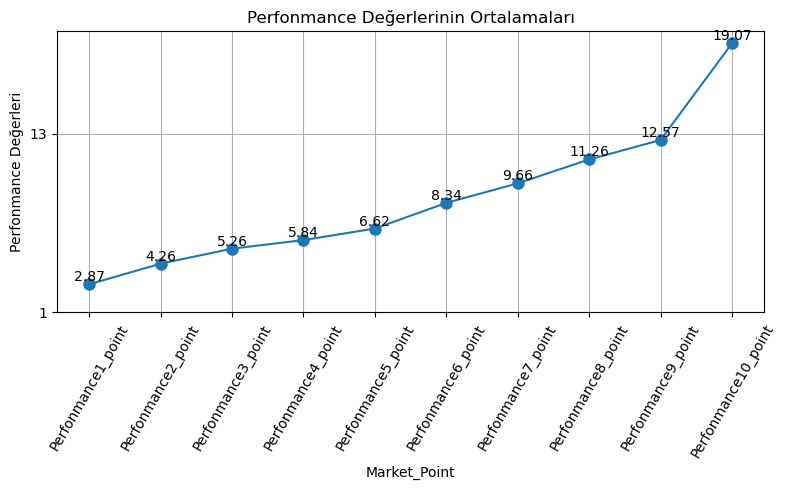

In [88]:
market_deger_mean = [market_deger1_mean, market_deger2_mean, market_deger3_mean, market_deger4_mean,
                     market_deger5_mean, market_deger6_mean, market_deger7_mean, market_deger8_mean,
                     market_deger9_mean, market_deger10_mean]

y_degerler = np.arange(1, 101, 12)

x_isimler = ["Market1_point", "Market2_point", "Market3_point", "Market4_point", "Market5_point",
             "Market6_point", "Market7_point", "Market8_point", "Market9_point", "Market10_point"]

plt.figure(figsize=(8, 5))  
plt.plot(market_deger_mean, marker='o', linestyle='-', markersize=8) 
for i in range(len(market_deger_mean)):
    plt.text(i, market_deger_mean[i], str(round(market_deger_mean[i], 2)), ha='center', va='bottom')

plt.xticks(range(len(x_isimler)), x_isimler, rotation=45)


plt.xlabel('Market_Point')
plt.ylabel('Market Değerleri')
plt.title('Market Değerlerinin Ortalamaları')

plt.yticks(y_degerler)
plt.grid(True)
plt.tight_layout()
plt.show()



Perfonmance_deger_mean = [Perfonmance1_mean, Perfonmance2_mean, Perfonmance3_mean, Perfonmance4_mean,
                     Perfonmance5_mean, Perfonmance6_mean, Perfonmance7_mean, Perfonmance8_mean,
                     Perfonmance9_mean, Perfonmance10_mean]

y_degerler = np.arange(1, 21, 12)

x_isimler = ["Perfonmance1_point", "Perfonmance2_point", "Perfonmance3_point", "Perfonmance4_point", "Perfonmance5_point",
             "Perfonmance6_point", "Perfonmance7_point", "Perfonmance8_point", "Perfonmance9_point", "Perfonmance10_point"]

plt.figure(figsize=(8, 5))  
plt.plot(Perfonmance_deger_mean, marker='o', linestyle='-', markersize=8) 

for i in range(len(Perfonmance_deger_mean)):
    plt.text(i, Perfonmance_deger_mean[i], str(round(Perfonmance_deger_mean[i], 2)), ha='center', va='bottom')

plt.xticks(range(len(x_isimler)), x_isimler, rotation=60)


plt.xlabel('Market_Point')
plt.ylabel('Perfonmance Değerleri')
plt.title('Perfonmance Değerlerinin Ortalamaları')
plt.yticks(y_degerler)
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
one = market_deger1_mean / Perfonmance1_mean
two = market_deger2_mean / Perfonmance2_mean
three = market_deger3_mean / Perfonmance3_mean
four = market_deger4_mean / Perfonmance4_mean
five = market_deger5_mean / Perfonmance5_mean
six = market_deger6_mean / Perfonmance6_mean
seven = market_deger7_mean / Perfonmance7_mean
eight = market_deger8_mean / Perfonmance8_mean
nine = market_deger9_mean / Perfonmance9_mean
ten = market_deger10_mean / Perfonmance10_mean


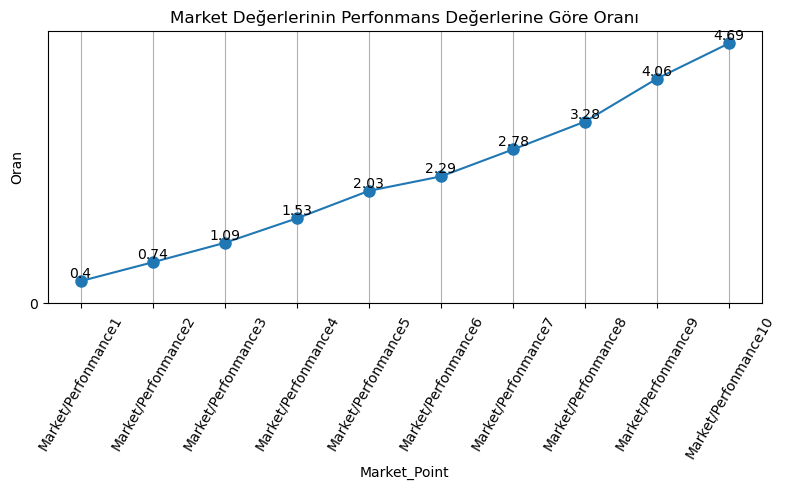

In [90]:
Aradaki_Oran = [one,two,three,four,five,six,seven,eight,nine,ten]

y_degerler = np.arange(0,5,20)
x_degerler = ["Market/Perfonmance1","Market/Perfonmance2","Market/Perfonmance3","Market/Perfonmance4","Market/Perfonmance5","Market/Perfonmance6",
              "Market/Perfonmance7","Market/Perfonmance8","Market/Perfonmance9","Market/Perfonmance10"]

plt.figure(figsize=(8, 5))  
plt.plot(Aradaki_Oran, marker='o', linestyle='-', markersize=8) 

for i in range(len(Aradaki_Oran)):
    plt.text(i, Aradaki_Oran[i], str(round(Aradaki_Oran[i], 2)), ha='center', va='bottom')

plt.xticks(range(len(x_degerler)), x_degerler, rotation=60)


plt.xlabel('Market_Point')
plt.ylabel('Oran')
plt.title('Market Değerlerinin Perfonmans Değerlerine Göre Oranı')
plt.yticks(y_degerler)
plt.grid(True)
plt.tight_layout()
plt.show()




In [91]:
df.columns

Index(['Player', 'Nation', 'League', 'Team', 'Pos', 'Main_Pos', 'Age', 'MP',
       'Playing Time_Starts', 'Playing Time.1_Min', 'Playing Time.2_90s',
       'Performance_Gls', 'Performance.1_Ast', 'Performance.2_G+A',
       'Performance.3_G-PK', 'Performance.4_PK', 'Performance.5_PKatt',
       'Performance.6_CrdY', 'Performance.7_CrdR', 'Performance.8_G+A-PK',
       'Performance.9_CrdTotal', 'Perfonmance_Score-Expected_Score',
       'Expected_xG', 'Expected.1_npxG', 'Expected.2_xAG',
       'Expected.3_npxG+xAG', 'Progression_PrgC', 'Progression.1_PrgP',
       'Progression.2_PrgR', 'Per 90 Minutes_Gls', 'Per 90 Minutes.1_Ast',
       'Per 90 Minutes.2_G+A', 'Per 90 Minutes.3_G-PK',
       'Per 90 Minutes.4_G+A-PK', 'Per 90 Minutes.5_xG',
       'Per 90 Minutes.6_xAG', 'Per 90 Minutes.7_xG+xAG',
       'Per 90 Minutes.8_npxG', 'Per 90 Minutes.9_npxG+xAG', 'Market_Value',
       'Market_Value_Point'],
      dtype='object')

#### ONE POİNT ####

In [92]:
one_point_progressionC_sort = one_point.sort_values(by = "Progression_PrgC", ascending = False)
one_point_progressionC_sort.index = range(1, len(one_point_progressionC_sort) + 1)
one_point_progressionC_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression_PrgC","Market_Value"]].head(10)



,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression_PrgC,Market_Value
1,Elayis Tavsan,NED,Eredivisie,NEC Nijmegen,Forward,21,6,126,€1.40m
2,Oussama Tannane,MAR,Eredivisie,NEC Nijmegen,Midfielder,28,15,91,€1.00m
3,Pedro,ESP,Serie A,SS Lazio,Forward,35,11,86,€1.50m
4,Couhaib Driouech,MAR,Eredivisie,Excelsior,Forward,20,6,86,€650.00k
5,Mark Diemers,NED,Eredivisie,Emmen,Midfielder,28,7,83,€1.20m
6,Riccardo Saponara,ITA,Serie A,ACF Fiorentina,Forward,30,10,73,€2.00m
7,Gaetano Oristanio,ITA,Eredivisie,Volendam,Midfielder,19,4,72,€1.00m
8,Mats Seuntjens,NED,Eredivisie,RKC Waalwijk,Forward,30,12,71,€1.20m
9,Antonio Candreva,ITA,Serie A,US Salernitana 1919,Midfielder,35,11,71,€1.50m
10,Marouan Azarkan,NED,Eredivisie,Excelsior,Forward,20,11,67,€2.00m


In [93]:
one_point_progressionP_sort = one_point.sort_values(by = "Progression.1_PrgP", ascending = False)
one_point_progressionP_sort.index = range(1, len(one_point_progressionP_sort) + 1)
one_point_progressionP_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.1_PrgP","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.1_PrgP,Market_Value
1,Johan Gastien,FRA,Ligue 1,Clermont Foot,Midfielder,34,7,219,€700.00k
2,Oussama Tannane,MAR,Eredivisie,NEC Nijmegen,Midfielder,28,15,184,€1.00m
3,Lasse Schöne,DEN,Eredivisie,NEC Nijmegen,Midfielder,36,2,175,€250.00k
4,Vurnon Anita,CUW,Eredivisie,RKC Waalwijk,Midfielder,33,4,175,€300.00k
5,Philippe Rommens,BEL,Eredivisie,Go Ahead Eagles,Midfielder,24,4,168,€1.20m
6,Kenzo Goudmijn,NED,Eredivisie,Excelsior,Midfielder,20,6,165,€1.30m
7,Keziah Veendorp,NED,Eredivisie,Emmen,Midfielder,25,3,161,€550.00k
8,Mark Diemers,NED,Eredivisie,Emmen,Midfielder,28,7,160,€1.20m
9,Melle Meulensteen,NED,Eredivisie,Vitesse,Midfielder,23,3,157,€2.00m
10,Jens Toornstra,NED,Eredivisie,Utrecht,Midfielder,33,6,155,€750.00k


In [94]:
one_point_progressionR_sort = one_point.sort_values(by = "Progression.2_PrgR", ascending = False)
one_point_progressionR_sort.index = range(1, len(one_point_progressionR_sort) + 1)
one_point_progressionR_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.2_PrgR","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.2_PrgR,Market_Value
1,Isac Lidberg,SWE,Eredivisie,Go Ahead Eagles,Forward,23,12,214,€750.00k
2,Elayis Tavsan,NED,Eredivisie,NEC Nijmegen,Forward,21,6,210,€1.40m
3,Riccardo Saponara,ITA,Serie A,ACF Fiorentina,Forward,30,10,200,€2.00m
4,Pedro,ESP,Serie A,SS Lazio,Forward,35,11,182,€1.50m
5,Federico Di Francesco,ITA,Serie A,Lecce,Forward,28,4,177,€1.80m
6,Mounaim El Idrissy,FRA,Ligue 1,AC Ajaccio,Forward,23,6,173,€2.00m
7,Couhaib Driouech,MAR,Eredivisie,Excelsior,Forward,20,6,173,€650.00k
8,Elba Rashani,KVX,Ligue 1,Clermont Foot,Midfielder,29,6,172,€2.00m
9,Antonio Candreva,ITA,Serie A,US Salernitana 1919,Midfielder,35,11,171,€1.50m
10,Bobby Adekanye,NED,Eredivisie,Go Ahead Eagles,Forward,23,10,167,€800.00k


##### TWO POİNT #####

In [95]:
two_point_progressionC_sort = two_point.sort_values(by = "Progression_PrgC", ascending = False)
two_point_progressionC_sort.index = range(1, len(two_point_progressionC_sort) + 1)
two_point_progressionC_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression_PrgC","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression_PrgC,Market_Value
1,Virgil Misidjan,SUR,Eredivisie,Twente,Forward,29,10,161,€3.00m
2,Million Manhoef,NED,Eredivisie,Vitesse,Forward,20,14,100,€3.50m
3,Willian,BRA,Premier League,Fulham FC,Forward,33,10,97,€3.00m
4,Chris Führich,GER,Bundesliga,VfB Stuttgart,Forward,24,8,93,€4.00m
5,Iñigo Córdoba,ESP,Eredivisie,Fortuna Sittard,Forward,25,9,93,€2.30m
6,Giacomo Bonaventura,ITA,Serie A,ACF Fiorentina,Midfielder,32,11,89,€2.50m
7,Lameck Banda,ZAM,Serie A,Lecce,Forward,21,3,86,€4.00m
8,Nemanja Radonjić,SRB,Serie A,Torino FC,Midfielder,26,7,86,€4.00m
9,Kevin Agudelo,COL,Serie A,Spezia Calcio,Midfielder,23,1,81,€3.00m
10,Marius Bülter,GER,Bundesliga,FC Schalke 04,Forward,29,8,78,€3.00m


In [96]:
two_point_progressionP_sort = two_point.sort_values(by = "Progression.1_PrgP", ascending = False)
two_point_progressionP_sort.index = range(1, len(two_point_progressionP_sort) + 1)
two_point_progressionP_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.1_PrgP","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.1_PrgP,Market_Value
1,Ivan Rakitić,CRO,La Liga,Sevilla FC,Midfielder,34,7,251,€4.00m
2,Jordy Clasie,NED,Eredivisie,AZ Alkmaar,Midfielder,31,5,245,€3.00m
3,Thom Haye,NED,Eredivisie,Heerenveen,Midfielder,27,5,236,€2.50m
4,Nemanja Matić,SRB,Serie A,AS Roma,Midfielder,33,4,220,€4.00m
5,Kevin Stöger,AUT,Bundesliga,VfL Bochum,Midfielder,28,5,214,€3.00m
6,Batista Mendy,FRA,Ligue 1,Angers SCO,Midfielder,22,0,195,€3.00m
7,Florian Sotoca,FRA,Ligue 1,Lens,Midfielder,31,16,186,€4.00m
8,Pierre Lees-Melou,FRA,Ligue 1,Stade Brestois,Midfielder,29,11,179,€4.00m
9,Giacomo Bonaventura,ITA,Serie A,ACF Fiorentina,Midfielder,32,11,160,€2.50m
10,Aaron Ramsey,WAL,Ligue 1,OGC Nice,Midfielder,31,3,158,€2.50m


In [97]:
two_point_progressionR_sort = two_point.sort_values(by = "Progression.2_PrgR", ascending = False)
two_point_progressionR_sort.index = range(1, len(two_point_progressionR_sort) + 1)
two_point_progressionR_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.2_PrgR","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.2_PrgR,Market_Value
1,Virgil Misidjan,SUR,Eredivisie,Twente,Forward,29,10,309,€3.00m
2,Florian Sotoca,FRA,Ligue 1,Lens,Midfielder,31,16,302,€4.00m
3,Alexis Sánchez,CHI,Ligue 1,Marsilya,Forward,33,18,267,€4.00m
4,Million Manhoef,NED,Eredivisie,Vitesse,Forward,20,14,244,€3.50m
5,Christopher Antwi-Adjei,GHA,Bundesliga,VfL Bochum,Forward,28,9,231,€2.20m
6,Karim Onisiwo,AUT,Bundesliga,1. FSV Mainz 05,Forward,30,15,220,€3.50m
7,Rafael Ratão,BRA,Ligue 1,Toulouse FC,Forward,26,10,216,€2.50m
8,Isaac Success,NGA,Serie A,Udinese Calcio,Forward,26,8,200,€4.00m
9,Marius Bülter,GER,Bundesliga,FC Schalke 04,Forward,29,8,199,€3.00m
10,Edin Džeko,BIH,Serie A,Inter Milan,Forward,36,18,193,€4.00m


#### THREE POİNT 

In [98]:
three_point_progressionC_sort = three_point.sort_values(by = "Progression_PrgC", ascending = False)
three_point_progressionC_sort.index = range(1, len(three_point_progressionC_sort) + 1)
three_point_progressionC_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression_PrgC","Market_Value"]].head(10)


,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression_PrgC,Market_Value
1,Oussama Idrissi,MAR,Eredivisie,Feyenoord,Forward,26,10,126,€5.50m
2,Álvaro García,ESP,La Liga,Rayo Vallecano,Forward,29,10,116,€6.00m
3,Rémy Cabella,FRA,Ligue 1,LOSC Lille,Midfielder,32,18,113,€5.00m
4,Linton Maina,GER,Bundesliga,1. FC Köln,Forward,23,12,109,€6.00m
5,Arnaud Nordin,FRA,Ligue 1,Montpellier,Forward,24,12,109,€7.00m
6,Javairô Dilrosun,NED,Eredivisie,Feyenoord,Forward,24,10,101,€6.00m
7,Dušan Tadić,SRB,Eredivisie,Ajax,Forward,33,24,97,€6.00m
8,Gonzalo Plata,ECU,La Liga,Real Valladolid CF,Forward,21,6,97,€5.00m
9,Carles Pérez,ESP,La Liga,RC Celta de Vigo,Midfielder,24,11,93,€5.00m
10,Jordan Ayew,GHA,Premier League,Crystal Palace FC,Forward,30,7,83,€5.00m


In [99]:
three_point_progressionP_sort = three_point.sort_values(by = "Progression.1_PrgP", ascending = False)
three_point_progressionP_sort.index = range(1, len(three_point_progressionP_sort) + 1)
three_point_progressionP_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.1_PrgP","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.1_PrgP,Market_Value
1,Daniel Parejo,ESP,La Liga,Villarreal CF,Midfielder,33,6,290,€6.00m
2,Sergio Busquets,ESP,La Liga,FC Barcelona,Midfielder,34,4,277,€5.00m
3,Dušan Tadić,SRB,Eredivisie,Ajax,Forward,33,24,250,€6.00m
4,Stijn Spierings,NED,Ligue 1,Toulouse FC,Midfielder,26,5,231,€6.00m
5,Rémy Cabella,FRA,Ligue 1,LOSC Lille,Midfielder,32,18,230,€5.00m
6,Pedro Chirivella,ESP,Ligue 1,FC Nantes,Midfielder,25,2,216,€6.00m
7,Jordan Ferri,FRA,Ligue 1,Montpellier,Midfielder,30,4,209,€5.00m
8,Mikel Vesga,ESP,La Liga,Athletic Bilbao,Midfielder,29,6,199,€6.00m
9,Flavien Tait,FRA,Ligue 1,Stade Rennais FC,Midfielder,29,4,191,€6.00m
10,Florian Kainz,AUT,Bundesliga,1. FC Köln,Midfielder,29,14,188,€5.00m


In [100]:
three_point_progressionR_sort = three_point.sort_values(by = "Progression.2_PrgR", ascending = False)
three_point_progressionR_sort.index = range(1, len(three_point_progressionR_sort) + 1)
three_point_progressionR_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.2_PrgR","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.2_PrgR,Market_Value
1,Dušan Tadić,SRB,Eredivisie,Ajax,Forward,33,24,585,€6.00m
2,Álvaro García,ESP,La Liga,Rayo Vallecano,Forward,29,10,293,€6.00m
3,Oussama Idrissi,MAR,Eredivisie,Feyenoord,Forward,26,10,246,€5.50m
4,Rémy Cabella,FRA,Ligue 1,LOSC Lille,Midfielder,32,18,242,€5.00m
5,Iago Aspas,ESP,La Liga,RC Celta de Vigo,Forward,34,13,239,€6.00m
6,Javairô Dilrosun,NED,Eredivisie,Feyenoord,Forward,24,10,218,€6.00m
7,Gonzalo Plata,ECU,La Liga,Real Valladolid CF,Forward,21,6,213,€5.00m
8,Linton Maina,GER,Bundesliga,1. FC Köln,Forward,23,12,193,€6.00m
9,Jens Odgaard,DEN,Eredivisie,AZ Alkmaar,Forward,23,13,191,€6.00m
10,Bobby Reid,JAM,Premier League,Fulham FC,Forward,29,5,186,€7.00m


##### FOUR POİNT

In [101]:
four_point_progressionC_sort = four_point.sort_values(by = "Progression_PrgC", ascending = False)
four_point_progressionC_sort.index = range(1, len(four_point_progressionC_sort) + 1)
four_point_progressionC_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression_PrgC","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression_PrgC,Market_Value
1,Moses Simon,NGA,Ligue 1,FC Nantes,Forward,27,8,161,€8.00m
2,Václav Černý,CZE,Eredivisie,Twente,Forward,24,24,144,€8.00m
3,Junya Ito,JPN,Ligue 1,Stade de Reims,Forward,29,11,133,€10.00m
4,Jean-Ricner Bellegarde,FRA,Ligue 1,RC Strasbourg Alsace,Midfielder,24,8,104,€10.00m
5,Johan Bakayoko,BEL,Eredivisie,PSV Eindhoven,Forward,19,10,102,€10.00m
6,Gianluca Caprari,ITA,Serie A,Monza,Midfielder,29,6,100,€8.00m
7,Zakaria Aboukhlal,MAR,Ligue 1,Toulouse FC,Forward,22,20,100,€9.00m
8,Franck Honorat,FRA,Ligue 1,Stade Brestois,Forward,25,12,98,€10.00m
9,Adama Traoré,ESP,Premier League,Wolverhampton Wanderers FC,Forward,26,4,85,€10.00m
10,Érik Lamela,ARG,La Liga,Sevilla FC,Forward,30,12,84,€9.00m


In [102]:
four_point_progressionP_sort = four_point.sort_values(by = "Progression.1_PrgP", ascending = False)
four_point_progressionP_sort.index = range(1, len(four_point_progressionP_sort) + 1)
four_point_progressionP_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.1_PrgP","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.1_PrgP,Market_Value
1,Benjamin André,FRA,Ligue 1,LOSC Lille,Midfielder,31,2,309,€9.00m
2,Ramiz Zerrouki,ALG,Eredivisie,Twente,Midfielder,24,5,262,€8.00m
3,Pascal Groß,GER,Premier League,Brighton & Hove Albion FC,Midfielder,31,20,255,€8.00m
4,Luka Modrić,CRO,La Liga,Real Madrid CF,Midfielder,36,10,234,€10.00m
5,Jordan Henderson,ENG,Premier League,Liverpool FC,Midfielder,32,3,214,€10.00m
6,Azor Matusiwa,NED,Ligue 1,Stade de Reims,Midfielder,24,0,213,€7.50m
7,Rolando Mandragora,ITA,Serie A,ACF Fiorentina,Midfielder,25,9,212,€10.00m
8,Téji Savanier,FRA,Ligue 1,Montpellier,Midfielder,30,10,205,€10.00m
9,Moi Gómez,ESP,La Liga,CA Osasuna,Midfielder,28,6,184,€10.00m
10,Óliver Torres,ESP,La Liga,Sevilla FC,Midfielder,27,6,177,€9.00m


In [103]:
four_point_progressionR_sort = four_point.sort_values(by = "Progression.2_PrgR", ascending = False)
four_point_progressionR_sort.index = range(1, len(four_point_progressionR_sort) + 1)
four_point_progressionR_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.2_PrgR","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.2_PrgR,Market_Value
1,Junya Ito,JPN,Ligue 1,Stade de Reims,Forward,29,11,338,€10.00m
2,Václav Černý,CZE,Eredivisie,Twente,Forward,24,24,290,€8.00m
3,Zakaria Aboukhlal,MAR,Ligue 1,Toulouse FC,Forward,22,20,276,€9.00m
4,Franck Honorat,FRA,Ligue 1,Stade Brestois,Forward,25,12,261,€10.00m
5,Moses Simon,NGA,Ligue 1,FC Nantes,Forward,27,8,249,€8.00m
6,Johan Bakayoko,BEL,Eredivisie,PSV Eindhoven,Forward,19,10,240,€10.00m
7,Marvin Ducksch,GER,Bundesliga,SV Werder Bremen,Forward,28,18,215,€7.50m
8,M'Bala Nzola,ANG,Serie A,Spezia Calcio,Forward,25,14,215,€8.00m
9,Fares Chaïbi,ALG,Ligue 1,Toulouse FC,Forward,19,14,212,€10.00m
10,Érik Lamela,ARG,La Liga,Sevilla FC,Forward,30,12,212,€9.00m


   #### FİVE POİNT

In [104]:
five_point_progressionC_sort = five_point.sort_values(by = "Progression_PrgC", ascending = False)
five_point_progressionC_sort.index = range(1, len(five_point_progressionC_sort) + 1)
five_point_progressionC_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression_PrgC","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression_PrgC,Market_Value
1,Rodrigo Riquelme,ESP,La Liga,Girona FC,Midfielder,22,9,116,€12.00m
2,Felipe Anderson,BRA,Serie A,SS Lazio,Forward,29,17,113,€15.00m
3,Matteo Politano,ITA,Serie A,SSC Napoli,Forward,28,5,109,€15.00m
4,Sergio Canales,ESP,La Liga,Real Betis,Forward,31,8,103,€15.00m
5,Tijjani Reijnders,NED,Eredivisie,AZ Alkmaar,Midfielder,24,9,100,€14.00m
6,Dodi Lukebakio,BEL,Bundesliga,Hertha BSC Berlin,Forward,24,12,96,€12.00m
7,Krépin Diatta,SEN,Ligue 1,Monaco,Midfielder,23,9,95,€15.00m
8,Abdessamad Ezzalzouli,MAR,La Liga,CA Osasuna,Forward,20,8,93,€15.00m
9,Vincenzo Grifo,ITA,Bundesliga,SC Freiburg,Midfielder,29,16,92,€12.00m
10,Matteo Pessina,ITA,Serie A,Monza,Midfielder,25,5,77,€15.00m


In [105]:
five_point_progressionC_sort = five_point.sort_values(by = "Progression.1_PrgP", ascending = False)
five_point_progressionC_sort.index = range(1, len(five_point_progressionC_sort) + 1)
five_point_progressionC_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.1_PrgP","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.1_PrgP,Market_Value
1,Toni Kroos,GER,La Liga,Real Madrid CF,Midfielder,32,8,407,€15.00m
2,Branco van den Boomen,NED,Ligue 1,Toulouse FC,Midfielder,27,15,321,€12.00m
3,Steven Berghuis,NED,Eredivisie,Ajax,Midfielder,30,17,265,€12.00m
4,Tijjani Reijnders,NED,Eredivisie,AZ Alkmaar,Midfielder,24,9,257,€14.00m
5,Kenneth Taylor,NED,Eredivisie,Ajax,Midfielder,20,11,237,€12.00m
6,William Carvalho,POR,La Liga,Real Betis,Midfielder,30,6,233,€14.00m
7,Corentin Tolisso,FRA,Ligue 1,Olimpik Lyon,Midfielder,27,3,230,€14.00m
8,Dani Ceballos,ESP,La Liga,Real Madrid CF,Midfielder,25,8,211,€12.00m
9,Maxime Lopez,FRA,Serie A,US Sassuolo Calcio,Midfielder,24,0,210,€15.00m
10,Matteo Pessina,ITA,Serie A,Monza,Midfielder,25,5,193,€15.00m


In [106]:
five_point_progressionR_sort = five_point.sort_values(by = "Progression.2_PrgR", ascending = False)
five_point_progressionR_sort.index = range(1, len(five_point_progressionR_sort) + 1)
five_point_progressionR_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.2_PrgR","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.2_PrgR,Market_Value
1,Felipe Anderson,BRA,Serie A,SS Lazio,Forward,29,17,312,€15.00m
2,Krépin Diatta,SEN,Ligue 1,Monaco,Midfielder,23,9,303,€15.00m
3,Christian Kouamé,CIV,Serie A,ACF Fiorentina,Forward,24,14,266,€12.00m
4,Mario Götze,GER,Bundesliga,Eintracht Frankfurt,Midfielder,30,11,249,€12.00m
5,Álex Berenguer,ESP,La Liga,Athletic Bilbao,Forward,27,8,249,€15.00m
6,Wissam Ben Yedder,FRA,Ligue 1,Monaco,Forward,31,23,236,€15.00m
7,Alexandre Lacazette,FRA,Ligue 1,Olimpik Lyon,Forward,31,31,227,€14.00m
8,Riccardo Orsolini,ITA,Serie A,Bologna FC 1909,Forward,25,12,212,€12.00m
9,Ciro Immobile,ITA,Serie A,SS Lazio,Forward,32,16,210,€15.00m
10,Thomas Müller,GER,Bundesliga,FC Bayern München,Midfielder,32,20,208,€12.00m


####  SİX POİNT

In [107]:
six_point_progressionC_sort = six_point.sort_values(by = "Progression_PrgC", ascending = False)
six_point_progressionC_sort.index = range(1, len(six_point_progressionC_sort) + 1)
six_point_progressionC_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression_PrgC","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression_PrgC,Market_Value
1,Ludovic Blas,FRA,Ligue 1,FC Nantes,Midfielder,24,17,154,€20.00m
2,Sheraldo Becker,SUR,Bundesliga,1. FC Union Berlin,Forward,27,22,146,€17.00m
3,Samuel Lino,BRA,La Liga,Valencia CF,Forward,22,10,144,€16.00m
4,Steven Bergwijn,NED,Eredivisie,Ajax,Forward,24,17,142,€22.00m
5,Armand Lauriente,FRA,Serie A,US Sassuolo Calcio,Forward,23,12,127,€18.00m
6,Jonathan Ikone,FRA,Serie A,ACF Fiorentina,Forward,24,12,114,€16.00m
7,Jonathan Bamba,CIV,Ligue 1,LOSC Lille,Forward,26,13,111,€20.00m
8,Sergi Darder,ESP,La Liga,RCD Espanyol,Midfielder,28,10,111,€16.00m
9,Solly March,ENG,Premier League,Brighton & Hove Albion FC,Forward,28,16,110,€22.00m
10,Lee Kang-in,KOR,La Liga,RCD Mallorca,Midfielder,21,12,107,€22.00m


In [108]:
six_point_progressionP_sort = six_point.sort_values(by = "Progression.1_PrgP", ascending = False)
six_point_progressionP_sort.index = range(1, len(six_point_progressionP_sort) + 1)
six_point_progressionP_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.1_PrgP","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.1_PrgP,Market_Value
1,Joey Veerman,NED,Eredivisie,PSV Eindhoven,Midfielder,23,14,309,€16.00m
2,Luis Alberto,ESP,Serie A,SS Lazio,Midfielder,29,14,306,€18.00m
3,Jordan Veretout,FRA,Ligue 1,Marsilya,Midfielder,29,8,302,€16.00m
4,Benjamin Bourigeaud,FRA,Ligue 1,Stade Rennais FC,Midfielder,28,18,291,€18.00m
5,Valentin Rongier,FRA,Ligue 1,Marsilya,Midfielder,27,3,283,€22.00m
6,Granit Xhaka,SUI,Premier League,Arsenal FC,Midfielder,29,16,252,€20.00m
7,Djibril Sow,SUI,Bundesliga,Eintracht Frankfurt,Midfielder,25,4,235,€22.00m
8,Sergi Darder,ESP,La Liga,RCD Espanyol,Midfielder,28,10,233,€16.00m
9,Christian Eriksen,DEN,Premier League,Manchester United FC,Midfielder,30,12,224,€22.00m
10,Enzo Le Fée,FRA,Ligue 1,FC Lorient,Midfielder,22,12,218,€20.00m


In [109]:
six_point_progressionR_sort = six_point.sort_values(by = "Progression.2_PrgR", ascending = False)
six_point_progressionR_sort.index = range(1, len(six_point_progressionR_sort) + 1)
six_point_progressionR_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.2_PrgR","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.2_PrgR,Market_Value
1,Solly March,ENG,Premier League,Brighton & Hove Albion FC,Forward,28,16,357,€22.00m
2,Jonathan Bamba,CIV,Ligue 1,LOSC Lille,Forward,26,13,345,€20.00m
3,Sheraldo Becker,SUR,Bundesliga,1. FC Union Berlin,Forward,27,22,325,€17.00m
4,Steven Bergwijn,NED,Eredivisie,Ajax,Forward,24,17,319,€22.00m
5,Ludovic Blas,FRA,Ligue 1,FC Nantes,Midfielder,24,17,304,€20.00m
6,Cengiz Ünder,TUR,Ligue 1,Marsilya,Midfielder,25,8,282,€20.00m
7,Benjamin Bourigeaud,FRA,Ligue 1,Stade Rennais FC,Midfielder,28,18,280,€18.00m
8,Jonathan Ikone,FRA,Serie A,ACF Fiorentina,Forward,24,12,265,€16.00m
9,Armand Lauriente,FRA,Serie A,US Sassuolo Calcio,Forward,23,12,263,€18.00m
10,Gaëtan Laborde,FRA,Ligue 1,OGC Nice,Forward,28,20,263,€16.00m


#### SEVEN POİNT

In [110]:
seven_point_progressionC_sort = seven_point.sort_values(by = "Progression_PrgC", ascending = False)
seven_point_progressionC_sort.index = range(1, len(seven_point_progressionC_sort) + 1)
seven_point_progressionC_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression_PrgC","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression_PrgC,Market_Value
1,Nico Williams,ESP,La Liga,Athletic Bilbao,Forward,20,13,174,€30.00m
2,Samuel Chukwueze,NGA,La Liga,Villarreal CF,Forward,23,22,166,€25.00m
3,Saïd Benrahma,ALG,Premier League,West Ham United FC,Forward,26,9,148,€25.00m
4,Mattia Zaccagni,ITA,Serie A,SS Lazio,Forward,27,18,145,€30.00m
5,Rayan Cherki,FRA,Ligue 1,Olimpik Lyon,Midfielder,18,11,133,€30.00m
6,Iñaki Williams,GHA,La Liga,Athletic Bilbao,Forward,28,15,127,€25.00m
7,Jeremy Doku,BEL,Ligue 1,Stade Rennais FC,Midfielder,20,10,118,€28.00m
8,Takefusa Kubo,JPN,La Liga,Real Sociedad,Forward,22,10,111,€25.00m
9,Hirving Lozano,MEX,Serie A,SSC Napoli,Forward,27,7,110,€25.00m
10,Antoine Griezmann,FRA,La Liga,Atlético Madrid,Forward,31,34,107,€25.00m


In [111]:
seven_point_progressionP_sort = seven_point.sort_values(by = "Progression.1_PrgP", ascending = False)
seven_point_progressionP_sort.index = range(1, len(seven_point_progressionP_sort) + 1)
seven_point_progressionP_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.1_PrgP","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.1_PrgP,Market_Value
1,Youssouf Fofana,FRA,Ligue 1,Monaco,Midfielder,23,4,305,€25.00m
2,Sofyan Amrabat,MAR,Serie A,ACF Fiorentina,Midfielder,25,1,288,€30.00m
3,Manuel Locatelli,ITA,Serie A,Juventus FC,Midfielder,24,2,217,€30.00m
4,Mattéo Guendouzi,FRA,Ligue 1,Marsilya,Midfielder,23,8,206,€25.00m
5,Antoine Griezmann,FRA,La Liga,Atlético Madrid,Forward,31,34,197,€25.00m
6,Daichi Kamada,JPN,Bundesliga,Eintracht Frankfurt,Midfielder,25,18,194,€27.00m
7,Alex Iwobi,NGA,Premier League,Everton FC,Midfielder,26,10,194,€28.00m
8,Teun Koopmeiners,NED,Serie A,Atalanta BC,Midfielder,24,12,186,€30.00m
9,Maxence Caqueret,FRA,Ligue 1,Olimpik Lyon,Midfielder,22,11,183,€25.00m
10,Youri Tielemans,BEL,Premier League,Leicester City,Midfielder,25,5,181,€25.00m


In [112]:
seven_point_progressionR_sort = seven_point.sort_values(by = "Progression.2_PrgR", ascending = False)
seven_point_progressionR_sort.index = range(1, len(seven_point_progressionR_sort) + 1)
seven_point_progressionR_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.2_PrgR","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.2_PrgR,Market_Value
1,Iñaki Williams,GHA,La Liga,Athletic Bilbao,Forward,28,15,341,€25.00m
2,Mattia Zaccagni,ITA,Serie A,SS Lazio,Forward,27,18,341,€30.00m
3,Samuel Chukwueze,NGA,La Liga,Villarreal CF,Forward,23,22,330,€25.00m
4,Nico Williams,ESP,La Liga,Athletic Bilbao,Forward,20,13,321,€30.00m
5,Saïd Benrahma,ALG,Premier League,West Ham United FC,Forward,26,9,315,€25.00m
6,Robert Lewandowski,POL,La Liga,FC Barcelona,Forward,33,40,305,€30.00m
7,Folarin Balogun,USA,Ligue 1,Stade de Reims,Forward,21,17,283,€30.00m
8,Aleksandr Golovin,RUS,Ligue 1,Monaco,Midfielder,26,15,270,€28.00m
9,Timo Werner,GER,Bundesliga,RB Leipzig,Forward,26,22,265,€25.00m
10,Rayan Cherki,FRA,Ligue 1,Olimpik Lyon,Midfielder,18,11,260,€30.00m


### EİGHT POİNT

In [113]:
eight_point_progressionC_sort = eight_point.sort_values(by = "Progression_PrgC", ascending = False)
eight_point_progressionC_sort.index = range(1, len(eight_point_progressionC_sort) + 1)
eight_point_progressionC_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression_PrgC","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression_PrgC,Market_Value
1,Jeremie Frimpong,NED,Bundesliga,Bayer 04 Leverkusen,Midfielder,21,18,219,€40.00m
2,Xavi Simons,NED,Eredivisie,PSV Eindhoven,Forward,19,25,148,€40.00m
3,Kaoru Mitoma,JPN,Premier League,Brighton & Hove Albion FC,Forward,25,17,143,€32.00m
4,Lionel Messi,ARG,Ligue 1,Paris Saint-Germain FC,Forward,35,40,139,€35.00m
5,Jarrod Bowen,ENG,Premier League,West Ham United FC,Forward,25,17,124,€38.00m
6,Khéphren Thuram,FRA,Ligue 1,OGC Nice,Midfielder,21,9,121,€40.00m
7,Seko Fofana,CIV,Ligue 1,Lens,Midfielder,27,14,117,€32.00m
8,Michael Olise,FRA,Premier League,Crystal Palace FC,Forward,20,13,111,€38.00m
9,Adrien Rabiot,FRA,Serie A,Juventus FC,Midfielder,27,17,105,€40.00m
10,Harvey Barnes,ENG,Premier League,Leicester City,Forward,24,16,100,€35.00m


In [114]:
eight_point_progressionP_sort = eight_point.sort_values(by = "Progression.1_PrgP", ascending = False)
eight_point_progressionP_sort.index = range(1, len(eight_point_progressionP_sort) + 1)
eight_point_progressionP_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.1_PrgP","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.1_PrgP,Market_Value
1,Orkun Kökçü,TUR,Eredivisie,Feyenoord,Midfielder,21,8,379,€35.00m
2,Lionel Messi,ARG,Ligue 1,Paris Saint-Germain FC,Forward,35,40,353,€35.00m
3,Marco Verratti,ITA,Ligue 1,Paris Saint-Germain FC,Midfielder,29,1,307,€40.00m
4,Thomas Partey,GHA,Premier League,Arsenal FC,Midfielder,29,3,246,€35.00m
5,Casemiro,BRA,Premier League,Manchester United FC,Midfielder,30,13,232,€40.00m
6,Edson Álvarez,MEX,Eredivisie,Ajax,Midfielder,24,6,223,€35.00m
7,Rúben Neves,POR,Premier League,Wolverhampton Wanderers FC,Midfielder,25,4,218,€40.00m
8,Rodrigo De Paul,ARG,La Liga,Atlético Madrid,Midfielder,28,11,217,€40.00m
9,Stanislav Lobotka,SVK,Serie A,SSC Napoli,Midfielder,27,2,216,€40.00m
10,Andre-Frank Zambo Anguissa,CMR,Serie A,SSC Napoli,Midfielder,26,12,211,€40.00m


In [115]:
eight_point_progressionR_sort = eight_point.sort_values(by = "Progression.2_PrgR", ascending = False)
eight_point_progressionR_sort.index = range(1, len(eight_point_progressionR_sort) + 1)
eight_point_progressionR_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.2_PrgR","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.2_PrgR,Market_Value
1,Jeremie Frimpong,NED,Bundesliga,Bayer 04 Leverkusen,Midfielder,21,18,367,€40.00m
2,Yeremi Pino,ESP,La Liga,Villarreal CF,Forward,19,11,298,€40.00m
3,Jarrod Bowen,ENG,Premier League,West Ham United FC,Forward,25,17,287,€38.00m
4,Miguel Almirón,PAR,Premier League,Newcastle United FC,Forward,28,15,264,€32.00m
5,Kaoru Mitoma,JPN,Premier League,Brighton & Hove Albion FC,Forward,25,17,260,€32.00m
6,Harvey Barnes,ENG,Premier League,Leicester City,Forward,24,16,257,€35.00m
7,Lionel Messi,ARG,Ligue 1,Paris Saint-Germain FC,Forward,35,40,248,€35.00m
8,Xavi Simons,NED,Eredivisie,PSV Eindhoven,Forward,19,25,247,€40.00m
9,Julian Brandt,GER,Bundesliga,Borussia Dortmund,Midfielder,26,19,246,€40.00m
10,Amine Gouiri,ALG,Ligue 1,Stade Rennais FC,Forward,22,23,245,€35.00m


#### NİNE POİNT

In [116]:
nine_point_progressionC_sort = nine_point.sort_values(by = "Progression_PrgC", ascending = False)
nine_point_progressionC_sort.index = range(1, len(nine_point_progressionC_sort) + 1)
nine_point_progressionC_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression_PrgC","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression_PrgC,Market_Value
1,Moussa Diaby,FRA,Bundesliga,Bayer 04 Leverkusen,Forward,23,25,169,€50.00m
2,Ousmane Dembélé,FRA,La Liga,FC Barcelona,Forward,25,17,160,€60.00m
3,Antony,BRA,Premier League,Manchester United FC,Forward,22,11,123,€60.00m
4,Jadon Sancho,ENG,Premier League,Manchester United FC,Forward,22,10,112,€45.00m
5,Raphinha,BRA,La Liga,FC Barcelona,Forward,25,21,112,€60.00m
6,Neymar,BRA,Ligue 1,Paris Saint-Germain FC,Midfielder,30,27,106,€60.00m
7,Raheem Sterling,ENG,Premier League,Chelsea FC,Forward,27,13,104,€55.00m
8,Son Heung-min,KOR,Premier League,Tottenham Hotspur FC,Midfielder,30,20,101,€50.00m
9,Dejan Kulusevski,SWE,Premier League,Tottenham Hotspur FC,Midfielder,22,10,95,€50.00m
10,Jacob Ramsey,ENG,Premier League,Aston Villa FC,Midfielder,21,14,94,€42.00m


In [117]:
nine_point_progressionP_sort = nine_point.sort_values(by = "Progression.1_PrgP", ascending = False)
nine_point_progressionP_sort.index = range(1, len(nine_point_progressionP_sort) + 1)
nine_point_progressionP_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.1_PrgP","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.1_PrgP,Market_Value
1,Martin Ødegaard,NOR,Premier League,Arsenal FC,Midfielder,23,22,290,€50.00m
2,Pierre Højbjerg,DEN,Premier League,Tottenham Hotspur FC,Midfielder,26,12,275,€45.00m
3,Neymar,BRA,Ligue 1,Paris Saint-Germain FC,Midfielder,30,27,218,€60.00m
4,Sergej Milinković-Savić,SRB,Serie A,SS Lazio,Midfielder,27,19,209,€50.00m
5,Sandro Tonali,ITA,Serie A,AC Milan,Midfielder,22,11,199,€50.00m
6,Fabinho,BRA,Premier League,Liverpool FC,Midfielder,28,2,196,€42.00m
7,Lucas Paquetá,BRA,Premier League,West Ham United FC,Midfielder,24,8,195,€45.00m
8,Dominik Szoboszlai,HUN,Bundesliga,RB Leipzig,Forward,21,21,189,€50.00m
9,Vitinha,POR,Ligue 1,Paris Saint-Germain FC,Midfielder,22,6,172,€42.00m
10,Leon Goretzka,GER,Bundesliga,FC Bayern München,Midfielder,27,12,158,€45.00m


In [118]:
nine_point_progressionR_sort = nine_point.sort_values(by = "Progression.2_PrgR", ascending = False)
nine_point_progressionR_sort.index = range(1, len(nine_point_progressionR_sort) + 1)
nine_point_progressionR_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.2_PrgR","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.2_PrgR,Market_Value
1,Raphinha,BRA,La Liga,FC Barcelona,Forward,25,21,386,€60.00m
2,Moussa Diaby,FRA,Bundesliga,Bayer 04 Leverkusen,Forward,23,25,353,€50.00m
3,Jonathan David,CAN,Ligue 1,LOSC Lille,Forward,22,19,297,€60.00m
4,Kai Havertz,GER,Premier League,Chelsea FC,Forward,23,8,293,€55.00m
5,Ousmane Dembélé,FRA,La Liga,FC Barcelona,Forward,25,17,276,€60.00m
6,Raheem Sterling,ENG,Premier League,Chelsea FC,Forward,27,13,255,€55.00m
7,Serge Gnabry,GER,Bundesliga,FC Bayern München,Forward,27,27,254,€55.00m
8,Antony,BRA,Premier League,Manchester United FC,Forward,22,11,249,€60.00m
9,Son Heung-min,KOR,Premier League,Tottenham Hotspur FC,Midfielder,30,20,244,€50.00m
10,Rasmus Højlund,DEN,Serie A,Atalanta BC,Forward,19,12,224,€45.00m


#### TEN POİNT

In [119]:
ten_point_progressionC_sort = ten_point.sort_values(by = "Progression_PrgC", ascending = False)
ten_point_progressionC_sort.index = range(1, len(ten_point_progressionC_sort) + 1)
ten_point_progressionC_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression_PrgC","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression_PrgC,Market_Value
1,Vinicius Júnior,BRA,La Liga,Real Madrid CF,Forward,22,39,291,€150.00m
2,Kylian Mbappé,FRA,Ligue 1,Paris Saint-Germain FC,Forward,23,46,210,€180.00m
3,Bukayo Saka,ENG,Premier League,Arsenal FC,Forward,20,24,201,€120.00m
4,Khvicha Kvaratskhelia,GEO,Serie A,SSC Napoli,Forward,21,25,191,€85.00m
5,Rodrygo,BRA,La Liga,Real Madrid CF,Forward,21,25,184,€100.00m
6,Rafael Leão,POR,Serie A,AC Milan,Forward,23,28,176,€90.00m
7,Mohamed Salah,EGY,Premier League,Liverpool FC,Forward,30,42,144,€65.00m
8,Gabriel Martinelli,BRA,Premier League,Arsenal FC,Forward,21,22,144,€90.00m
9,Jack Grealish,ENG,Premier League,Manchester City FC,Forward,26,12,143,€75.00m
10,Kingsley Coman,FRA,Bundesliga,FC Bayern München,Forward,26,15,134,€65.00m


In [120]:
ten_point_progressionP_sort = ten_point.sort_values(by = "Progression.1_PrgP", ascending = False)
ten_point_progressionP_sort.index = range(1, len(ten_point_progressionP_sort) + 1)
ten_point_progressionP_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.1_PrgP","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.1_PrgP,Market_Value
1,Joshua Kimmich,GER,Bundesliga,FC Bayern München,Midfielder,27,16,397,€75.00m
2,Bruno Fernandes,POR,Premier League,Manchester United FC,Midfielder,27,23,327,€75.00m
3,Frenkie de Jong,NED,La Liga,FC Barcelona,Midfielder,25,6,308,€75.00m
4,Jude Bellingham,ENG,Bundesliga,Borussia Dortmund,Midfielder,19,18,302,€120.00m
5,Declan Rice,ENG,Premier League,West Ham United FC,Midfielder,23,8,292,€90.00m
6,Nicolò Barella,ITA,Serie A,Inter Milan,Midfielder,25,18,265,€75.00m
7,Rodri,ESP,Premier League,Manchester City FC,Midfielder,26,8,260,€90.00m
8,Kevin De Bruyne,BEL,Premier League,Manchester City FC,Midfielder,31,23,246,€70.00m
9,Bruno Guimarães,BRA,Premier League,Newcastle United FC,Midfielder,24,10,222,€70.00m
10,Pedri,ESP,La Liga,FC Barcelona,Midfielder,19,8,219,€100.00m


In [121]:
ten_point_progressionR_sort = ten_point.sort_values(by = "Progression.2_PrgR", ascending = False)
ten_point_progressionR_sort.index = range(1, len(ten_point_progressionR_sort) + 1)
ten_point_progressionR_sort[["Player","Nation","League","Team","Main_Pos","Age","Performance.8_G+A-PK","Progression.2_PrgR","Market_Value"]].head(10)

,Player,Nation,League,Team,Main_Pos,Age,Performance.8_G+A-PK,Progression.2_PrgR,Market_Value
1,Vinicius Júnior,BRA,La Liga,Real Madrid CF,Forward,22,39,625,€150.00m
2,Bukayo Saka,ENG,Premier League,Arsenal FC,Forward,20,24,582,€120.00m
3,Kylian Mbappé,FRA,Ligue 1,Paris Saint-Germain FC,Forward,23,46,561,€180.00m
4,Mohamed Salah,EGY,Premier League,Liverpool FC,Forward,30,42,508,€65.00m
5,Gabriel Martinelli,BRA,Premier League,Arsenal FC,Forward,21,22,412,€90.00m
6,Kingsley Coman,FRA,Bundesliga,FC Bayern München,Forward,26,15,394,€65.00m
7,Khvicha Kvaratskhelia,GEO,Serie A,SSC Napoli,Forward,21,25,373,€85.00m
8,Rodrygo,BRA,La Liga,Real Madrid CF,Forward,21,25,350,€100.00m
9,Jack Grealish,ENG,Premier League,Manchester City FC,Forward,26,12,310,€75.00m
10,Marcus Rashford,ENG,Premier League,Manchester United FC,Forward,24,38,305,€80.00m


#### İSTATİKSEL ANALİZ


In [122]:
data = df.copy()

def convert_market_value(value):
    if isinstance(value, float):
        return value
    if 'k' in value:
        return float(value.replace('€', '').replace('k', '')) / 1000  
    elif 'm' in value:
        return float(value.replace('€', '').replace('m', ''))  
    else:
        return float(value.replace('€', ''))  

data["Market_Value"] = data["Market_Value"].astype(str)  
data["Market_Value"] = data["Market_Value"].apply(convert_market_value)

X = data["Market_Value"]  
Y = data["Performance.2_G+A"] 

X = sm.add_constant(X)
model = sm.OLS(Y, X)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Performance.2_G+A   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     689.0
Date:                Mon, 03 Jun 2024   Prob (F-statistic):          7.44e-125
Time:                        01:03:22   Log-Likelihood:                -4616.8
No. Observations:                1472   AIC:                             9238.
Df Residuals:                    1470   BIC:                             9248.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.8190      0.177     21.636   

Piyasa değeri değişkeninin katsayısı (coef) pozitif ve istatistiksel olarak anlamlıdır. Bu, piyasa değerinin artmasıyla performansın da arttığını gösterir. Her bir birimlik artışın, performansta 0.2064 birimlik bir artışla sonuçlandığı belirtilmektedir.

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data1 = data.copy()
y = data1['Market_Value']

X = data1[['Age', 'MP', 'Playing Time_Starts', 'Playing Time.1_Min']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression() 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print("R² Değeri:", r_squared)

coefficients = pd.DataFrame({'Değişken': X.columns, 'Katsayı': model.coef_})
print("Katsayılar:")
print(coefficients)
print("Kesme Noktası:", model.intercept_)

R² Değeri: 0.24716850310284533
Katsayılar:
              Değişken   Katsayı
0                  Age -1.170492
1                   MP -0.079677
2  Playing Time_Starts -0.932876
3   Playing Time.1_Min  0.021704
Kesme Noktası: 25.522860189237207


R-kare değeri (R-squared) %24.4 olarak hesaplanmıştır. Bu değer, bağımsız değişkenlerin (Age, MP, Playing Time_Starts, Playing Time.1_Min, Playing Time.2_90s) toplam varyansın %24.4'ünü açıkladığını gösterir.
Her bir bağımsız değişkenin katsayısı (coef) belirtilmiştir. Bu katsayılar, bağımsız değişkenlerin bağımlı değişken üzerindeki etkisini temsil eder. Örneğin, Age değişkeninin katsayısı -1.169537'dir, bu da yaşın artmasıyla performansın azalacağını gösterir.

In [124]:
from scipy.stats import f_oneway
gruplar = data.groupby('League')["Market_Value"]

f_statistic, p_value = f_oneway(*[grup for _, grup in gruplar])

print("ANOVA sonucu:")
print("F-Statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Gruplar arasında istatistiksel olarak anlamlı farklılık bulunmaktadır.")
else:
    print("Gruplar arasında istatistiksel olarak anlamlı bir farklılık bulunamamıştır.")

ANOVA sonucu:
F-Statistic: 40.64342888233411
p-value: 3.047744213909266e-39
Gruplar arasında istatistiksel olarak anlamlı farklılık bulunmaktadır.


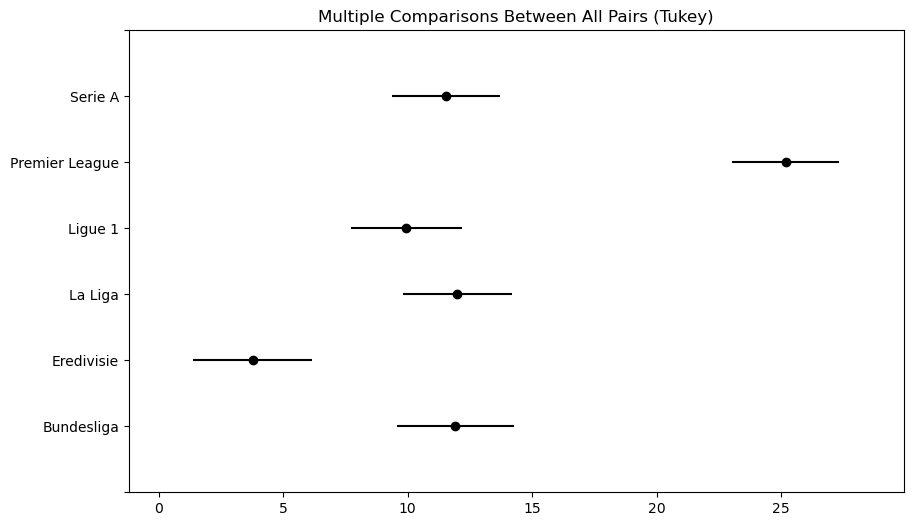

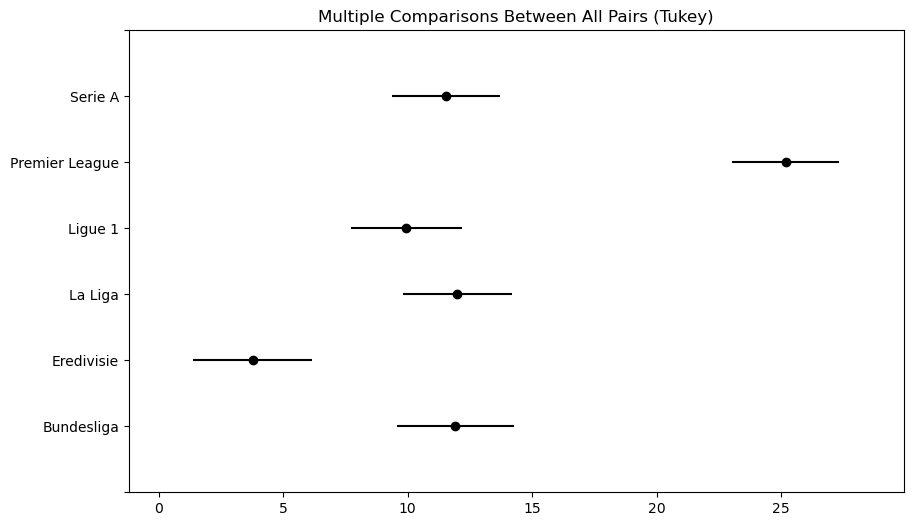

In [125]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey_results = pairwise_tukeyhsd(data["Market_Value"], df['League'], alpha=0.05)

tukey_results.plot_simultaneous()

In [126]:
import scipy.stats as stats

from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data["Market_Value"], data['League'])
result = mc.allpairtest(stats.ttest_ind, method='bonferroni')
print(result[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonferroni
alphacSidak=0.00, alphacBonf=0.003
    group1         group2       stat    pval  pval_corr reject
--------------------------------------------------------------
    Bundesliga     Eredivisie   6.2492    0.0       0.0   True
    Bundesliga        La Liga  -0.0435 0.9653       1.0  False
    Bundesliga        Ligue 1   1.3111 0.1905       1.0  False
    Bundesliga Premier League  -7.0206    0.0       0.0   True
    Bundesliga        Serie A   0.2603 0.7947       1.0  False
    Eredivisie        La Liga  -5.9143    0.0       0.0   True
    Eredivisie        Ligue 1  -5.4374    0.0       0.0   True
    Eredivisie Premier League -12.9513    0.0       0.0   True
    Eredivisie        Serie A  -6.5769    0.0       0.0   True
       La Liga        Ligue 1   1.3279 0.1848       1.0  False
       La Liga Premier League  -7.0379    0.0       0.0   True
       La Liga        Serie A   0.3027 0.7622       1.0  False
       Ligue 1 Prem

In [127]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data[['Progression_PrgC', 'Progression.1_PrgP','Progression.2_PrgR']]
y = data['Market_Value_Point']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.2711864406779661


In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data[['Performance.8_G+A-PK']]
y = data['Market_Value_Point']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.26440677966101694


In [129]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data[['Playing Time.1_Min',]]
y = data['Market_Value_Point']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.2677966101694915


In [130]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data[['Per 90 Minutes.9_npxG+xAG']]
y = data['Market_Value_Point']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.2440677966101695


In [132]:
correlation_matrix = df[['Progression.2_PrgR', 'Expected.3_npxG+xAG', 'Performance.8_G+A-PK']].corr()

print("Korelasyon Matrisi:")
print(correlation_matrix)

Korelasyon Matrisi:
                      Progression.2_PrgR  Expected.3_npxG+xAG  \
Progression.2_PrgR              1.000000             0.834117   
Expected.3_npxG+xAG             0.834117             1.000000   
Performance.8_G+A-PK            0.789728             0.930138   

                      Performance.8_G+A-PK  
Progression.2_PrgR                0.789728  
Expected.3_npxG+xAG               0.930138  
Performance.8_G+A-PK              1.000000  


In [133]:
selected_columns = ['Market_Value', 'Market_Value_Point']
correlation_matrix = data[selected_columns].corr()
print(correlation_matrix)

                    Market_Value  Market_Value_Point
Market_Value            1.000000            0.854314
Market_Value_Point      0.854314            1.000000


İki bağımsız değişkenin katsayılarına (coef) baktığımızda, Expected.3_npxG+xAG değişkeninin maç başına oynama sayısını pozitif yönde etkilediğini (1.1028), ancak Performance.8_G+A-PK değişkeninin etkisinin istatistiksel olarak anlamlı olmadığını (0.1534, p-değeri 0.109) görüyoruz.

In [ ]:
df.columns

Index(['Player', 'Nation', 'League', 'Team', 'Pos', 'Main_Pos', 'Age', 'MP',
       'Playing Time_Starts', 'Playing Time.1_Min', 'Playing Time.2_90s',
       'Performance_Gls', 'Performance.1_Ast', 'Performance.2_G+A',
       'Performance.3_G-PK', 'Performance.4_PK', 'Performance.5_PKatt',
       'Performance.6_CrdY', 'Performance.7_CrdR', 'Performance.8_G+A-PK',
       'Performance.9_CrdTotal', 'Perfonmance_Score-Expected_Score',
       'Expected_xG', 'Expected.1_npxG', 'Expected.2_xAG',
       'Expected.3_npxG+xAG', 'Progression_PrgC', 'Progression.1_PrgP',
       'Progression.2_PrgR', 'Per 90 Minutes_Gls', 'Per 90 Minutes.1_Ast',
       'Per 90 Minutes.2_G+A', 'Per 90 Minutes.3_G-PK',
       'Per 90 Minutes.4_G+A-PK', 'Per 90 Minutes.5_xG',
       'Per 90 Minutes.6_xAG', 'Per 90 Minutes.7_xG+xAG',
       'Per 90 Minutes.8_npxG', 'Per 90 Minutes.9_npxG+xAG', 'Market_Value',
       'Market_Value_Point'],
      dtype='object')